In [0]:
import json
import glob
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np

In [78]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

dirbase='/content/drive/My Drive/Colab Notebooks/final/CORD-19-research-challenge/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
#Fetch All of JSON File Path
json_path = glob.glob(f'{dirbase}/**/*.json', recursive=True)[0:5000]
len(json_path)


5000

In [0]:

with open(json_path[0]) as file:
    content = json.load(file)


In [81]:
class FileReader:
    def __init__(self, dirbase):
        with open(dirbase) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract}... {self.body_text}...'
first_file = FileReader(json_path[0])
print(first_file)

85dfb59af4c4ec824f1f62c645e5b91a6e3cc814: ... Down-regulated gene expression, encoding sarcoplasmic reticulum (SR) Ca 2 + -ATPase and its regulatory proteins such as SR Ca 2 + -ATPase isoform 2a (SERCA2a) and phospholamban (PLN), plays a crucial role in myocardial decompensation due to the impairment of intracellular Ca 2+ cycling. It has been reported that SERCA2a and PLN expressed in peripheral blood mononuclear cells (PBMC) not only are translatable to the myocardial setting, but also significantly decrease in dogs with degenerative mitral valve disease. The aim of this study is to clarify how effectively the target genes reflect hemodynamic overload, a primary determinant of myocardial distress.
Healthy laboratory beagles (n = 24), very young dogs with patent ductus of arteriosus (PDA; n = 8) and with pulmonic stenosis (PS; n = 5) were enrolled in this study. None of patients have been treated previously with cardiovascular medication. All PDA patients were in subclinical stage, wh

In [0]:
def read_directory_files(path):
    file_texts = {'paper_id':[],'abstract':[],'body_text':[]}
    for i in range(0,len(json_path)):
        input_file_text = open(json_path[i])
        with input_file_text as f:
            data = json.load(f)
        file_texts['paper_id'].append(data['paper_id'])
        if 'abstract' not in data.keys():
            file_texts['abstract'].append(None)
        elif data['abstract']==[]:
            file_texts['abstract'].append(None)
        else:
            file_texts['abstract'].append(data['abstract'])

        if 'body_text' not in data.keys():
            file_texts['body_text'].append(None)
        elif data['body_text']==[]:
            file_texts['body_text'].append(None)
        else:
            file_texts['body_text'].append(data['body_text'])
        
            
    df=pd.DataFrame(data=file_texts)
    return df
    

In [0]:
# may run a little bit longer
json_text = read_directory_files(json_path)

In [86]:
json_text.head()

paper_id  ...                                          body_text
0  85dfb59af4c4ec824f1f62c645e5b91a6e3cc814  ...  [{'text': 'Down-regulated gene expression, enc...
1  98517ecaa3de323dc8585cee5453a2de2a0f3d22  ...  [{'text': 'Infectious or communicable disease ...
2  95dbed40b9b6adbc57dcbae88e5bb4b8a3ad4929  ...  [{'text': 'Multiple sclerosis (MS) is a chroni...
3  8dad92c1030a6547f112250184572c50dae43c8d  ...  [{'text': 'Vaccination has been undeniably ver...
4  9660e4d54d854be62dc2e3ec086d1132a741efd9  ...  [{'text': 'Interleukin 35 (IL-35) is a part of...

[5 rows x 3 columns]

In [87]:
print(list(json_text['body_text'][0][0]['text'].split()))

['Down-regulated', 'gene', 'expression,', 'encoding', 'sarcoplasmic', 'reticulum', '(SR)', 'Ca', '2', '+', '-ATPase', 'and', 'its', 'regulatory', 'proteins', 'such', 'as', 'SR', 'Ca', '2', '+', '-ATPase', 'isoform', '2a', '(SERCA2a)', 'and', 'phospholamban', '(PLN),', 'plays', 'a', 'crucial', 'role', 'in', 'myocardial', 'decompensation', 'due', 'to', 'the', 'impairment', 'of', 'intracellular', 'Ca', '2+', 'cycling.', 'It', 'has', 'been', 'reported', 'that', 'SERCA2a', 'and', 'PLN', 'expressed', 'in', 'peripheral', 'blood', 'mononuclear', 'cells', '(PBMC)', 'not', 'only', 'are', 'translatable', 'to', 'the', 'myocardial', 'setting,', 'but', 'also', 'significantly', 'decrease', 'in', 'dogs', 'with', 'degenerative', 'mitral', 'valve', 'disease.', 'The', 'aim', 'of', 'this', 'study', 'is', 'to', 'clarify', 'how', 'effectively', 'the', 'target', 'genes', 'reflect', 'hemodynamic', 'overload,', 'a', 'primary', 'determinant', 'of', 'myocardial', 'distress.']


In [88]:
json_text['body_text'].head()

0    [{'text': 'Down-regulated gene expression, enc...
1    [{'text': 'Infectious or communicable disease ...
2    [{'text': 'Multiple sclerosis (MS) is a chroni...
3    [{'text': 'Vaccination has been undeniably ver...
4    [{'text': 'Interleukin 35 (IL-35) is a part of...
Name: body_text, dtype: object

In [89]:
json_text.shape

(5000, 3)

In [90]:
# import necessary libraries 
import nltk.data
import nltk
nltk.download('punkt')
import re
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import word_tokenize
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import *
porter_stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF Vectorization
(silly way) REPLACED

In [91]:
type(word_tokenize(json_text['body_text'][0][0]['text']))

list

In [0]:
value=[]
for i in range(0,len(json_text['body_text'])):
  if json_text['body_text'][i] is None:
    value.append('NA')
  elif json_text['body_text'][i][0]['text'] is None:
    value.append('NA')
  else:
    value.append(word_tokenize(json_text['body_text'][i][0]['text']))
#value[0:3]
json_text['preprocessing_bodytext']=value


In [93]:
json_text.shape

(5000, 4)

In [94]:
json_text['preprocessing_bodytext'].head

<bound method NDFrame.head of 0       [Down-regulated, gene, expression, ,, encoding...
1       [Infectious, or, communicable, disease, can, b...
2       [Multiple, sclerosis, (, MS, ), is, a, chronic...
3       [Vaccination, has, been, undeniably, very, hel...
4       [Interleukin, 35, (, IL-35, ), is, a, part, of...
                              ...                        
4995    [Introduction, self-imposed, prevention, measu...
4996    [Much, of, what, we, know, about, the, neural,...
4997    [Many, papers, use, advanced, models, combined...
4998    [The, COVID-19, pandemic, represents, a, globa...
4999    [Here, ,, we, calibrate, a, susceptible-infect...
Name: preprocessing_bodytext, Length: 5000, dtype: object>

In [95]:
type(json_text['preprocessing_bodytext'][0][0])

str

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Encode(data):
    #create the transform
    missing_value=True
    value=[]
    for i in data:
        if i is None:
            continue
        else:
            for i2 in i: 
                if i2['text'] is None:
                  value.append(None)
                else:
                  value.append(list(i2['text'].split()))
                    
    return value
                        

In [97]:
body_text=Encode(json_text['body_text'])
for i in body_text[0:2]:
  print(i)
len(body_text)

['Down-regulated', 'gene', 'expression,', 'encoding', 'sarcoplasmic', 'reticulum', '(SR)', 'Ca', '2', '+', '-ATPase', 'and', 'its', 'regulatory', 'proteins', 'such', 'as', 'SR', 'Ca', '2', '+', '-ATPase', 'isoform', '2a', '(SERCA2a)', 'and', 'phospholamban', '(PLN),', 'plays', 'a', 'crucial', 'role', 'in', 'myocardial', 'decompensation', 'due', 'to', 'the', 'impairment', 'of', 'intracellular', 'Ca', '2+', 'cycling.', 'It', 'has', 'been', 'reported', 'that', 'SERCA2a', 'and', 'PLN', 'expressed', 'in', 'peripheral', 'blood', 'mononuclear', 'cells', '(PBMC)', 'not', 'only', 'are', 'translatable', 'to', 'the', 'myocardial', 'setting,', 'but', 'also', 'significantly', 'decrease', 'in', 'dogs', 'with', 'degenerative', 'mitral', 'valve', 'disease.', 'The', 'aim', 'of', 'this', 'study', 'is', 'to', 'clarify', 'how', 'effectively', 'the', 'target', 'genes', 'reflect', 'hemodynamic', 'overload,', 'a', 'primary', 'determinant', 'of', 'myocardial', 'distress.']
['Healthy', 'laboratory', 'beagles',

163822

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def EncodeTFIDF(data, maxfeature):
  try:
    value=[]
    #text=list(data['text'].split())
    for i in range(0,len(data)):
      m=','.join(data[i])
      value.append(m)
    vectorizer=TfidfVectorizer(stop_words='english',use_idf=True,max_features=maxfeature)
  #vectorizer.fit(data)
    value = vectorizer.fit_transform(value)
    #word=vectorizer.get_feature_names()
    #print(word)
  except ValueError:
    pass                    
  return value


In [0]:
bodytext_vect=EncodeTFIDF(json_text['preprocessing_bodytext'].values,2**10)

In [107]:
bodytext_vect.shape

(5000, 1024)

In [0]:
#bodytext_vect=bodytext_vect.toarray

In [0]:
bodytext_vect

<5000x1024 sparse matrix of type '<class 'numpy.float64'>'
	with 195003 stored elements in Compressed Sparse Row format>

Dimensions Reduction using UAMP

In [110]:
!pip install umap

In [111]:
pip install matplotlib

In [0]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

In [0]:
reducer = umap.UMAP(n_neighbors = 5)

[[ 9.153431   -0.09657554]
 [ 7.6076956  -0.96998745]
 [ 5.8018622   0.47674978]
 ...
 [ 7.6338153  -0.17278586]
 [13.272452   -0.06579769]
 [ 8.515048    2.1686296 ]]


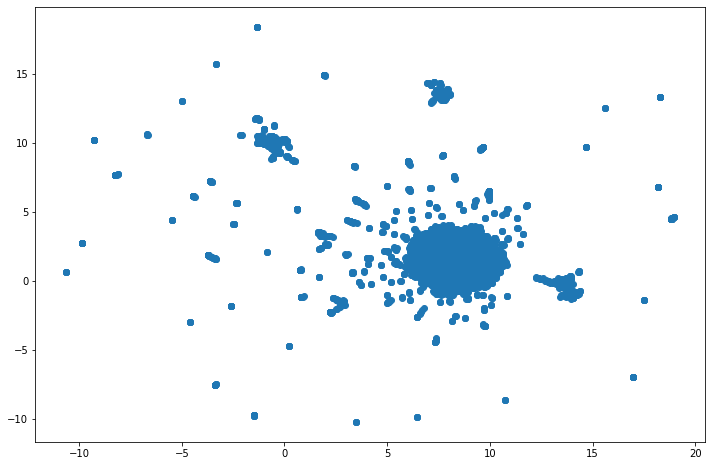

In [143]:

clusterable_embedding = reducer.fit_transform(bodytext_vect.toarray())
plt.figure(figsize=(12,8))
plt.scatter(clusterable_embedding[:,0],clusterable_embedding[:,1])
clusterable_embedding.shape
print(clusterable_embedding)

Clustering using HDBSCAN 

In [144]:
!pip install hdbscan

In [0]:
import hdbscan
import numpy as np
import seaborn as sns
import pandas as pd

In [163]:
clusterable_embedding

array([[ 9.153431  , -0.09657554],
       [ 7.6076956 , -0.96998745],
       [ 5.8018622 ,  0.47674978],
       ...,
       [ 7.6338153 , -0.17278586],
       [13.272452  , -0.06579769],
       [ 8.515048  ,  2.1686296 ]], dtype=float32)

In [0]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
clusterer=clusterer.fit(clusterable_embedding)
 

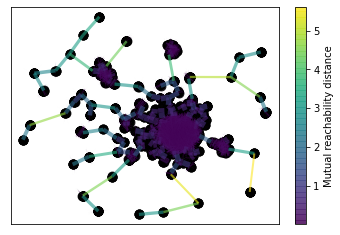

In [174]:
#Build the minimum spanning tree
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

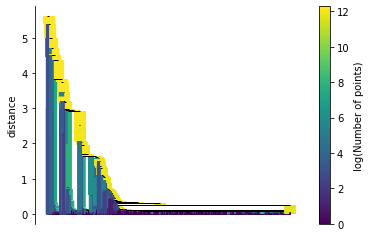

In [175]:
#Build the cluster hierarchy
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

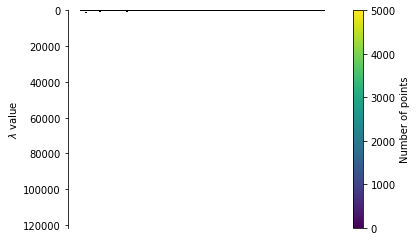

In [176]:
#Condense the cluster tree
clusterer.condensed_tree_.plot()

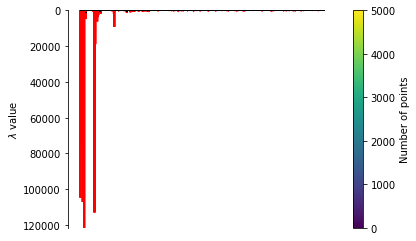

In [177]:
#Extract the clusters
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [0]:
#palette = sns.color_palette()
#cluster_colors = [sns.desaturate(palette[col], sat)
#                  if col >= 0  else (0.5, 0.5, 0.5) for col, sat in
#                  zip(clusterer.labels_, clusterer.probabilities_)]
#plt.scatter(clusterable_embedding.T[0], clusterable_embedding.T[1], c=cluster_colors)

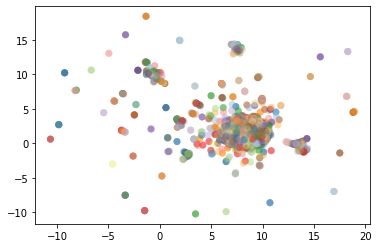

In [205]:
#clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(clusterable_embedding)
color_palette = sns.color_palette('Paired',max(clusterer.labels_))
cluster_colors = [color_palette[x] if x >= 0 and x<max(clusterer.labels_)
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                        zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*clusterable_embedding.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [191]:
clusterable_embedding.T[0]
clusterable_embedding.T[1]

array([-0.09657554, -0.96998745,  0.47674978, ..., -0.17278586,
       -0.06579769,  2.1686296 ], dtype=float32)

In [192]:
clusterer.labels_

array([ -1, 522, 253, ...,  -1, 224, 758])

In [193]:
len(clusterer.labels_)

5000

In [0]:
json_text['cluster_textbody']=clusterer.labels_


In [204]:
max(clusterer.labels_)

787

In [202]:
max(json_text['cluster_textbody'])

787

In [203]:
grouped=json_text.groupby('cluster_abstract')
for gp_name, gp in grouped:
    display(gp)

paper_id  ... cluster_textbody
0     85dfb59af4c4ec824f1f62c645e5b91a6e3cc814  ...               -1
5     94f679e7bf40010e41952e26e8953a5703be64c0  ...               -1
6     87dcbcb15da36050308aca4284d842193d99cd6c  ...               -1
9     95f7c797080ddb8d466a88443df62ea97f46d932  ...               -1
15    8fefbc58375c244a64a82e3f88c4084076838b88  ...               -1
...                                        ...  ...              ...
4980  a9a978c056422f979395ce56c96738d33b104a3e  ...               -1
4981  c8626262fa06c833da3a8dc15c2d4ca42ddc34f7  ...               -1
4982  90b5ecf991032f3918ad43b252e17d1171b4ea63  ...               -1
4987  9daed5e675ac113d1939056dcebbb1f32ec0d7ec  ...               -1
4997  b378a19034ecc758062e01cad504b9df12b07fb6  ...               -1

[938 rows x 6 columns]

paper_id  ... cluster_textbody
4528  4b5ba0d8c476c899a79cec7872f7d2287937a59d  ...                0
4585  5daceb492bad28a61fc43c4be83a164042d8c430  ...                0
4608  64b327001f8fa95b83dc23259a2ad617be12498c  ...                0
4609  7808e4cd470a379b12470833f4a6fc7e1b567c96  ...                0
4670  618cd102ec5051a05ca5131e21961c964152f15c  ...                0
4705  6ad14ceec74dc9b3d3dc6db7fc319b9dc22dc546  ...                0
4800  8df83cc50766ef007425f79d6220d66c19f73f63  ...                0
4960  c08c3b98a956287a6eaf99f6d90969d7dd1410d1  ...                0

[8 rows x 6 columns]

paper_id  ... cluster_textbody
813   de3e0083918cb84a1b2df214b7cd898afbe12206  ...                1
883   f4998df4f550be136b50f7d4d6234e2cf916b583  ...                1
1423  665622d28864a2df5caf4f9fdb8ebe97a0aedd8b  ...                1
3057                                PMC6531831  ...                1

[4 rows x 6 columns]

paper_id  ... cluster_textbody
49    8c8c5fb760997ded36fe4ae8fc77103ec66f9d14  ...                2
1954  9a8ffb71928a37a550e689f36fa3196493e036fe  ...                2
2396                                PMC5489272  ...                2
4433                                PMC3260743  ...                2

[4 rows x 6 columns]

paper_id  ... cluster_textbody
462   d1268a2b5aa5778f15fbd10152728dc936a6809e  ...                3
575   d25529180f950874e0b4f62a976959d683a2ceaf  ...                3
3403                                PMC3273816  ...                3
4447                                PMC1635287  ...                3

[4 rows x 6 columns]

paper_id  ... cluster_textbody
311   b6b49bfba83105940015b7b8280db74ce480c65c  ...                4
850   db94e7aa6b683896a9ff5a239003a0c351f60041  ...                4
1308  37afb28ad52f876fd3473878e7990165663f3bd2  ...                4
1385  4f8d0dce755f89c22c48c301fe55a457c8ed715b  ...                4
1899  8cfe567d42fa459cb4364e240ddfe29629d03f85  ...                4
1912  956f777cf3a26f2989c840cbb927ac552b95732e  ...                4
2737                                PMC5705478  ...                4
3248                                PMC7044566  ...                4
3293                                PMC7050048  ...                4
3667                                PMC3935109  ...                4

[10 rows x 6 columns]

paper_id  ... cluster_textbody
1400  541efff1146fcb123189ad615099b67769ed41c5  ...                5
1972  96a2891a55f0d6076cd89b09e8571d4ce262fbc7  ...                5
3601                                PMC3168224  ...                5
3840                                PMC4064153  ...                5
4942  87bfa13221ccf5a02d4a888ef1320b57f2c2d5e2  ...                5

[5 rows x 6 columns]

paper_id  ... cluster_textbody
363   a62d3eb969dc67dbfdba03ebf8304716137eaf6d  ...                6
635   c7f8f1365c454c71574aaaf83fa3d6bdd92e992b  ...                6
2247  2e16617b3004017c0f1c2fcbb140d70444fee083  ...                6
3203                                PMC6778745  ...                6
3222                                PMC7019416  ...                6

[5 rows x 6 columns]

paper_id  ... cluster_textbody
326   9f9327703d4203ad1f26dfea48d1a0226e6dd5d4  ...                7
388   b8664f2695036c9b4a78f07b4598f1f8d6f98386  ...                7
506   c439e1028bc93d94f4eba1855c6b1eade676f732  ...                7
1322  41199e837e1c706b7a8a1a8a0970856974235566  ...                7
1654  82dcb53e236df1adb5c3c9f5291dc4e8eabb354a  ...                7
1660  725f0a6590f20c15be0ae719463c0624a34ee1af  ...                7
1824  824e4aebd39a0531625542fb7328917bb061e5a4  ...                7
2368  2d5eaeaa1aa523394ce7697d3cbe98381a2c1559  ...                7
2503                                PMC5295174  ...                7
2635                                PMC6190919  ...                7
2636                                PMC5697698  ...                7
2830                                PMC5738538  ...                7
3097                                PMC6659456  ...                7
3837                                PMC4267971  ...                7
3884                                PMC3390060  ...                7
3933                                PMC4978602  ...                7
4103                                PMC4386240  ...                7

[17 rows x 6 columns]

paper_id  ... cluster_textbody
349   b8b13fd5a49e6193135315c97de14fb7b9936286  ...                8
583   d32ec6ce72c16f7fbedc8ac60fbdc9f8c74c6de4  ...                8
809   e1d7c0ed2db49bcc8e49814b1bb24bd01f9ba8c4  ...                8
2286  2ba882c9ddb5e9db8ebb0db536788bff66b67f14  ...                8
2667                                PMC6072144  ...                8
2672                                PMC5779534  ...                8
2677                                PMC5945578  ...                8
3104                                PMC6522884  ...                8

[8 rows x 6 columns]

paper_id  ... cluster_textbody
221   a4490fc5ca8fea133b9a5beb9258df89cf4945b6  ...                9
989   faec4bca24cb275ebc6c55e7cba3bd6a3b74df32  ...                9
3266                                PMC6938705  ...                9
3296                                PMC6865829  ...                9

[4 rows x 6 columns]

paper_id  ... cluster_textbody
621   c2ad458ccf62686e340e51ea95c439e7c4e2bc29  ...               10
852   fa021bfcf95acdbde556098bfd84e8a84c7948c9  ...               10
3919                                PMC3575852  ...               10

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2056  0a64b2c55fc2091358da4f83ac6fdc7701ddb46e  ...               11
3420                                PMC3152369  ...               11
3923                                PMC3561942  ...               11

[3 rows x 6 columns]

paper_id  ... cluster_textbody
11    879df084e06fcce1980e3f73c36748068b39f049  ...               12
146   9ee72a92dba63a2f7ba385612fa69e180dc8ab09  ...               12
168   abb4c06114edb9aa57132be9201478ac965a56ba  ...               12
438   cf410c7fd76487d1244517521fbe521465e75310  ...               12
737   f084dcc7e442ab282deb97670e1843e347cf1fd5  ...               12
895   f5faed882955e964aa9ea7ac455746bcfec521ba  ...               12
1678  84d3fe51518523e73a65e73756e4496587e4f2f4  ...               12
1700  839df627ece5b5fc7bb1ce3b4f96127677fd0494  ...               12
2663                                PMC6082671  ...               12
2753                                PMC5873549  ...               12
2809                                PMC6125687  ...               12
2941                                PMC6582406  ...               12
4254                                PMC4614609  ...               12
4284                                PMC5540962  ...               12

[14 rows x 6 columns]

paper_id  ... cluster_textbody
452   c7a3699cbb6e8ea60edabb60c0407883e6ed33f2  ...               13
1159  366057ee7dcf005190e239f45cdb054964e828db  ...               13
1896  8f4738cf871131429d4c4df364e86135e3f04593  ...               13
2054  0568c55234a6ad2585fe3ac5f3c51260194af7ec  ...               13
2714                                PMC5858665  ...               13
4479  44a440cc1c135c938d2216ea672f8ef4f9c01296  ...               13
4572  53442eacc3f233078507fa37b78267399e8c1e3b  ...               13
4581  6499f5c865c3db3bdfc1e969ea940a80d547a5bb  ...               13

[8 rows x 6 columns]

paper_id  ... cluster_textbody
835   ece140f2d510d370f594707b718066f7173a39e1  ...               14
2408                                PMC5161441  ...               14
2570                                PMC5264651  ...               14
2861                                PMC5652284  ...               14

[4 rows x 6 columns]

paper_id  ... cluster_textbody
494   bd667dbd5200c9f07fb07cef29435f7ca7c2639b  ...               15
3557                                PMC3234644  ...               15
3628                                PMC3942943  ...               15

[3 rows x 6 columns]

paper_id  ... cluster_textbody
820   ddf5a29103d06a6ab0fef7f8c15c169050e493c2  ...               16
858   e46e1768a48965ba42073cc744b7278055859174  ...               16
4087                                PMC4835433  ...               16

[3 rows x 6 columns]

paper_id  ... cluster_textbody
666   f9738261ac322d052e519fb1f1297eedc917a939  ...               17
1068  3b299c75b42f7b4119456256518d2d8753d74838  ...               17
1540  58a0c3ad6fd3ce5eae8b1199bd8e04ad8dadac81  ...               17
1962  9316c8c673768c7310978f482fcaa1d3bd62d547  ...               17
2916                                PMC6786705  ...               17
3621                                PMC3481691  ...               17
3825                                PMC4240341  ...               17

[7 rows x 6 columns]

paper_id  ... cluster_textbody
710   db4a4b2bde1bf1bb981bf87f9c6c25462834a25e  ...               18
1150  377e2c575da8f034d4f9f34d7ad6c4395487f348  ...               18
1499  5ed43fc646fb368da6a9cf9d0029891a4b8248d1  ...               18
1625  7f69a764a32e9fefc971d79582da33db151cdeb5  ...               18
3089                                PMC6363457  ...               18
3363                                PMC6990648  ...               18
4472  41d412415c46baf70ca91ebf049c0352ead19f18  ...               18

[7 rows x 6 columns]

paper_id  ... cluster_textbody
237   b3ed8e8e1f4e6bb576910bc4506303b525c2a1e5  ...               19
469   c94cf364c4ceb68d6b7b7cbc252d32a53401779a  ...               19
688   d92d741f65164c7fe568413caebac49e13c4916e  ...               19
1372  64d31d4587a86108556e52c45e1ea3750fa7303f  ...               19
2735                                PMC5831680  ...               19
2771                                PMC5831684  ...               19
2852                                PMC5783036  ...               19

[7 rows x 6 columns]

paper_id  ... cluster_textbody
301   aa27ee27248b8daab7e85d3fd1044383876b099a  ...               20
533   c23db0f0dc55dea350cd7e27939acad930c6c85a  ...               20
963   fbf3cc84b1d412693330fffee86bef8fbdda3b07  ...               20
3269                                PMC7000305  ...               20

[4 rows x 6 columns]

paper_id  ... cluster_textbody
606   d1b24d21f2004ee1ed983d5fd7526ff2809443e6  ...               21
1256  316e6c4b01e43b8cd81a65905c749f3f0f8aeff2  ...               21
2043  069695d115517cbd0e713fb44245be7a6226bc7f  ...               21
3195                                PMC6205567  ...               21

[4 rows x 6 columns]

paper_id  ... cluster_textbody
164   bbf70aeba7b4a4b8d96db253e673881ac220e36c  ...               22
601   c84df8edaeb086178a5dd8e6617367eedaebe283  ...               22
1996  854545208a6bc7cafa8744604899e32237ff2047  ...               22
2383                                PMC5014526  ...               22
2683                                PMC5647739  ...               22

[5 rows x 6 columns]

paper_id  ... cluster_textbody
832   de4399a1034294c5aecf4f318fd99ca559a762ea  ...               23
1382  5ca05808cfc6d2139bc1ab6112d67dff9411f9ce  ...               23
2728                                PMC6068295  ...               23
2768                                PMC5745179  ...               23
3145                                PMC6635179  ...               23

[5 rows x 6 columns]

paper_id  ... cluster_textbody
798   ee254e8dd94c816c9b5cd80c56b4b7e07eb5aa03  ...               24
2384                                PMC5467638  ...               24
4210                                PMC4769323  ...               24
4381                                PMC2982091  ...               24

[4 rows x 6 columns]

paper_id  ... cluster_textbody
130   b1a61e5a2eee47ec7d39715451c05879d11a5de0  ...               25
716   f9ab7be2819a84d05b21829fdc79e1616779bc9a  ...               25
3249                                PMC7052511  ...               25

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1559  55eb127fae1e7e297c11baca53a758cac2a77329  ...               26
1898  98364308fd44bb4fb686480fb10c968e918715f1  ...               26
2256  254270af7f396d35475aee946cc1b3f9a3694e29  ...               26
2428                                PMC5447409  ...               26
2973                                PMC6683984  ...               26

[5 rows x 6 columns]

paper_id  ... cluster_textbody
365   a0e5f386820398978cd41131434313e6d70bcfff  ...               27
1768  7e0195ed4cec2a365ca4668e68a6b8ebc29e7d83  ...               27
4113                                PMC4699381  ...               27

[3 rows x 6 columns]

paper_id  ... cluster_textbody
693   e7b8761e03a3ce7edd5c0df23946c4ac8618c708  ...               28
1196  367decf686bc1f476ebd0874336a328f12e6ffc4  ...               28
2027  0aa4edc168fd9bf7ba7efee20dbeb007c26b1beb  ...               28
2882                                PMC6147391  ...               28

[4 rows x 6 columns]

paper_id  ... cluster_textbody
245   bbb78eb1a08c9ac42c6ddd86d3e5bd1de1c0329b  ...               29
1658  6d03f3e2dd6554f15526cb089337fa592fb1834c  ...               29
4313                                PMC5172239  ...               29
4758  73998a3f565b661816d48aa7c20fa5ae617864d5  ...               29

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1328  5bc13185f8fc98b99cd1fb22078afeda41eb1e7e  ...               30
1881  8b428fa1fc5626bb38ba1efdb48d715b545f262c  ...               30
2560                                PMC5172238  ...               30

[3 rows x 6 columns]

paper_id  ... cluster_textbody
407   cc2b11f9366012c6c2f68a19608216bd33c3f9bd  ...               31
1135  4a8c5f46f5d234453c3c498a85a2ffb261e584c4  ...               31
1715  83e5553035f500f4bcc4aeeaa41aa74ebf578567  ...               31
2799                                PMC6042015  ...               31
2989                                PMC6517316  ...               31

[5 rows x 6 columns]

paper_id  ... cluster_textbody
600   c7a16d3975bbb4ad4f44786d1e5961d16d21f863  ...               32
2881                                PMC5797860  ...               32

[2 rows x 6 columns]

paper_id  ... cluster_textbody
912   f91911b6a25c970324854df7b87c550ae7fb878f  ...               33
1375  630a6b5851e9d6362eb68f157fa704bfd97f1705  ...               33
2708                                PMC6149024  ...               33

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1070  41a94f21d4dc3946e1377439a2a3880fb9d33776  ...               34
1813  78dc2abf39a665aec9b4a48738a2b4b838bfe72e  ...               34
2149  0a1f43c04e0e22fb6efbd94611920bc9680d7ae3  ...               34
3951                                PMC4909826  ...               34
4040                                PMC4428716  ...               34

[5 rows x 6 columns]

paper_id  ... cluster_textbody
534   c123770a0567eeea72f4df1a2004585732e08198  ...               35
1716  68e2c47647afe4bf0237d9f17bb7787738fc8663  ...               35
2788                                PMC5888411  ...               35
2965                                PMC6718828  ...               35

[4 rows x 6 columns]

paper_id  ... cluster_textbody
566   d14208a77004363b34b3cf0b7d08fd0d121e12a4  ...               36
1832  7f7c8429d7011635b8f8a3415e6ace00c2bf4df0  ...               36
3912                                PMC4142259  ...               36
4301                                PMC5014217  ...               36

[4 rows x 6 columns]

paper_id  ... cluster_textbody
31    894e9a681490af51667a059d727a9cce8dddbf7f  ...               37
167   a0ee437d7eab376084d070124b4070598480a179  ...               37
931   dca3423350c6278fe7b9479eb894a578ffeeeb68  ...               37
1279  3062cebd70447841d68c48fe83f0eb51b07a761d  ...               37
1576  5a1a3d864a2110b730b3cbf6b7a1c01a0870be42  ...               37
2756                                PMC5707751  ...               37
3342                                PMC6889234  ...               37
3437                                PMC3236064  ...               37

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1030  1f3b676368e5c9a1582ab624cbf0884c383fddd2  ...               38
1108  418d9334932cd1b03e23fd6e03c01e660fff4bd4  ...               38
2117  06137bb1e53080493b33c1b749b59848cddc05fc  ...               38
3439                                PMC3203594  ...               38
3774                                PMC3458567  ...               38

[5 rows x 6 columns]

paper_id  ... cluster_textbody
570   d02f9e2414da034e0aded233a37de3077f40c93b  ...               39
582   c6ea09cae9a6185a84ab731e86257d6507f5a102  ...               39
3587                                PMC2396423  ...               39
4452                                PMC2770676  ...               39

[4 rows x 6 columns]

paper_id  ... cluster_textbody
711   f901f9949a8c6e53727335e92a39707e89965422  ...               40
1139  3bbbbc7190599b47616269323cfbd3659d9dc420  ...               40
1815  824707a11a7f1be7be3ff651aaa43dda34ef59b5  ...               40
2354  24df3883c547f5976077bc7a924eec9ae8fa9e71  ...               40
3496                                PMC3287201  ...               40
4225                                PMC4780872  ...               40
4267                                PMC4763971  ...               40
4413                                PMC2800238  ...               40
4939  99dab788e984601ee4efcd1138926caf10c00dcf  ...               40

[9 rows x 6 columns]

paper_id  ... cluster_textbody
657   f1a7e309bf73e1d75786e0bedd3c28e26f0871ec  ...               41
1761  7a53295a349dc3079dc20b769ba956e07d7f2496  ...               41
3002                                PMC6438908  ...               41

[3 rows x 6 columns]

paper_id  ... cluster_textbody
420   c97243d65788222d1cf09203e27ae04deaf0ef1c  ...               42
1008  1f541a086ac9bc30df8ee2060f958691fb4a0667  ...               42
1017  26cb41132d945aa5cff35a80761daf086a4375e0  ...               42
1173  32412ffe52eb41da8ecfed314b703c49fd041f5c  ...               42
2129  0adc0c7498f0ebbb3c8f1c662da34605d5f91fe2  ...               42
2875                                PMC6174684  ...               42
3506                                PMC3361041  ...               42
3758                                PMC3948575  ...               42
3960                                PMC4621204  ...               42
4071                                PMC4431472  ...               42

[10 rows x 6 columns]

paper_id  ... cluster_textbody
250   bb65c5259727bce9f1623452a0af39aa57f9b1bc  ...               43
1222  3f5d545fbca8b7c83ff7b10f827d772cb0011aa4  ...               43
1435  4c5c841e4ad3fbf9b31d6c0c282dfec035f716bb  ...               43
2206  15f57ae58cbfdd0616c570508ce0471bc4dacebe  ...               43
2426                                PMC5085274  ...               43
3065                                PMC6511627  ...               43
3795                                PMC4186572  ...               43
3994                                PMC4780195  ...               43
4131                                PMC4403815  ...               43
4328                                PMC5617848  ...               43
4516  4ce668fe6eee9f59ed5ad0dfc0e9787777acd3be  ...               43
4897  9c32d461dc9d4737756a990cf13bae1a03e078a9  ...               43

[12 rows x 6 columns]

paper_id  ... cluster_textbody
554   c4a46bccbf43ff75b7e20f5081f3c5b7a31b7b29  ...               44
2226  2a1c5b2541cb958a6280094aa3c1cd2e414fb468  ...               44
2299  26fec23192bed03196a134abb20b8b197a2acc42  ...               44
2434                                PMC5092010  ...               44
3157                                PMC6216255  ...               44

[5 rows x 6 columns]

paper_id  ... cluster_textbody
187   a38e42b1f6af103e0fca657462dc516ad51cf7e9  ...               45
1230  476248087d96cd15553d7a7ebb99f2b9169d6b33  ...               45
1276  4327c3ea2772234a8f546e73f9fde05ea49fbfe8  ...               45
1289  3b69d402abfb10509e1518f2f2b38e8d8840f34e  ...               45
2125  0892a219a7caf18088f5e3a331ec01b6912c9188  ...               45
3176                                PMC6715885  ...               45
3887                                PMC3630908  ...               45
4370                                PMC5462650  ...               45
4839  b0899a264af548a89d649154aec569889717b295  ...               45

[9 rows x 6 columns]

paper_id  ... cluster_textbody
927   f6e985e472df7bba7a7ef1568336c0443b919639  ...               46
1633  6bdb41aa63efed5063efbecbb615896b8ea4ae5e  ...               46
1690  7db910e35a0a22ccef05b0a5b4c9789acfef2daa  ...               46
2824                                PMC6188560  ...               46
3845                                PMC3494269  ...               46

[5 rows x 6 columns]

paper_id  ... cluster_textbody
285   b530a3db1f7e6d6f289cd4fa3df8a782dcb691ab  ...               47
361   b55aa037b62821a2bcf4463f30caba8c8e662e2b  ...               47
933   db9a1efb58ae0ed12ff657b5cc78fcc2615f0c73  ...               47
1075  43fb44b6c809c497fa4e6e7a52e7a3dbbebe4155  ...               47
1297  34d485e6c776b7e4e28bab88bdd133aa4d43e4b2  ...               47
2332  23fcb75440f439f30f656e0c6b47c6f565f32ef2  ...               47
2620                                PMC6174282  ...               47
3174                                PMC6679678  ...               47

[8 rows x 6 columns]

paper_id  ... cluster_textbody
309   af7445b0b1d408a96c5001e1e0ba1f05dc1934ca  ...               48
699   eab5c7409c1afb7a1c6357ed9d4fe4b0c3f2fa16  ...               48
833   dd5267fbf9f6d0890db801e94fa7f0612d11bb18  ...               48
1263  46e88010c4a926b35d981984c673bb834c17f7d2  ...               48
2387                                PMC5643733  ...               48
2419                                PMC5134884  ...               48
2985                                PMC6467584  ...               48

[7 rows x 6 columns]

paper_id  ... cluster_textbody
275   a47847e94dfc6b117d860aaa199a0168096df817  ...               49
704   eb979bab57933dd9c6c1c02684bd3d7002cb604c  ...               49
2866                                PMC6175709  ...               49

[3 rows x 6 columns]

paper_id  ... cluster_textbody
312   a8f26d4aff2063c5a6476debc1c06e55a210998c  ...               50
480   c64f469a3115f900053a2313679efdf81cb35741  ...               50
811   ef6dbb94ddc618e006e993f32893043b9fa87463  ...               50
1993  9ddb63e47ae59fb8d315bfe119d9a1a3426af592  ...               50
2461                                PMC5052379  ...               50
3315                                PMC6895754  ...               50

[6 rows x 6 columns]

paper_id  ... cluster_textbody
59    8d88a7096820fcfb637b56b5563868c866ec692c  ...               51
754   f794f4f008a3e169fc5c4f99c586355594caa296  ...               51
1370  5088c438f1abf85269f0baa73779d6b7000fc10f  ...               51
1969  945b14460fc5e5d75092e4dd06bb09be03f10118  ...               51
2640                                PMC5910645  ...               51
2933                                PMC6600605  ...               51

[6 rows x 6 columns]

paper_id  ... cluster_textbody
671   d8a96ab6656a38b3c9380673aefaed8784982a11  ...               52
1342  5fedd08f111b588bface2d146740bad23bbbb3e3  ...               52
2035  05248494136966d79614f475f8e5bb0880a20bf7  ...               52
2798                                PMC5749487  ...               52
4204                                PMC4520955  ...               52

[5 rows x 6 columns]

paper_id  ... cluster_textbody
26    93d77f602ff27ef1575dd6f700d3f39033bba576  ...               53
672   ed6b1dc674893e435945a5efbd1eef13a7c56bc1  ...               53
1538  54e82ae1126dc9eed820d7a255cb4edca68a9f82  ...               53
1677  7818d1ffe60f6ea1d6b44e73402132ce41453ab2  ...               53
1713  7c9b0de06457ee197e904b3bc7f312ccb888baa7  ...               53
2568                                PMC5489471  ...               53
2654                                PMC6026690  ...               53
2885                                PMC6669205  ...               53
3278                                PMC6849764  ...               53

[9 rows x 6 columns]

paper_id  ... cluster_textbody
1563  657558034931a24e09f761877fed36cb70f4f6fe  ...               54
2155  0c83fb7b5413cd36d8ca958f15e7640636c8e730  ...               54
2763                                PMC5738603  ...               54
2835                                PMC5799402  ...               54
3939                                PMC4829501  ...               54

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1893  9521353cc7ef3d0734d76453622762532f06f777  ...               55
4104                                PMC4282400  ...               55
4812  c2af4db8591a8ef84229eb08359c0a50efa24544  ...               55

[3 rows x 6 columns]

paper_id  ... cluster_textbody
376   acbe63db4d9bb13ebde8af3b75b797cb29bbd5cb  ...               56
1543  54560eb4cc2e0affe21b8b21435c907232764c8a  ...               56
2236  1376526470f18216200ecd6c375d9913942fa362  ...               56
2244  29445ecd280247f79d6cebe0c3b4d06796e72eb9  ...               56
2628                                PMC6070590  ...               56
3361                                PMC6950429  ...               56
3371                                PMC7000906  ...               56
3896                                PMC3812708  ...               56
3967                                PMC4442135  ...               56
4187                                PMC4453528  ...               56
4218                                PMC4724997  ...               56

[11 rows x 6 columns]

paper_id  ... cluster_textbody
605   d71ce9edcc0e1fdc375e7aadb23b21aea86ff228  ...               57
1155  3aa2b50cbe082c95f23df885e74ca9648046d10c  ...               57
2893                                PMC6289945  ...               57

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1467  622504276a8cd63e834d19f7b3c26ca4c2bbcb40  ...               58
1771  751591a95a9673f692d3a0189ca5a9b0c7e8781c  ...               58
2094  0b064096b51c4cada7b64af37eae826b7e7c9649  ...               58
2095  0bb97577b1f4c0a5f456ac10d593b4c46f285e9c  ...               58
3609                                PMC3906923  ...               58
4026                                PMC4755156  ...               58

[6 rows x 6 columns]

paper_id  ... cluster_textbody
215   a115a8a0855caf0b3a5f16bf05df25369be11d54  ...               59
920   ecd341e70316d124587fb8370d949fbf5524bd2f  ...               59
2544                                PMC5109928  ...               59

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1458  517a18c4e5361428fc6881cf01af64e0e8edba51  ...               60
1632  82f9d88193226177c20342d42a29a26ebba90fa1  ...               60
1709  84d00088f2124eac73c0e79cb15fbe4924109178  ...               60
2131  00676f1131e03ca8defe523e79bc1635cc933909  ...               60
2543                                PMC5454179  ...               60
3164                                PMC6361340  ...               60
4036                                PMC4945730  ...               60

[7 rows x 6 columns]

paper_id  ... cluster_textbody
241   a2d7c5fc05284d7176ae30fd6fe4967cdc111f10  ...               61
2017  09da5dea6fa9b08b2eb1549e85cbc7e29fd3f2f8  ...               61
2109  0b2c383c48f644edcb7c4dcf40046bd58dd5e0f8  ...               61
2186  2c074099e6063fd2570cb173900da087fba991f5  ...               61
2841                                PMC5858505  ...               61
3123                                PMC6201323  ...               61
3831                                PMC3948156  ...               61
3962                                PMC4480260  ...               61

[8 rows x 6 columns]

paper_id  ... cluster_textbody
357   a3e2f4a9e9c1bc50381ef0161f062bb6f925b7be  ...               62
1171  4776a30b2dc8da97b0c419d7577dd959231bbd61  ...               62
2482                                PMC5461319  ...               62
3745                                PMC3888612  ...               62

[4 rows x 6 columns]

paper_id  ... cluster_textbody
81    9a4c0d0a76e1ecd99c5a45fe8ff2a96aeff0fc2b  ...               63
1020  1d81eea0f16b71d643336838cd22e51125bf05ef  ...               63
1732  81a11c6680ce725535704809655d945cd1d4a088  ...               63
1907  98227f184bc6a0b098b4ae6387f97264aaf13654  ...               63
2070  01b3d789dbd69fff374842fbe2d7f4150fb3d8f5  ...               63
2517                                PMC5449628  ...               63
3372                                PMC7026636  ...               63
4363                                PMC5389563  ...               63

[8 rows x 6 columns]

paper_id  ... cluster_textbody
695   f59470fcae185cd02092b4e6e986a558ab811e92  ...               64
4379                                PMC3001050  ...               64
4417                                PMC2836554  ...               64
4743  7837a1b529936ac78b802e41daa73ddab8bfc41a  ...               64

[4 rows x 6 columns]

paper_id  ... cluster_textbody
12    95c40fb092ef550e2c0d8316a3af2d6c025df87d  ...               65
1551  5f7bc4da553becc28ba03a2ac4a98133d4689adc  ...               65
4095                                PMC4599061  ...               65

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1798  67a530bb1b7075edffe904df66644b0a1da97d1f  ...               66
1887  93df1925c1aa0cf7e721ebcbaed2d261c032d925  ...               66
3399                                PMC3282974  ...               66
3877                                PMC4117846  ...               66

[4 rows x 6 columns]

paper_id  ... cluster_textbody
937   dd0d61765564577b04e2b012930936fcb7b3f7fc  ...               67
1215  34a942268ef93e2776d5074b3fb75879858712b6  ...               67
2409                                PMC5592190  ...               67
2760                                PMC5912494  ...               67
2886                                PMC6354037  ...               67
2957                                PMC6369131  ...               67
4146                                PMC4541644  ...               67
4147                                PMC4716282  ...               67
4262                                PMC4495271  ...               67

[9 rows x 6 columns]

paper_id  ... cluster_textbody
1053  335dbf8f43a8eca80f3e2730b3f8a1e655ca2d14  ...               68
2150  03ad1cf472c9636fceb1b800c553fde73724e349  ...               68
4240                                PMC4776270  ...               68

[3 rows x 6 columns]

paper_id  ... cluster_textbody
755   f24242580be243d5fc3f432915d86af6854bb8b7  ...               69
936   e44870f75892595841566f6b64dadffdc731f615  ...               69
1197  3965a2d31b31a317f72d0f08695060dbd6952f82  ...               69
2339  247161ad51b7f362e9cadfcd39e94dd6a1a26ca3  ...               69
3376                                PMC7033348  ...               69
4875  bf3f1752cf136693453f34b968adcbae605fc38b  ...               69

[6 rows x 6 columns]

paper_id  ... cluster_textbody
51    927e00e594ec72a344b692093b2f3f77bbd911f4  ...               70
4123                                PMC4542295  ...               70
4137                                PMC4659882  ...               70

[3 rows x 6 columns]

paper_id  ... cluster_textbody
52    954d000b2e7252ffb05812341a6436d3d784494a  ...               71
1128  3ca41eba26adc5422815f1d8043e76b406e747bd  ...               71
1160  3e43db4bbfa0307b42810ceb2b3cd07e2c321e2b  ...               71
3224                                PMC7059523  ...               71
4030                                PMC4945720  ...               71
4122                                PMC4945727  ...               71

[6 rows x 6 columns]

paper_id  ... cluster_textbody
196   a03293a6ac86dd01a32f04eeea0f233f367fa742  ...               72
219   9e91991355bc76a376b379387983a5ac08f179ab  ...               72
2249  29484085aa4df22fec44839b58dcdce03f1c3e82  ...               72
2650                                PMC5841381  ...               72
4547  4f1c22de2d2e0b3f2a12bf2a557d429d3ae31a5b  ...               72

[5 rows x 6 columns]

paper_id  ... cluster_textbody
145   b7d7db5b12584c5fab0c2244a27d0653d8a59f7d  ...               73
2310  12666bbfb4382c1c684087fa6343d5c03cea8584  ...               73
3479                                PMC3285771  ...               73

[3 rows x 6 columns]

paper_id  ... cluster_textbody
500   cd20636717b2150e71b69c9d62945a8f3a49b809  ...               74
2373  26e505b0228a95ae17d9dfee8ce18ff2af4ddb0c  ...               74
2454                                PMC5111008  ...               74

[3 rows x 6 columns]

paper_id  ... cluster_textbody
520   c745ca78351211b549476ef12e4cccf3fc3f5b84  ...               75
1252  4a758df0843f5c4f55d49cf8e47098ffcaaa6022  ...               75
1702  71cfde6386e0b6e76c9ea4169fe99176b97094e1  ...               75
2401                                PMC5203785  ...               75
3150                                PMC6252006  ...               75
4158                                PMC4634622  ...               75

[6 rows x 6 columns]

paper_id  ... cluster_textbody
321   a2986c7d52f824dd89fc02e5c1fcab46b3f37524  ...               76
677   e4b23ec957446463f8d7be44f3ddbbf6155ae10c  ...               76
3543                                PMC2118498  ...               76
4574  6f86b074f8b9da74fbf32a1886f143cbd9aa5ca2  ...               76
4580  602bd8abdd8f0d464941d989322e843533cea15d  ...               76
4664  68e509d42a7d3349550512d80eca4e2b2123613f  ...               76
4667  622580ea34c3acc011faa7573bc549e34078edde  ...               76
4720  6c7c93c25caa6d94c70c891e2446a4a12e729365  ...               76
4969  a48bc1745fa15021b49890385022bbe7c4b1076b  ...               76

[9 rows x 6 columns]

paper_id  ... cluster_textbody
432   be0d6fb3b99b467756a0f5a26e3976a91d49ec2e  ...               77
1491  4be09649912765a96eb17e54d40b4b777b3413c6  ...               77
1578  5d242f75fdf42da4059b45f0b7e407da675418e2  ...               77
1955  9200568d5a5c88f0f1b203240e94e90f96546431  ...               77
2826                                PMC5661857  ...               77
3106                                PMC6590187  ...               77
3666                                PMC3675401  ...               77
3690                                PMC3958797  ...               77
4041                                PMC4629080  ...               77
4469                                PMC2702078  ...               77

[10 rows x 6 columns]

paper_id  ... cluster_textbody
656   f1b5cde5a242e912703bae5311866136ef780c9d  ...               78
807   e656205a61b48b8617e2ceb45b63b9caf753d2e3  ...               78
1874  8ba51fdaf2a9dc9a0b4defc7c07d360e0f9a3984  ...               78
1950  955a11ffa21e8ea71e2dd4ed9b59ebc6a8990535  ...               78
2188  2a0dccbe06cd6c48fdafcae920f220b3fdccab41  ...               78
2229  23b89b2ee6a5870dd94c479b892cda6a54c8ab6f  ...               78
2334  17c30925f6e62319c5049126e8fddbc1410e9983  ...               78
3781                                PMC3890348  ...               78

[8 rows x 6 columns]

paper_id  ... cluster_textbody
190   a396657b0c580d496e109b82967c1a89d191ee9b  ...               79
1422  560c831e215a39066388a9b94b7a576407d2d3f6  ...               79
1456  5bb210c5ddf204ac14ed8e23bffca9c202123de5  ...               79
1853  6d50402d52c9af24a8b2bc012c33116a7ccabdf3  ...               79
2832                                PMC6039859  ...               79
2995                                PMC6326218  ...               79

[6 rows x 6 columns]

paper_id  ... cluster_textbody
235   9e90670ce5061438424bedfc1f400b75e3dea417  ...               80
1665  6d59ebd9375d41f107b221988db5081f4c20d8c1  ...               80
3285                                PMC7042626  ...               80

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1820  70fd2c4e38970a59c42925daef90f674d7b21302  ...               81
3108                                PMC6396572  ...               81
4934  9211b1703c76e20afdee8fcb9f7996edadef0e9e  ...               81

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1618  84c860b82c331e08dc0269ef951de3b53dee41d8  ...               82
1680  7ab7699be02b690053288d296a55d2cead606c40  ...               82
3044                                PMC6518468  ...               82
3063                                PMC6614802  ...               82
3826                                PMC3774192  ...               82

[5 rows x 6 columns]

paper_id  ... cluster_textbody
513   c436139975d97ef929b5d8452595de40bda0c11c  ...               83
1997  9755d086cd6dd791df77966693b76dd19744d11f  ...               83
2789                                PMC5828518  ...               83

[3 rows x 6 columns]

paper_id  ... cluster_textbody
548   ce398edbbda0f0f28b60efc0a875e05e22b7f3ea  ...               84
584   c2b5f16729c3dd1b356b0d25814d039192d0c9e5  ...               84
3800                                PMC3845460  ...               84

[3 rows x 6 columns]

paper_id  ... cluster_textbody
824   f7748ce96d52eeafe6b08a42b2f9f1774b373f78  ...               85
1107  4b3d6bca8bfe315d03331cba07299570e2ce7fad  ...               85
2495                                PMC5004452  ...               85
2623                                PMC5839790  ...               85

[4 rows x 6 columns]

paper_id  ... cluster_textbody
414   c6e1c7357bc3c81730da1fb341c99b272b5385e1  ...               86
483   d7732a3cb93e9f48792f9072956ef244552afca1  ...               86
814   fa46fb0587956a218b9b81d5aa6b2a6c7ec68126  ...               86
986   fd90269a5594e3c1c8d7c98e497070eedef35213  ...               86
1483  5738e88fe3a742f9f6f69919bd4e6b094d52eded  ...               86
1774  84388602b1574ebc0b2cdffa1d5ea4ec5ba22b40  ...               86
1804  6c1755283872ed1397ec8f4780abde4360d33f62  ...               86
3069                                PMC6445971  ...               86
3515                                PMC3225591  ...               86

[9 rows x 6 columns]

paper_id  ... cluster_textbody
817   f92cd3c86281eee402ab60a75990ae6bb57b3c35  ...               87
848   f0c369c6a223586d56037b92314080d4654c7d94  ...               87
1140  357fe51849c655d37552b3f96c67be8394a9b6e5  ...               87
1517  663f66630b5b3b7914dcbcaed555d5865da925dd  ...               87
2101  05e5a2bca07922fe0bd52185f4ccaae1b8b154f6  ...               87
2432                                PMC5587821  ...               87
2551                                PMC5565944  ...               87
3233                                PMC7027813  ...               87
4116                                PMC4940488  ...               87
4261                                PMC4773263  ...               87

[10 rows x 6 columns]

paper_id  ... cluster_textbody
522   c3e846076762b54e33385752eb27e086f6cb8b72  ...               88
675   e8f1edfb8249017f774ccc05dea2ab17be144313  ...               88
766   dd0863296aa29156993cde032a4f7f42f5133fff  ...               88
778   dfa3dbdc7b28b9075361efcb919d3a1b19636edd  ...               88
1185  46eecf9daff1ef854fd51a8e6963d58126d35a2b  ...               88
2042  0f8f7f09b42b4b45e128591191176aa358f29b1b  ...               88
2053  0ce1f213337247a67628f95cf699bdabddc94d9c  ...               88
3148                                PMC6443328  ...               88
3701                                PMC3950709  ...               88
4419                                PMC3150756  ...               88
4442                                PMC2957079  ...               88
4635  7d98a73314cd9f923aaa367f3f4de056b8cedec5  ...               88

[12 rows x 6 columns]

paper_id  ... cluster_textbody
125   b55c993891c702e7ec32d579fd90f380c3814ab9  ...               89
367   a67012609fad77c2a1dc55f139b044c546cd13a8  ...               89
1438  57f7bd687c1b968f782d3a1aa7f7fd051acdcaee  ...               89
3201                                PMC6296008  ...               89
3350                                PMC6882434  ...               89

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1938  95cc4248c19a3cc9a54ebcfa09fc7c80518dac5d  ...               90
3709                                PMC3520110  ...               90
3714                                PMC3977350  ...               90
4136                                PMC4453530  ...               90
4796  672865cb53271ddd7dd4a32a9c35801825b73fcb  ...               90

[5 rows x 6 columns]

paper_id  ... cluster_textbody
4603  7b21130d26a97ff62ef1810505eb083ec77657f8  ...               91
4655  6de59b8f8122ee30e23ef152639bb402264810f7  ...               91
4918  9f85a1904bda3efb0c3c84f2043bd35986801912  ...               91

[3 rows x 6 columns]

paper_id  ... cluster_textbody
789   f79cb6c46151a0af6270805ed459f6e9bc95e031  ...               92
2366  1b44eb4e309e0a843a7c308eeddab0e852704a19  ...               92
2992                                PMC6626070  ...               92
3794                                PMC4145683  ...               92

[4 rows x 6 columns]

paper_id  ... cluster_textbody
478   bf23011551b21af6538e43974e74e6078f538028  ...               93
1373  611a37c75e97cd0e251685d63fbbb42dbe3827b9  ...               93
3983                                PMC4417706  ...               93

[3 rows x 6 columns]

paper_id  ... cluster_textbody
38    91b8cb1041fbbcc5774eb5d1634da179e3a78b61  ...               94
470   ce5237e4f58fd922034f51ad50d86057a4acf994  ...               94
1153  4a8852f2970eadd44d677311548ca6eea1c5079f  ...               94
1561  50627f92db9c17c742fb2cc95641bad921bec3ee  ...               94
1772  830267d850fecba497f80f0c51331a397a734a94  ...               94
2015  05cf81cc55f7a6f80902a671cac49d85af9782ed  ...               94
2534                                PMC5172416  ...               94
3883                                PMC4139405  ...               94

[8 rows x 6 columns]

paper_id  ... cluster_textbody
382   b51603b65f40d384c4aa0f11379f0dcc387e46b1  ...               95
896   e18ac727e1edc13aeab67e5d458ee00a190ace7b  ...               95
1417  551d200fafe21b575108018aeb0f39b995c99dce  ...               95
1692  71cb2319da3251ef1b4bc99ce5c4ca633b2cb1b9  ...               95
1734  733c1a7ec188445e21ba3749430f4230175171d2  ...               95
2044  05fbb0078e14eea85ecbf6904ecef2380d034a10  ...               95
2402                                PMC5454182  ...               95
3085                                PMC6434149  ...               95
3520                                PMC2697855  ...               95

[9 rows x 6 columns]

paper_id  ... cluster_textbody
952   eab7935726a93162fcc7a5566d3b410e47f23402  ...               96
1908  92e14fff3e37477102149550fc8f3ff9d5ffc6f6  ...               96
1922  9c159594c91b5f2608137dd010930f11a9baf209  ...               96
2652                                PMC5962645  ...               96
3600                                PMC3098512  ...               96
4357                                PMC5016770  ...               96

[6 rows x 6 columns]

paper_id  ... cluster_textbody
781   f758cfea959bfa0d11cf92e2ce0b9641d82c8f5a  ...               97
1606  6d16e166279a7d116a78a21d4bd4c00b505a617e  ...               97
3273                                PMC7074654  ...               97
4747  5f72fd41d7ba8d4d7de7aa1f83fc5c90ffa50b03  ...               97
4902  7fd337f16780aba8f1e599ce7516dc9b1d80a546  ...               97

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1527  64446f0f65181fe204c058fb60116c68fc7defc2  ...               98
2112  1141866ae787a8da15454e7301841b05b5e19525  ...               98
3172                                PMC6479159  ...               98

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2181  26b944ce8d2f033704c7aeef38b0c128c0dd18be  ...               99
4326                                PMC5004442  ...               99

[2 rows x 6 columns]

paper_id  ... cluster_textbody
251   a2add35b84a53cbad3301093f4191d5edadf1d0e  ...              100
337   b10c26fb4aa979ef7068dd295b28176e2fe5a692  ...              100
875   ebc7bbdf4d1954bd8575aa830977118cc1990759  ...              100
2201  2c70242370bc27a555b206e5bd62b68f1edb772d  ...              100
4101                                PMC4676640  ...              100
4239                                PMC4676647  ...              100

[6 rows x 6 columns]

paper_id  ... cluster_textbody
258   aaeb1b254b13be853e9401cacbf8d18a6b5b3236  ...              101
446   c709f22712bf719ea63619fad05d66ce640a7c38  ...              101
4150                                PMC4736877  ...              101

[3 rows x 6 columns]

paper_id  ... cluster_textbody
380   b1ef060481c45d71c380d4ac3ec6d8a4f0f26945  ...              102
1834  786282089d03a2eaed7139f503755faa30dd741f  ...              102
2475                                PMC5447184  ...              102
4052                                PMC4716277  ...              102
4173                                PMC4773259  ...              102
4279                                PMC5511955  ...              102

[6 rows x 6 columns]

paper_id  ... cluster_textbody
8    84da44d2366d3f082d0ec30cbaff70807ca732c7  ...              103
577  d2c536058f4f78ea00836ff72187c4c1b43e47da  ...              103

[2 rows x 6 columns]

paper_id  ... cluster_textbody
829   f12dac6dd672f51fbf89bec56df7f7a8af5331df  ...              104
1226  3c0c493a037dacafd2eda2e37518e0f0dff7955f  ...              104
2153  043aa68f2c784899f71225e8eb233150760a6a54  ...              104
3407                                PMC3020331  ...              104
3423                                PMC3074093  ...              104
3502                                PMC3017695  ...              104
3757                                PMC4075839  ...              104

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1847  67d017d4dfeac56abe259135d80211a9092a1e73  ...              105
1920  85e8b1143c1869125270527aa26d4e48ad63fb5b  ...              105
2038  005c43980edf3fcc2a4d12ee7ad630ddb651ce6e  ...              105
2435                                PMC5505480  ...              105
3077                                PMC6299699  ...              105
4202                                PMC4871622  ...              105

[6 rows x 6 columns]

paper_id  ... cluster_textbody
186   bab279da548d8bd363acd5033e9dc54e7dbb7107  ...              106
387   9f82db8107ec9ced3f686b30ccc27645cd6f9643  ...              106
422   d51dd0a976e0d01e1be8d21d301c7ed8843fc89e  ...              106
449   d33bb76df69173f5bfcd44b6ae9cfeea362f0875  ...              106
637   c70bdcb5ad0df2ac48e9e00f7c35625b7e90557d  ...              106
2351  1c3d3ea935a9625190ebf6f76b035999b03e03f0  ...              106
2657                                PMC5754334  ...              106
2848                                PMC6118186  ...              106
2972                                PMC6506662  ...              106

[9 rows x 6 columns]

paper_id  ... cluster_textbody
1462  64ccc082e1b49eaf86dcbdaa5391322216d6e03d  ...              107
1940  8be5900da085366ee4808713f7e80b3b1a5e67e0  ...              107
2518                                PMC5172353  ...              107

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1589  55461f69aec24f255e9bbdda2e286e08c4999510  ...              108
2265  1b09d616ad68acac58e898977c82e884db5995f1  ...              108
4333                                PMC5172407  ...              108

[3 rows x 6 columns]

paper_id  ... cluster_textbody
697   dcce6e45fd562d7a15633fc5a55aed8d3ce37f49  ...              109
2025  0346cb9d0f5b07fe50d9a3cc0378a53f1a87708c  ...              109
4023                                PMC4447251  ...              109
4115                                PMC4542194  ...              109

[4 rows x 6 columns]

paper_id  ... cluster_textbody
293   b8f3e1eae904d969c78f5fcd89e203d858fce89d  ...              110
1004  241f5ff099aa3e34ee7294f4b1107ed12c797960  ...              110
4347                                PMC5522984  ...              110

[3 rows x 6 columns]

paper_id  ... cluster_textbody
371   a93ae58385828b5de96f52d447e0305af7dbfe80  ...              111
871   f510e7651315b8a000b2271107451ba284f10292  ...              111
3284                                PMC6864588  ...              111
3835                                PMC4277684  ...              111

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1103  433c16daf21bb7f5f0d6379d67fe0917c2aa0281  ...              112
1191  40f79b91682886f0f531b6bb876482a23cd6e400  ...              112
2546                                PMC5462267  ...              112
2556                                PMC5143288  ...              112
2617                                PMC5990444  ...              112

[5 rows x 6 columns]

paper_id  ... cluster_textbody
389   a6937f983f10f9d99250c82204812331222557ff  ...              113
1984  8884a33d015cfe35ba1d0df44c0cc33c8e5a23c1  ...              113
2398                                PMC5423349  ...              113

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1105  3a55b5bf53b59d247b6ca5f6bf10c5d4745637c2  ...              114
1983  95e043b6473e5263d1beddfb3f543e27ec7933c4  ...              114
2449                                PMC5441323  ...              114

[3 rows x 6 columns]

paper_id  ... cluster_textbody
725   da71ba7a24574b7c0483013a4b195e6dba22b676  ...              115
741   e3db3c2e1b832030eda8db862a8eb2ab647c0528  ...              115
1288  40e22da9b80c58635cb6675194f4cb7b937a044c  ...              115
2362  2041dc24bd4022a90b0b441ed6f1024f3e16dc77  ...              115
4258                                PMC4785132  ...              115

[5 rows x 6 columns]

paper_id  ... cluster_textbody
4475  43f760b5cb9c3b430c6d0b31fa90d42e71a6429c  ...              116
4695  607e0074d8ff40c272b958c2fe48793fedfc785e  ...              116
4717  6fcf4019b0be24071210f97eda4baba53a6a79de  ...              116
4773  516415a9a48ce502ff279fcaebcef641fa74c630  ...              116
4790  6c76fe66d27d9c9e1c47b943e497309cf58bd4e4  ...              116

[5 rows x 6 columns]

paper_id  ... cluster_textbody
149   af0442df28de9051b460e903b513afc2a13b54a4  ...              117
966   fb968c1fb602f50dd434c8a7cb28129c3a7a4217  ...              117
1061  417cbe38a2f8a93d0827cd67f4c42076921d6050  ...              117
1099  3e213ce275307f241723cf26bcb756dcba2a6b5b  ...              117
2022  0f506a74e190c45a399f382c153919612fa1ef5b  ...              117
2113  00d4ff0cfe5582b3f2746b2a33d67f6bd4307e98  ...              117
2854                                PMC6063277  ...              117
2930                                PMC6710720  ...              117
3355                                PMC6951814  ...              117
4606  5507325ad63261970f22c625abcfa59f99e24efd  ...              117
4624  6aa2716c00d89f4b760a9167b15d6203303ae6b9  ...              117

[11 rows x 6 columns]

paper_id  ... cluster_textbody
1783  82256b182006e2f9abcd1475c906b290a8daad13  ...              118
1819  7d23656771268d325fc276045ff002b7d0184e7b  ...              118
4045                                PMC4611038  ...              118

[3 rows x 6 columns]

paper_id  ... cluster_textbody
121   b36310af655a9ba95c32c0d8e88e5fb445edb7a1  ...              119
1367  547c947b76652a41fc9a598d8e3b97e2e5cf0ae0  ...              119
3272                                PMC7068636  ...              119
4639  53326420d7eb607538a248c0da27d3b092f651e2  ...              119
4994  b1b9d81726e56c2781ce6b63ae5015cf2f314c6f  ...              119

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1069  349104eb16d3c08e212c6ee78230d8778621c40f  ...              120
1325  4af62711ee4cca0c90baf73be3e83ea95e68c045  ...              120
1628  6931b5e9ff438fd47df998904ce32f6f027514e8  ...              120
1714  7a5aee70eefe51258f9a41f9eeb412c5eb4b3cf0  ...              120
3236                                PMC7052559  ...              120
3268                                PMC7061893  ...              120
4944  8a407d05ad59cc54944a5e2d56dd0decd3572342  ...              120

[7 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3378  PMC2132526     None  ...              121              121
4199  PMC4564551     None  ...              121              121

[2 rows x 6 columns]

paper_id  ... cluster_textbody
292   b0d63875dbdde9df204257c33b47d6277c81b869  ...              122
705   e24e6736123c670928dd233196d473f81e998b24  ...              122
2913                                PMC6420165  ...              122
3723                                PMC3629412  ...              122

[4 rows x 6 columns]

paper_id  ... cluster_textbody
603   c630ebcdf30652f0422c3ec12a00b50241dc9bd9  ...              123
1237  3fa8abac6ce337d7597f4c0d4adac979c4e0b9b7  ...              123
1495  537abde4c5b849f55e62ff102f4f91dfca742ff7  ...              123
1500  664ccd3c148d0d1935adc813dd758ea9c649983a  ...              123
2443                                PMC5172477  ...              123
2478                                PMC5172408  ...              123
3620                                PMC3636424  ...              123
3870                                PMC3747587  ...              123

[8 rows x 6 columns]

paper_id  ... cluster_textbody
862   e53183332e36bd1da462d867651d2e259d341567  ...              124
2407                                PMC5548497  ...              124
2575                                PMC5008133  ...              124

[3 rows x 6 columns]

paper_id  ... cluster_textbody
786   dfaf551127ff5cc102d0ced7f3d9d15a5d3de8a7  ...              125
904   fac313563bd7a9ff7bb33495d81086ca75615951  ...              125
1038  23cc9704b77903e3ec5e9ecb81ebf83b3a231c4c  ...              125
1648  6f5c8e7b610ecc3b139756ce244a25c699d33946  ...              125
1666  67629939944591734aa3934d4a2c9aadf49ccedf  ...              125
2293  165792449dc650fba4a923f3a94a851754a7bcb7  ...              125
2421                                PMC5187644  ...              125
3247                                PMC6858191  ...              125
3679                                PMC3616298  ...              125
4416                                PMC2898916  ...              125

[10 rows x 6 columns]

paper_id  ... cluster_textbody
254   b05030dae8169323463be3fd847e447f48d4f902  ...              126
917   e735e236eed867ac5bb27abb3089f7cf9bde28f1  ...              126
1413  4ec7c4ec545371f4b8c4a40db7d28fc534674c39  ...              126
2329  22f98765239b02e3e5810fd976971ca87bab092b  ...              126
2611                                PMC5996191  ...              126
2750                                PMC5711649  ...              126
2828                                PMC5702172  ...              126

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1924  8fc2cebc69f892528d29293bc14ba94237cfd77f  ...              127
2086  00e5a723d44eb9f2698c38b518eff85c00f9753b  ...              127
2213  140e6d0298bfcd1e825a4b81dcabc50d1658357a  ...              127
4616  5f2e586d719f24d65278de208759dab8213327f3  ...              127

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1935  984eadbbf4721358284d04dac03f26a28cbe0a8c  ...              128
2130  06c89f69aa7b5f9648d2c1543b8246fe9c3610cf  ...              128
4641  59eab95c43fdea01481fdbf9bae45dfe28ffc693  ...              128

[3 rows x 6 columns]

paper_id  ... cluster_textbody
142   ac29d39e0b59cf2d1469af974756f5efbf3c26dd  ...              129
444   d800e113c0f37fea4586a18115d07a7bbb3e5464  ...              129
3578                                PMC3025546  ...              129

[3 rows x 6 columns]

paper_id  ... cluster_textbody
532   c40185936592afcdc0681000e25585dd58f5ef41  ...              130
739   e14c267f2323c8a137e2698dcf29a87713898166  ...              130
949   f342d276133084c4e742dfa29ee97481fc03e7f7  ...              130
1205  4b1b2e95b29b2fb4926c6c0191689f86537985bb  ...              130
2254  26b49bdf0c3d50386ae603783e9674b7349852df  ...              130
3460                                PMC2174331  ...              130

[6 rows x 6 columns]

paper_id  ... cluster_textbody
790   f86a27f248abc89aef420f88323538086c8b9f8f  ...              131
1949  9ad169296fd3ed0191dfe8434f8836ec88f6b628  ...              131
3688                                PMC3511674  ...              131

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1644  84c2f00555536eb03aedc2225769f3b1ac59d94f  ...              132
2064  0134717f1b5ea99fc7e5ac305d492f5cedc8cd92  ...              132
2627                                PMC5734797  ...              132

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1058  4a9469fd152806179cbbf936e6ec7df22930efce  ...              133
2320  298a64fc7158cb78592bd96d53b4e58fbf562276  ...              133
2951                                PMC6306324  ...              133
4256                                PMC4716276  ...              133

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1163  46768e7c839a7f4de0d5a73d25897f948b4eac30  ...              134
2192  25a01c665ab20de80b75d48a2f71081666bca429  ...              134
4011                                PMC4600111  ...              134
4092                                PMC4591909  ...              134

[4 rows x 6 columns]

paper_id  ... cluster_textbody
497   d383ffc5115974fdaa97c744e2a579960a6c7cb2  ...              135
1619  7f070cac1f9fd46107d2a521e65b385e87efea85  ...              135
2296  1cfcdcf2a3783b9adba2b091bd50c5d8ac3252ff  ...              135
2633                                PMC6165773  ...              135
2975                                PMC6298390  ...              135
4297                                PMC5204017  ...              135
4437                                PMC3258558  ...              135

[7 rows x 6 columns]

paper_id  ... cluster_textbody
488   cc977f7fb011becc54322dc88f6b6d417c7ecc00  ...              136
1272  3d5f2ea9eca2aa8acb508626fef27e7b1c087312  ...              136
1332  656804baa38b83efc3fbbc24cbc19b89e6d778f0  ...              136
1928  99da54318cd9e891d43f15d7b96365e2a2e9740d  ...              136
2003  03e8628eb61ff4c66a17673745a7b9c33aece853  ...              136
3163                                PMC6252904  ...              136

[6 rows x 6 columns]

paper_id  ... cluster_textbody
62    8894efb9895e24c82697cf864b69e9a2eb0751c2  ...              137
1211  3ac5e3619d6decbe8deedc18bb939bbfbf0c707c  ...              137
1534  5777ec2785cb535789796e239cc3627e92e24b83  ...              137
1581  6328beb961554b05276359e9c5b26d2e57cd52e9  ...              137
2168  1863b855d1e87b1a2b85a88c71c0b8753619f0b2  ...              137

[5 rows x 6 columns]

paper_id  ... cluster_textbody
531   c838ca724d9916867c83ad89c823ca61027bd046  ...              138
2002  077d5a9302762a66842c6bdf13912433954ca723  ...              138
2250  2a771153af1b6fd5e71dc23f5db7c83bb5a3f231  ...              138

[3 rows x 6 columns]

paper_id  ... cluster_textbody
271   aa09cbc24e8aa582a402d4542656f0a5b49963bb  ...              139
691   defb6d472091880138cc95da0589cb3bccbd51b2  ...              139
916   f94c7a970b81de90b8594683b77db556e15ebd9f  ...              139
1119  45ab08a84c5a80e9ba6a6d21eb814d0ab04a473c  ...              139
1407  649b681845a59b87d339917c75ef51c6c55b3a46  ...              139
1564  6485112a971484dfa041b32b35b25707954807db  ...              139
1569  6050d0c1b7c6990972e6cdfca89f79745b13cc14  ...              139
1964  8f64ab87b255d034c48a5a7c8a8a82a4ea81e67b  ...              139
2033  05b5ca303bd262f2a8e7d9d05d203f023867d0ed  ...              139

[9 rows x 6 columns]

paper_id  ... cluster_textbody
709   eb136cf532bef626a3f5d4d32fef88e7b43ef3fb  ...              140
2006  02450c2c82a1511cb5e1639d3b8438f69bbe11f0  ...              140
2300  1e5d47af3cdfd8ce02f55653005d7c8b75017e91  ...              140
2897                                PMC6589770  ...              140

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1725  7a0d4f63df57cc9873f41c16e27b5ec3d2b76f88  ...              141
3271                                PMC6855363  ...              141
4517  4da8a87e614373d56070ed272487451266dce919  ...              141
4785  7395de48b2402e5e1561a93b99e8aae8728c6ff1  ...              141

[4 rows x 6 columns]

paper_id  ... cluster_textbody
106   92142e072745fbab996c5861e5974aa03805398a  ...              142
1148  485169c3d48f25be33434505f0e9b5ea5c1256f9  ...              142
1873  7b3a1e17837723ff83422617fef30925bab713a4  ...              142
2375  19d4a8102c9c60c132a3c64b4ae0beadd0895559  ...              142
2576                                PMC5591953  ...              142
2818                                PMC5772843  ...              142
3396                                PMC2138039  ...              142
3695                                PMC4012075  ...              142
4257                                PMC4481840  ...              142

[9 rows x 6 columns]

paper_id  ... cluster_textbody
1656  6db877f61327ae24341591d620abda3793639462  ...              143
4083                                PMC4600119  ...              143
4155                                PMC4713849  ...              143
4234                                PMC4676643  ...              143

[4 rows x 6 columns]

paper_id  ... cluster_textbody
350   bbb6637a5feacde7301d594e1e1f96b339496c20  ...              144
1397  509eaf8fb436b60e6d84da002b3630d62b39309e  ...              144
3984                                PMC4520957  ...              144

[3 rows x 6 columns]

paper_id  ... cluster_textbody
552   cac688a10fc20a83e2a43abc2297738c26b8afb4  ...              145
968   ff292a9fce88c9c34f9ffe636729dc31c20cf300  ...              145
2049  04e156a83cb3b0b2da2ed07eec1a669be53575b5  ...              145
3324                                PMC6883198  ...              145
3868                                PMC3973752  ...              145

[5 rows x 6 columns]

paper_id  ... cluster_textbody
2170  24bc853dce27cbe938ca42aefdaa4e788df30481  ...              146
3187                                PMC6639490  ...              146
4080                                PMC4895413  ...              146
4304                                PMC5434980  ...              146

[4 rows x 6 columns]

paper_id  ... cluster_textbody
535   c7db46cef4b3cc40d34dc09957d7a8c28da20fc3  ...              147
1241  3edd89544597d9f178b831aa1047475fe3910871  ...              147
2902                                PMC6501061  ...              147

[3 rows x 6 columns]

paper_id  ... cluster_textbody
653   e525b075d170cf15ddaf7f9b11f9de5f8ecaaf45  ...              148
1490  4f0ff8af7ea1d169470fd6a8baceba3749721764  ...              148
2713                                PMC6120744  ...              148

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2333  174f63ff45fc7bbecf0f559200761ad76691b6fb  ...              149
2451                                PMC5547955  ...              149
3023                                PMC6461078  ...              149

[3 rows x 6 columns]

paper_id  ... cluster_textbody
4627  7dd547f2db271b15f7ba1ea69583ec5d2b38ef27  ...              150
4985  c672f5b0d7c0a40f7cc1bdf079066d72eb8f64ec  ...              150

[2 rows x 6 columns]

paper_id  ... cluster_textbody
109   938eca42d73a6e5445fc7617b37e1aae84f712a2  ...              151
615   d666c86af7eeaee9a830f99d863045f52571ea5f  ...              151
779   e9457327ddb51cf3ceb3698660ff08f526a09d44  ...              151
1285  46bf124930f3ef18bc9dd2d4ae356a45d3bae461  ...              151
3216                                PMC7082662  ...              151

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1181  3e5edc4ff36064478e209800a15365cd5f710756  ...              152
4644  59ebacae3048d5db81d51968371b6350658e8b94  ...              152
4647  7adf41d2120f3398e13817367c2120ebac6b99b6  ...              152
4880  b19bcc6ecbec9356e42d8309b9def1270a107fce  ...              152

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1379  4c2d4f178e651c9c11727d29a16d4d28b08110cc  ...              153
1536  5ba2228dbf968996a9e05910fb0126e1851b89a8  ...              153
4200                                PMC4634784  ...              153

[3 rows x 6 columns]

paper_id  ... cluster_textbody
21   91bf77728f819af91ffed7f116dd2da12a1bd2a0  ...              154
373  9f7ffa3a1bbf4a6ad9e71f2377fb45564589d415  ...              154
385  b6ee8c246cde8fc8ab8df4d3e287ca0ca7679532  ...              154

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1446  52cc80efbb69d917fa6d4ad3f34f73124ea27ee8  ...              155
1651  7048d2fc8e7a1daab3747ea6d2257a874a9723b0  ...              155
2842                                PMC6125856  ...              155
3691                                PMC3973770  ...              155
4339                                PMC5095633  ...              155

[5 rows x 6 columns]

paper_id  ... cluster_textbody
819   e222c3bbd05eb665b185124594a7d85712735418  ...              156
888   f6e907e13f516564479fe71e2904d14cad572f15  ...              156
2135  0a003aa69f43cee4357f1e943df79a8b87c0a88e  ...              156
2571                                PMC5035357  ...              156

[4 rows x 6 columns]

paper_id  ... cluster_textbody
197   a397f653ecd65b3cd26cf587207f2eec48b0e954  ...              157
227   ae8ccebf81f9909e96af7c707cca66e5ed716b1f  ...              157
442   c3e0344db3d8c5e2bb35c3d001d480f3890656f2  ...              157
3886                                PMC4184620  ...              157
4056                                PMC4479933  ...              157

[5 rows x 6 columns]

paper_id  ... cluster_textbody
668   df353c05aae43b69987088703edbdefa1382ef4d  ...              158
934   ebfc471829e1303889bd23779d1c2ffb9467ab7e  ...              158
1468  601d3c7ae4ebcd2d835e9cf8d7427ebd0b5db83f  ...              158
1780  6dfe2e77c8175b3eb38d6fc3ccc440fb81a0e2f0  ...              158
3253                                PMC7039714  ...              158
3328                                PMC7039716  ...              158
4499  48656efc59191537073975938f25f201524971af  ...              158
4594  6c91b00faa16142426820016ad3a7847fc77c8e4  ...              158
4663  70cc2e5152d3dc4d44494124ff556c9bbe9e6f41  ...              158

[9 rows x 6 columns]

paper_id  ... cluster_textbody
730   e484923f000ae4706e2213031654865cef348def  ...              159
803   ebfe84418eef9017bbf2bdb93d8bebdb3eef8eac  ...              159
4133                                PMC4745090  ...              159
4739  77a04c5091c0457ad305691d4d4f24354d6bae79  ...              159

[4 rows x 6 columns]

paper_id  ... cluster_textbody
434   beb38f99a59fa3129e34eadfc28c9d46438ec820  ...              160
1151  496c9b4e424bc052895fd0c9446e14f565dcaae5  ...              160
2477                                PMC5454172  ...              160

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1839  7fedd1176b41cfd4cc01538305f91439304abee7  ...              161
2092  019760388ec5fa9151add6cfe32178deda5433eb  ...              161
4009                                PMC4359970  ...              161

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1193  416c18fdc648694ae3865e39b522edb784a12041  ...              162
2251  15a0a1f83c9f096d245ed2c77d96f3bdf0a2f95a  ...              162
2586                                PMC5441328  ...              162

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1497  4e9acd476a5b8224baf48582bd4f4c095feafe27  ...              163
2055  09c84b9de7fc5c3fed4736e7a3cd45e112377042  ...              163
2928                                PMC6201038  ...              163
2937                                PMC6402468  ...              163
3626                                PMC4149400  ...              163
4055                                PMC4631129  ...              163

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1639  83dee742692ed551c9fcdc5d76742f44acce2057  ...              164
2165  27d6ec2664104ba3347a3991ce63d20ebae32d39  ...              164
2529                                PMC5566081  ...              164
2637                                PMC5893383  ...              164
4098                                PMC4729515  ...              164

[5 rows x 6 columns]

paper_id  ... cluster_textbody
289   b432613a1d3f049f7c75942e8dca5e3af1de7b69  ...              165
897   f77d9d6d6d7730a6a554319266051a8b1e36970b  ...              165
1733  734f6b97fbdf729498fe7077f74f49db8311d2b9  ...              165
2126  065497953c64b5163eb29e9a4fe78534f244ca26  ...              165
2209  1d8907508d6c233f454408abbfd624a9fda81f37  ...              165
4174                                PMC4945721  ...              165
4176                                PMC4946541  ...              165
4265                                PMC4945733  ...              165
4354                                PMC5565921  ...              165

[9 rows x 6 columns]

paper_id  ... cluster_textbody
1947  8ee4731a0d1dabf9a61a177aed392c62ca6fb69b  ...              166
2009  116c94dd67777e0c9806ef56974157060f5cca4b  ...              166
3989                                PMC4689825  ...              166
4124                                PMC4810350  ...              166

[4 rows x 6 columns]

paper_id  ... cluster_textbody
199   aeae7709de0f5cc24b6e055115c3105f44da9c61  ...              167
204   ba4844fd689c46fec13b4c5f8f184bb3b02f0d4a  ...              167
1726  78dbccb9c48475f599da9922e4ba3f039a224997  ...              167
2952                                PMC6715958  ...              167
3008                                PMC6462540  ...              167

[5 rows x 6 columns]

paper_id  ... cluster_textbody
440   d3fb8500862db1ce9cc299443a6d31209fab5602  ...              168
1298  459c780b398aa89f292490a6b455845448b7d537  ...              168
3365                                PMC7008072  ...              168
4597  671b44ae9bec89cacf7ae9e7b2a79649a9b66773  ...              168
4751  57e01ad2a4961cd5cc6a3733f5f8c013a8946f3c  ...              168

[5 rows x 6 columns]

paper_id  ... cluster_textbody
4524  4cac59a3723dd505a622cc58ec53b3574c88d795  ...              169
4703  5241581d168b90832f88103bd40c8db2d843a6ea  ...              169
4868  80df1ce37238d763d313bcd0e673716c7c4458c1  ...              169
4869  8575c06c64fdd0bb43efc46cd994f557698c755f  ...              169

[4 rows x 6 columns]

paper_id  ... cluster_textbody
4553  50be51724c114a2dcfbc9618d94a0166822003de  ...              170
4592  60e8f2b7eabd1bab21a23c51b895745757a3cb83  ...              170
4865  b323d6bf1873bf0b94bcae0be2052d9e335bf1af  ...              170
4882  984e07e449dde660098275470dd952cc88df3223  ...              170

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1809  76ac8014dc99ee788e295c21f870aa9410d5840d  ...              171
1914  8682e080613d625a9f6955e5eb0fe80bbbaefda9  ...              171
4630  7852aafdfb9e59e6af78a47af796325434f8922a  ...              171
4649  7445c94870da80c81cd17f6a4c1358004956ee36  ...              171
4653  6d0127f985edbe088bc279865bef25a31f54a066  ...              171

[5 rows x 6 columns]

paper_id  ... cluster_textbody
67    9ddc6eddec3c91f53a24653e004620fad3a694ec  ...              172
625   c329f3e1cc67247d436b1b23b01190866272cfa6  ...              172
3977                                PMC4365865  ...              172

[3 rows x 6 columns]

paper_id  ... cluster_textbody
787   e6fcd7b5c6235d17f46c1721bd8695775f1df236  ...              173
1277  34b579a5dc92a982bab43f21a0761477094c83ff  ...              173
2718                                PMC5658673  ...              173

[3 rows x 6 columns]

paper_id  ... cluster_textbody
767   f318f417880d9beb2ce5c8444f3597a8808eae30  ...              174
1469  562e3acb22b8ed4cf3edec403ade2e3e425af531  ...              174
2619                                PMC5721408  ...              174

[3 rows x 6 columns]

paper_id  ... cluster_textbody
777   daa7e124a09a2e115e1280e4c31891db5a22b05d  ...              175
1776  6e1cd91f28e6a422438a943b5ef37b9911ddad2c  ...              175
3113                                PMC6203894  ...              175
4149                                PMC4916766  ...              175
4231                                PMC4900083  ...              175

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1152  35644bd7e541cc18e4aa1810ca2a501a4b61c18d  ...              176
1971  926408598f7ddf6bf47220216c711797f1c41825  ...              176
2536                                PMC5137331  ...              176

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1166  3a3cfdfd688cecf04f3d9beb9b98e61d77159497  ...              177
1742  68f17459a1e9f3f69f9eac86dd6a71942d5e0571  ...              177
3125                                PMC6608674  ...              177

[3 rows x 6 columns]

paper_id  ... cluster_textbody
397   c10a8172b1572b5f5d94ff56417549b51db7405c  ...              178
681   dec136aeb4b48f3a2f506fa208d892cbe3ccd4af  ...              178
1471  5322d3b9f5ee17d5b931f0c32173125d6a7304ed  ...              178
2127  04421db3d34e7fd7c7486d66d21b34978a1fb362  ...              178
2567                                PMC5110018  ...              178
2823                                PMC6170168  ...              178
3288                                PMC6831822  ...              178
3386                                PMC2779236  ...              178
3448                                PMC2728407  ...              178

[9 rows x 6 columns]

paper_id  ... cluster_textbody
122   aad248c894ac1b35e2adad9e23c9cf40dc3c20aa  ...              179
451   d5957419c56ec4aaf3fc7702330f84b0d5951cc1  ...              179
631   c11d970819187c52f9f81d870637aec8779b05d3  ...              179
926   f3a90e6992ef81870180a64caea939eccefee16c  ...              179
1041  254c09779d5d51cd41becfb1ef4d3fcb08a0ba8f  ...              179
1133  459f95218942f624446533e21c9ab2775b8efce3  ...              179
1208  2ffacfd58f57a95344119c15d27560cdeaea2285  ...              179
1617  73706c27f129eddf80395baf777ba70dd9432e8e  ...              179
1871  6979d40067c7917b6b92917ff8c3db8a440f5f4c  ...              179
2698                                PMC6080647  ...              179
3611                                PMC4232325  ...              179
3705                                PMC3390586  ...              179
3892                                PMC4195833  ...              179
4615  5cf2bec1530cef38cd0eea173fb90ba1a788e11f  ...              179

[14 rows x 6 columns]

paper_id  ... cluster_textbody
1801  7e7c6670854897412ce9930eefc95f348ae432a2  ...              180
3260                                PMC6930991  ...              180
3717                                PMC4238841  ...              180
4291                                PMC5253590  ...              180

[4 rows x 6 columns]

paper_id  ... cluster_textbody
423   d3379dc025c78ba33cd4228ba627b627534f8766  ...              181
1620  710822292529a7750f507304b5d239ac643c8920  ...              181
1921  8bc2d0429d1c8168ddb3869ad0a81cebfe5fd8ac  ...              181
2474                                PMC5099592  ...              181
2616                                PMC6138856  ...              181

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1432  584690fd413d25e55ee5599071bd23b1be00add0  ...              182
2565                                PMC5383605  ...              182
3785                                PMC3940034  ...              182

[3 rows x 6 columns]

paper_id  ... cluster_textbody
970   fce3506fcb7fa163babc7f4e959283ecbe346bc9  ...              183
1511  4e14a0bdb3702f1c98145da4335c327a99b7275c  ...              183
4100                                PMC4630490  ...              183
4290                                PMC5056202  ...              183

[4 rows x 6 columns]

paper_id  ... cluster_textbody
14    9ceee77cb6dcbc0a9568b770103698bb7603c97d  ...              184
352   afa4ca223097866f6e31d75570448a22db0f72c5  ...              184
845   f98e165a9cb60bc2e32686ceb4ed188425fbc318  ...              184
1064  381d5feb501bd762182e76a3fcb4dd3f64c9a261  ...              184
1071  3f50d334193fa8cd216e4c4166e43fb0c8109709  ...              184
1524  582505fda401e9da61e9632a110b2e57806d2e61  ...              184
1961  86f8e5cdfe075d029d603b36ce6f43a5ed86a8a5  ...              184
2722                                PMC5669506  ...              184
4134                                PMC4575394  ...              184
4203                                PMC4715164  ...              184
4212                                PMC4786625  ...              184

[11 rows x 6 columns]

paper_id  ... cluster_textbody
269   aeee4c356be90e8fb7747ab8ba845b1d07804a69  ...              185
1833  66b67940ae16f657fd93fad230081d20d98c55f7  ...              185
4671  5d3612cd95331a2f0c43ef9d03ce583b5ff8c995  ...              185
4685  6ae20454d1a9f228864de24660c2460becbc8151  ...              185
4729  7bdceb3b947ec934199d0c97fb9ec5a0e2bac776  ...              185
4843  acb0e11e5763dbf7588ec435751a2ab705a783f1  ...              185
4862  b705170c7527f5bc6842d90bf443fa9f9ee00bf9  ...              185
4930  aa507fcd3876f8c422993c8dd13847b1b8e77471  ...              185
4935  adb09e4e5c7331b2aa661b3d3bb0a643e00d11bc  ...              185
4970  8a1fde8c65e439496ac5810504de23ef77312f28  ...              185

[10 rows x 6 columns]

paper_id  ... cluster_textbody
1269  37894de51fed87b7b8b323f9ca56cdabdc164a94  ...              186
1696  80522e9ca5c69f759fcb3da6fcfdf3523891594e  ...              186
2483                                PMC5054186  ...              186

[3 rows x 6 columns]

paper_id  ... cluster_textbody
23    945fac2c9ade4e451cc0cb8388cf9de8b2f00a47  ...              187
751   da5f78374b6b0b58d01188a2029fe9d74336e473  ...              187
1339  5ea6161f1a3799d02f910658992bc4df2a1cefae  ...              187
1745  73f48a992c779f349ff5e305afe2f0538699ec33  ...              187
1895  8b9992937c24368f15eb03e7009ba85beadab1e2  ...              187
2103  104e60eede9e4016c243f20f4541a33852ea3d1c  ...              187
2157  01af2562df4acf3113843d039c3b82bb801b1427  ...              187
3042                                PMC6477548  ...              187
3305                                PMC7008051  ...              187
3367                                PMC6900175  ...              187
3493                                PMC3329602  ...              187

[11 rows x 6 columns]

paper_id  ... cluster_textbody
944   e6d882be4961d1bdd7507b4a29d86b650de0895d  ...              188
2736                                PMC5840604  ...              188
3109                                PMC6306328  ...              188

[3 rows x 6 columns]

paper_id  ... cluster_textbody
123   a8dd4ad790014376cbea595be02bc5cade42104f  ...              189
268   b1e4e816bbe16c3dd36ffdead29d576677983864  ...              189
477   cfa3dd16b97bf8c51a0106577a0a639bcc706142  ...              189
1320  49fb495cd0efde647aa99ec56606432699b1e88e  ...              189
1671  679aafff5a2403fb48ab7bf416b6d5d97c02b798  ...              189
1676  70785546b2ab863782992d42183b0df0a1916ddb  ...              189
1814  7096c575274ae29d1398ec04938f568e5187c9a1  ...              189
2118  06f075e64c8861491ea4de2f98b606866f54a752  ...              189
2873                                PMC5687858  ...              189
3235                                PMC6844224  ...              189
3340                                PMC7008581  ...              189
3791                                PMC4226520  ...              189
4143                                PMC4607778  ...              189

[13 rows x 6 columns]

paper_id  ... cluster_textbody
332   b0f4f2cb1c392ec68afaa865ecdd5db824ccf457  ...              190
1883  995e8964959188fdd8a8c7b813717e1f3cf714d3  ...              190
4799  54ae20515fcef8417e255b19df1a5bf6f2ab40bb  ...              190
4943  ba1c4c0de19352d0b9ed7db6199803b621f0a8f2  ...              190

[4 rows x 6 columns]

paper_id  ... cluster_textbody
310   b4515c6c41499802974aa06066464a3d23efc48f  ...              191
1000  1fe9d44383ae2debf062555ea05a816dd3848a91  ...              191
3955                                PMC4890194  ...              191

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1079  358ab81c15c1c24b69c02cfa8cf52069a7e2932b  ...              192
3353                                PMC7074660  ...              192
3700                                PMC4140326  ...              192

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1184  3b4c63b2763e95674b6048d7150da0b3eca21c94  ...              193
1751  81c1b982a28194aa9787468b4e9c7158043f22b7  ...              193
2846                                PMC5925413  ...              193

[3 rows x 6 columns]

paper_id  ... cluster_textbody
180   b4c159232c0fd198ffac37ccdf30ee4fc6f24518  ...              194
1845  81b22a5b5989dfc8f57c6d05fd29d3c735785887  ...              194
2626                                PMC6082650  ...              194

[3 rows x 6 columns]

paper_id  ... cluster_textbody
239   9f9984a45e51e8268ed00e6de9ca8b23615fb154  ...              195
333   a6436446abe06cc9a0991752d5cabad51f6b0d7e  ...              195
2091  088fc3ef896502dda1f92028ac9f8e91389d8d62  ...              195
2490                                PMC5047409  ...              195
3215                                PMC6716594  ...              195
3685                                PMC3944817  ...              195
4349                                PMC5292137  ...              195

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1016  2bb201255db7f20edb4ee6838cbcae333ed1a1c9  ...              196
1314  47772f3e98d8c61bb9782531a0338ba85f27bf3f  ...              196
2331  22694a0a131da58c1a82a0d2d1556e0ccd8617c5  ...              196
4604  754315299d847600d6c5d414665c728d40bf731d  ...              196
4650  5585d267f9b505b068f9f72bff5f12c248472f0a  ...              196
4666  5c31897d01f3edc7f58a0f03fceec2373fcfdc3d  ...              196
4826  c6ec1380338cb2467dc6fc14add09ca5bea18411  ...              196

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1433  606233835c3d6d195b7d230745ccb0fded626aa7  ...              197
1708  715842fa536064980818ad7e31ce511272a4b6bc  ...              197
3362                                PMC7031769  ...              197
4760  7b5be48b7769ccad2f44a8c54efcea5281a6c633  ...              197
4806  b9d60252e3a47fc91f96ff8cf1c65c2a9e3fdf93  ...              197

[5 rows x 6 columns]

paper_id  ... cluster_textbody
4483  462cbb326ccd8587cae7a3538c8c6712d9013698  ...              198
4659  6bdd6867205d9b09f833f01c65f1bbfdae469164  ...              198
4766  75e68869f9b65bca661e768402395d9dede6de2c  ...              198
4828  a09c1ad0f05bbcc256cd667ad7411e6690134370  ...              198
4853  b4edd81e0d2770b0d6e0e3c93c7fffc43e3caa80  ...              198

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1018  19b86cf16403e695203854d598ff4bc4dbfcff86  ...              199
2363  15b009c611ca19c1c8eac1a7f686e03fe2b4e8ee  ...              199
2429                                PMC5641684  ...              199

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1296  3069b74346026680f8b9d9d918edbb9ce425f809  ...              200
1643  83cfd4e4f2ba744bccc85d7da2fe54157ee19136  ...              200
2624                                PMC5925397  ...              200

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1045  2ef7ce66fc8445aa7bfabc121193e2ae0091fecb  ...              201
1411  5f3fc1bf0b828ea47a282433d84726eb5b25447c  ...              201
3312                                PMC7036705  ...              201
4819  bca15ad98e1d08c6a62c9c0486de84bc15a9f661  ...              201

[4 rows x 6 columns]

paper_id  ... cluster_textbody
218   9ec258353291e981ef7eeb36111794c40b15c752  ...              202
946   f3fa89e819a64d2d6c74f6d590661ca435878c26  ...              202
1402  60e51d3d13b027492b9f3b8693c58dd8b5385ada  ...              202
1535  5a64d8be518b46570d2567a704fc8d6d95bd1008  ...              202
1587  637939a0f462b9e821ff62fc20e9fedfe78df73e  ...              202
4583  5560824f7b1093f3fdc6d872d57c932c2a761dbd  ...              202

[6 rows x 6 columns]

paper_id  ... cluster_textbody
120   b3f8dab7ff123599384b8454a91dea037c2f27e9  ...              203
834   e089ff4d29cdcec046fc0226a0db69058101ae6c  ...              203
4355                                PMC5441360  ...              203

[3 rows x 6 columns]

paper_id  ... cluster_textbody
586   c4e317ea69d445f560153e21ce5adad872131bc2  ...              204
1409  5cded487793694de49b640b3972285bfc8431cfb  ...              204
3115                                PMC6414032  ...              204

[3 rows x 6 columns]

paper_id  ... cluster_textbody
565   bc7219efb063d1c0aa002e536f9503f999fbcb42  ...              205
1966  91bfca3d386f93c5b083464adb93c8d36f773fb0  ...              205
2385                                PMC5502429  ...              205
2459                                PMC5360578  ...              205

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1258  48aa9e790830499b8f0a8fd335d3e496b5127626  ...              206
1793  6e8fa242b79e0687b11c09dc305227edce302d7d  ...              206
3254                                PMC6831848  ...              206

[3 rows x 6 columns]

paper_id  ... cluster_textbody
4683  7607a4ad84452e29998a80f44bfd6bb2f5f68a7f  ...              207
4841  c6012a6141f5ad05ac983aa9f1a7c57938363b16  ...              207

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1419  57c47ce2ae13578c7611519312f09871bc0c6eda  ...              208
2304  1cf06efb631fff1394f207cd3ad09376ed85f8cb  ...              208
4573  5dee4cb1528e540407b2fce3ad19d555187e2d35  ...              208
4591  7c8152250ebc8a8b31066de90c3bdaebc076365b  ...              208
4657  70e1f2a0ff48a5d24e75fc2920d757968b224d79  ...              208
4768  54cfc3c68e1e4832fee5b3294e5673e37978ebdf  ...              208

[6 rows x 6 columns]

paper_id  ... cluster_textbody
519   d212d002cb2b3bd66d6633aea1cc8c816be9c114  ...              209
684   e18773ecee762195cee18f1b3d83ef02f2db0dc9  ...              209
744   dedc4700c705e92f673764ae9959fac57f1e2e7b  ...              209
985   fbf7b36a98caf3fa41ff9f011dbc9eec0d02609d  ...              209
2646                                PMC6159381  ...              209
4619  6b3a290581a7a6354807bd0b2d9a9ff0030fa99c  ...              209

[6 rows x 6 columns]

paper_id  ... cluster_textbody
975   fbde4edcdecc3d89443cf6792b7ce1ae8288b6e2  ...              210
2279  1a7bbed39ffe0668daf962693c7e053d6709d0bb  ...              210
4196                                PMC4354915  ...              210

[3 rows x 6 columns]

paper_id  ... cluster_textbody
100   864aae86243c04c5cec3dff93a6d51d29a43da94  ...              211
990   fb6934d6de5da44d334a64b08f3ff3fb461f1297  ...              211
2284  1aaa45043de59cda6c14acd355518c688f37b374  ...              211

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1557  4e0773d0ae56a69211b358144a99bbecbad56bac  ...              212
4093                                PMC4686052  ...              212
4485  44b6eea3629b4e13595dc49813ee39a0d20dc5f2  ...              212

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1967  89a8918f7e3044b89642aaa74defc7381abef482  ...              213
2365  1f5c1597a84ed1d4f84c488cd19098a091a3d513  ...              213
4598  5bbc428de7fc2f10c24d8439edda26d84b319687  ...              213
4623  7aa49aa2b76ea92b9265ad9d5a9d9ef0ea585b24  ...              213

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1138  4b29b65801480de25dd4b503bfd7939a1884b97e  ...              214
3347                                PMC7075079  ...              214
4481  4609a2dd3568a7241548b7303e0d836e33d4d5ca  ...              214
4493  47a7579cf81744a0a83b1b64cc9017fb600452cd  ...              214
4520  4c96d9cfc6da83e41b0889579d1e8b25765bd355  ...              214
4525  4c84d1153daa335f5ff6d61db665024b32ac8195  ...              214
4595  57c5661bf42468bb2898c1e26aa18a0d02237bfc  ...              214
4736  7325363d061f0f4699e29bfa544438e14e7c207d  ...              214
4737  57a86b3acd182c955877afd4792719a4e9a0ac32  ...              214
4761  5aa0306fa361d31085f6df03d7e71307534b34c6  ...              214

[10 rows x 6 columns]

paper_id  ... cluster_textbody
1973  8977825a7fbaa1e4d672a361e7122b48785f93dd  ...              215
2228  27ee5b4647398fd11e7044166a9d68aca391ebcf  ...              215

[2 rows x 6 columns]

paper_id  ... cluster_textbody
553   d5b36601a447407fcbcd8988f6a6595334a2da17  ...              216
1389  5f2f9331f025b22fbe79c576656f7d0471a8f9d4  ...              216
3303                                PMC7079041  ...              216
3871                                PMC3815086  ...              216
4033                                PMC4465343  ...              216
4490  46030e9b8451bf3b0c90833dbeacce286a263a09  ...              216

[6 rows x 6 columns]

paper_id  ... cluster_textbody
364   b3dbac365ce7846b420c986abe9b9d8e4c3e488a  ...              217
1291  4aaa3a3f99f42247cde4c7dced85ce317c19384b  ...              217
3226                                PMC6831852  ...              217

[3 rows x 6 columns]

paper_id  ... cluster_textbody
995   fc363739ad7ec8d796aba6af478d986a4c0f5f3f  ...              218
1573  533f8d39de2e16fb92614d2441621e8fddd85bbe  ...              218
2134  0f0bb7346d45679cc1bb2435c66d5ad3ef52c108  ...              218
2530                                PMC5500737  ...              218
2791                                PMC5780124  ...              218
4135                                PMC4472542  ...              218

[6 rows x 6 columns]

paper_id  ... cluster_textbody
2174  1be90a46380a03cc53bacd389834702db88ac79b  ...              219
3014                                PMC6243413  ...              219
3415                                PMC2779085  ...              219

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1562  5eb49e806422f7b236b088d46352af5874b52700  ...              220
1970  98788dfeef7084c7c15a66c0f83b521f586bdde0  ...              220
3895                                PMC3656442  ...              220

[3 rows x 6 columns]

paper_id  ... cluster_textbody
265   ab18d9ed3bc142234a26089ec9b4aeddfbc51e6c  ...              221
2189  14f66845d5028f06204e3bc528e14e7dddd5b341  ...              221
2868                                PMC6076373  ...              221

[3 rows x 6 columns]

paper_id  ... cluster_textbody
770   dab21bebc7d9ee2f77332c23b420280ee74772fd  ...              222
1995  97b7ac41d4b2537b9b38666adc27439a808234a5  ...              222
3664                                PMC3841740  ...              222

[3 rows x 6 columns]

paper_id  ... cluster_textbody
298   afe2138302c85b1f5c5ff6865527d6ead67574ac  ...              223
1396  6380422bd00767aa0bbbe938c7c8b01d16b734cb  ...              223
3282                                PMC7097833  ...              223
3334                                PMC7086087  ...              223
4473  422787d1a8391db8a23e809e861e477df0753c99  ...              223
4792  700cf45c09aadb04452b78c19959218663960f98  ...              223

[6 rows x 6 columns]

paper_id  ... cluster_textbody
4471  423baddbc6e2994d437e729127a1935b95e2921e  ...              224
4498  478ba63e9a318f16e5f90909358c2b4dd68f1395  ...              224
4556  50be853b37945ba63f2fa2c4654b8c57ce0c1597  ...              224
4723  67a2ae408efcb6686a22ae27435c7e4fa10c4a21  ...              224
4903  c62b593bd61dd2dbdd15cb3ce5064614bfbaabc5  ...              224
4965  c37a5e445acda4515775a14d4f2a741d0ccea1a4  ...              224
4998  af7d038be406d73b373f05a9cdfaf62d98e26cbb  ...              224

[7 rows x 6 columns]

paper_id  ... cluster_textbody
4767  5857dfee17d57acb50b4988712c66171a2f0bb22  ...              225
4830  97e0efc17b5a10c75f7c83b08423d27585a31df5  ...              225
4849  b900117588b0abcf57225ad57576cbee173865e4  ...              225
4950  bf013151c39358fb0c19ad4dee802a9ccb7fb0ac  ...              225

[4 rows x 6 columns]

paper_id  ... cluster_textbody
874   ed3dae51cc8af4b99b820ce4eaf28f9c9995b060  ...              226
1217  3bcb9e8197d623bb9a4f563fc31d09965ffee375  ...              226
4840  99f3c26b58af60c98a7dd24b8bc421de5a9f49f4  ...              226

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1712  6bc66c3abc451b39ae1bba08b1f1ff3f7e7f5b95  ...              227
2102  0f34670b6327305bb3d66de79d1aa96a5d8de2b2  ...              227
3681                                PMC3908835  ...              227
3786                                PMC3969340  ...              227

[4 rows x 6 columns]

paper_id  ... cluster_textbody
742   d99acb4e99be7852aa61a688c9fbd38d44b5a252  ...              228
2034  05a12a1fb4a86a4158ad027b911092cfc25bc40b  ...              228
2802                                PMC5646730  ...              228
3440                                PMC3286841  ...              228

[4 rows x 6 columns]

paper_id  ... cluster_textbody
579   c63f31f1d46c5a3cd4d4f2baeab9ce8c3a1dd3bf  ...              229
4359                                PMC5533572  ...              229

[2 rows x 6 columns]

paper_id  ... cluster_textbody
558   d5b981ab9223ede1243af2a7030ced8570c82edc  ...              230
2063  03d3f764353cecb297c318e55b88be1d5664bf5c  ...              230
2492                                PMC5349256  ...              230
4181                                PMC4869630  ...              230

[4 rows x 6 columns]

paper_id  ... cluster_textbody
238   a4e3ea0a718f906e5f879917d26384c2c0c49d09  ...              231
3009                                PMC6666802  ...              231
3025                                PMC6666827  ...              231

[3 rows x 6 columns]

paper_id  ... cluster_textbody
598   d4ae876b5fb0b3c64650915ca3970c0a58d6433c  ...              232
2139  091b857ba8a07eca145ae411f7202ca3a4d970df  ...              232
3220                                PMC6881700  ...              232
4154                                PMC4554399  ...              232

[4 rows x 6 columns]

paper_id  ... cluster_textbody
143   ab234077589d919717101e45e6bc45c29a1a242d  ...              233
752   d992c7f181a5d004101470237f82812601fa7a10  ...              233
3979                                PMC4629423  ...              233

[3 rows x 6 columns]

paper_id  ... cluster_textbody
384   b574bf0f935b4f092e6df566f24ce24020474b66  ...              234
1100  319b8c97174d684a0e0f50dff4ecfdab294d2a05  ...              234
3287                                PMC6870560  ...              234

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2067  0cf8f70367fc77ea444519b2d9ed108765edd25f  ...              235
2253  120be7888e94409082f16c372c818d66e558d33e  ...              235
3067                                PMC6408101  ...              235

[3 rows x 6 columns]

paper_id  ... cluster_textbody
4501  48b7966e4d83d9e9789c35151fd6d870dbc6551a  ...              236
4693  73d02f9e8530402754d0506a510b855aa46de6e1  ...              236
4764  6b233830d4a7e48535062c50348026f30a141639  ...              236
4929  aa4423bd6bbf65648e770756f17092913a5a79a6  ...              236

[4 rows x 6 columns]

paper_id  ... cluster_textbody
4496  4840f8430105778e9a8973743e866adad6254186  ...              237
4687  6fa1537d3cad42c332a707aa76b62a4d6d5e8736  ...              237
4857  c05b1349d118b8d75eb1e86d5d31132d5f3fb186  ...              237

[3 rows x 6 columns]

paper_id  ... cluster_textbody
441   cf809464372ccec811d156d2b9d30aa57289f40b  ...              238
878   e1978bf11d351c9502b9f47bfd53973b6526048b  ...              238
2430                                PMC5430811  ...              238

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2204  2e8fcc213e690efe461306e2bc37eec6c4151315  ...              239
2289  13e343269547d19b3be05976232fd5cd627e1d80  ...              239
2427                                PMC5396833  ...              239

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1044  15a02350efb8a42f62b4408ef471986d3cb4a5cd  ...              240
1094  30961868e638de27ac29c587fbb9bdb104c4f9db  ...              240
2701                                PMC6002070  ...              240

[3 rows x 6 columns]

paper_id  ... cluster_textbody
836   ed21f99a11ebb65e8c3a6fb8d00b7141011916b0  ...              241
1321  374f83b1cca6c5caba34833d2cd25febd1cc72f1  ...              241
2850                                PMC5819919  ...              241
4197                                PMC4726865  ...              241

[4 rows x 6 columns]

paper_id  ... cluster_textbody
4     9660e4d54d854be62dc2e3ec086d1132a741efd9  ...              242
1788  7d2c839823df05875ad1170a68a88c981bf0e859  ...              242
3040                                PMC6548173  ...              242

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2210  1694b4f8e456f966ff1fe215161bae59e59148df  ...              243
2766                                PMC6028058  ...              243
4607  5b27a16123f46b5aaeda3171d22e075dcbd36ee6  ...              243

[3 rows x 6 columns]

paper_id  ... cluster_textbody
450   c042a8ca113beaec285ea086b0d1722eb838115f  ...              244
2220  20dd62d0387e8b4231d67af2eaf757767492656e  ...              244
3438                                PMC3258774  ...              244
3465                                PMC3302712  ...              244

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1101  41dbdff55ea607010728ddec2392436ef6dfc325  ...              245
1206  376a81a940b9cdc1b10609164d5b1a5edac60956  ...              245
3335                                PMC6983836  ...              245

[3 rows x 6 columns]

paper_id  ... cluster_textbody
85    88e67f8fd299210867da50bb0879c8a3d8a65e65  ...              246
1043  1780b05d86758cff5cd62198323366bee36f59e5  ...              246
4358                                PMC5415322  ...              246

[3 rows x 6 columns]

paper_id  ... cluster_textbody
169   b07181f9086788a6a4f7de90129118352320e993  ...              247
2016  01aa247284f0baf43293d8ea335b70781365a985  ...              247
2784                                PMC6036716  ...              247
3944                                PMC4940489  ...              247
4382                                PMC1934988  ...              247
4564  71545acaa89fb9e256e74f046844c59717e97729  ...              247

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1307  48545476b719bbb0efc851c4bb4da881b8244cc2  ...              248
1705  6c7341f17bfd790cdc05b6d1010c63f4f8eb5890  ...              248
2785                                PMC5990643  ...              248
3034                                PMC6483923  ...              248
3358                                PMC7025910  ...              248
4205                                PMC4895503  ...              248
4307                                PMC5259651  ...              248

[7 rows x 6 columns]

paper_id  ... cluster_textbody
2110  0cea2b0d9b7187e2c5a596ed433be46208186d32  ...              249
2159  0e78935692851b0466f5a9234adb024e7735c8a3  ...              249
3477                                PMC2238845  ...              249
3844                                PMC3697305  ...              249

[4 rows x 6 columns]

paper_id  ... cluster_textbody
723   f0599dcb6c670aea2ede76599a9aed614faa92d3  ...              250
2257  14c6f99cf0ec54c78447ad5a8403e3ee2708176f  ...              250
3411                                PMC2992621  ...              250

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1233  39a01111cbf00eb9bf55c7713c1edec443d3e97e  ...              251
2271  26f94b094ce4d39665edddef1942f04dd041f363  ...              251
3387                                PMC2992623  ...              251
4444                                PMC2992613  ...              251

[4 rows x 6 columns]

paper_id  ... cluster_textbody
655   f5de8066a6e6df907e2389816f2372a427235a9f  ...              252
1361  511cd67bbeb3835b5feb25ace6582b7d758debe4  ...              252
2406                                PMC5638836  ...              252

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2     95dbed40b9b6adbc57dcbae88e5bb4b8a3ad4929  ...              253
884   e9f8ff46798ecd309d93570ed0eb669f23089a60  ...              253
1897  9625e066a6643cb6078e629baf351bd93de6e671  ...              253
3809                                PMC4050357  ...              253

[4 rows x 6 columns]

paper_id  ... cluster_textbody
131   a9e9e47667e6630156203fe938e7afb876583934  ...              254
563   bfaf24a34273d866bfa8ca32accf91d6a928c163  ...              254
3318                                PMC7079996  ...              254
3554                                PMC2906266  ...              254
4494  47f99622879e0b7467b10fc44d5c7f5257a877cb  ...              254

[5 rows x 6 columns]

paper_id  ... cluster_textbody
499   d233d152df533dd90a4441a904c1652244ee5aaf  ...              255
788   e6cb0165f7a39a1721da4e100aee26666a5e5c50  ...              255
1878  8d732d6fc180c5be5a7c49cd8d8cf49332d24b39  ...              255
2578                                PMC5300911  ...              255
2905                                PMC6467248  ...              255
3122                                PMC6443078  ...              255
4371                                PMC5306530  ...              255

[7 rows x 6 columns]

paper_id  ... cluster_textbody
112   9b1db58b45ac9db3de3c103db7e9de544c6c3eea  ...              256
113   94c1ee6fefd3a09fdf245d6d4a0c2321c9d994de  ...              256
641   d0e4a23b392c97a4cce74b1da7bffffa6eee36ed  ...              256
872   effcf4c34945a660c3328cead86eeb69e387213d  ...              256
1177  314f4b76581376bc7b40e69a9f0bc9153298cb8e  ...              256
4248                                PMC4512356  ...              256
4319                                PMC5210576  ...              256

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1254  39a7144b3eb9ddf5b9076163aa61099d8b58f977  ...              257
1387  58b95b98f9016190301e31fa9809932a4d8169c2  ...              257
1843  7aa307b2fa1b8d8aa3fa0a19abc0bd86c1c139cd  ...              257
2142  097e78073b154805e74de8245008ee3f91c24af2  ...              257
2681                                PMC5890544  ...              257
3643                                PMC3768995  ...              257
4112                                PMC4602679  ...              257

[7 rows x 6 columns]

paper_id  ... cluster_textbody
466   cae1f2fd5785845caa42d6497361eba46a68f11d  ...              258
3716                                PMC4046879  ...              258
3881                                PMC3685213  ...              258

[3 rows x 6 columns]

paper_id  ... cluster_textbody
756   dcd5c4f4081c90fa1c4672cbe00246e62dcc440a  ...              259
3003                                PMC6399092  ...              259
3779                                PMC4203519  ...              259

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1670  7910f7d2d13423c6eecb4ac66c0349e7830a57aa  ...              260
1679  80786183397e485664fd049d086f6e3e38ba210f  ...              260
2684                                PMC6111625  ...              260
4300                                PMC5392044  ...              260

[4 rows x 6 columns]

paper_id  ... cluster_textbody
322   a14b5655cb13ed64cb8cff7c806a7b58c858b8b7  ...              261
1112  43064e9a5b81ad1ac0743c818cda48383c246c95  ...              261
2114  0f782ff530afb913a3996a51fa2acb38c34d37f5  ...              261
3366                                PMC7097845  ...              261

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1584  61112e6252f461836d68ffdfba97c244e5b70569  ...              262
2266  194e0ecf9452eefbaf8b2e487805ef5960825318  ...              262
2755                                PMC6011136  ...              262

[3 rows x 6 columns]

paper_id  ... cluster_textbody
652   d92992c5c544e78fdc31b8d52a1aa14c84ef0807  ...              263
1392  5699971f98dab3c45f237878901e4c8b247bc234  ...              263
1934  97180e8069348d5c8f1db6a79d2dbe4d6a586cf5  ...              263
3132                                PMC6709804  ...              263

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1052  360508937f42d12692d2f39f6d7e4156519fb599  ...              264
1528  6566db587556ce7228eca39ac94dbf4a4b4dbd6c  ...              264
4372                                PMC5052424  ...              264

[3 rows x 6 columns]

paper_id  ... cluster_textbody
842   eec44b63232c7b965ed908e716003135f358ab57  ...              265
3468                                PMC2213046  ...              265
3861                                PMC3426331  ...              265
3891                                PMC3892980  ...              265
4017                                PMC4293217  ...              265

[5 rows x 6 columns]

paper_id  ... cluster_textbody
153   b55482ebf03a9f847fc1affc39f20eead244c788  ...              266
870   ddb9dfdd7b98f39f282347a314eefb4a04e722f3  ...              266
1867  801bdee04f820908695b58d1d23a04d3ecbf103f  ...              266

[3 rows x 6 columns]

paper_id  ... cluster_textbody
152   a26a26f02cfaa4b11e06879c70a4f0c473d9c1c1  ...              267
3954                                PMC4907787  ...              267

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1736  829ce386c84e17559ca6a06ee9aee0475e473343  ...              268
2455                                PMC5380771  ...              268
2877                                PMC6166599  ...              268

[3 rows x 6 columns]

paper_id  ... cluster_textbody
417   ccb533d872f914aee01fd533f330c6d768da14c5  ...              269
910   e4522d5cdfc2b4538f73524b4c43bbc6c83c7775  ...              269
1055  3c3a1e707eaf3efae5ae22cced7d4850ffc1f587  ...              269
2160  2c0813f50214197ccbeae857bb05217ade8aae82  ...              269

[4 rows x 6 columns]

paper_id  ... cluster_textbody
319   bc47c74ccb7b9751aaa0fa71dd6b6a8265fdbc2c  ...              270
2360  13b16688b86661a6165f9c688c4f45893b7e47c5  ...              270
2758                                PMC5823818  ...              270
2946                                PMC6531299  ...              270
2996                                PMC6587559  ...              270
3110                                PMC6768261  ...              270
4398                                PMC3024564  ...              270

[7 rows x 6 columns]

paper_id  ... cluster_textbody
329   9e924e077420d14dc2f532673769a45c2f424527  ...              271
1368  62219dc0553022e4faac2b1523e7e0a2d1eaec30  ...              271
1451  50a6717377c416aadc6204e0e92f96d12ab4b0e7  ...              271
1738  6fff0ba7d5e6b1c3107d84e6003f5fe7f4b00bfd  ...              271
3243                                PMC7001538  ...              271
3321                                PMC6855481  ...              271

[6 rows x 6 columns]

paper_id  ... cluster_textbody
890   f87d2665175ce7e1c6ffd14e0da7bfc21b784e2e  ...              272
1129  3b4bdc3dce8169c30fd1f151713b1f801059c694  ...              272
3532                                PMC2808970  ...              272

[3 rows x 6 columns]

paper_id  ... cluster_textbody
804   ed52c50fb3ff01140790f21c6e9716a8cd3c9fa8  ...              273
1611  6a2d45016115d187120a5c232f671df30422870b  ...              273
1862  6bb0038a55ff68a2f47a36e8c845126da7fea61b  ...              273
2602                                PMC5930480  ...              273
3162                                PMC6275129  ...              273
4065                                PMC4856979  ...              273
4096                                PMC4626121  ...              273

[7 rows x 6 columns]

paper_id  ... cluster_textbody
649   d458129464b755df1acadea361d6ea8e18d321b9  ...              274
943   e9624e13395487f67a1beb7c42f952e1f0b475bb  ...              274
1117  40470023462dcfcc8ed653d73a5dd255699abcad  ...              274
1410  53c5b444db5bde8e975a22df9e3c80250e8ad3d1  ...              274
2404                                PMC5045143  ...              274
2805                                PMC5788108  ...              274
3198                                PMC6430874  ...              274
3830                                PMC3510274  ...              274

[8 rows x 6 columns]

paper_id  ... cluster_textbody
150   b9e6621f5b788746ecf6f648b00844b10634d43f  ...              275
493   c58195e4e9894fdbf2e89872912cd0fb46c9f947  ...              275
1157  3424dfd56dfdf957d0fca5e02da73f1352b84ca0  ...              275
3143                                PMC6660446  ...              275
3976                                PMC4451266  ...              275

[5 rows x 6 columns]

paper_id  ... cluster_textbody
745   f2659697647ee6bef684444c4bc46b433b51ef76  ...              276
1034  29ead3f1e4f24c9158b65d37a4ba9d839fb9028c  ...              276
2894                                PMC6639563  ...              276

[3 rows x 6 columns]

paper_id  ... cluster_textbody
591   cf899b3942af5e7e734cca1ce4f6ff1a1c82a9d9  ...              277
2050  0612bb6d157e8cd266943d84daf110c46a56aa23  ...              277
2749                                PMC6111220  ...              277
2855                                PMC5968802  ...              277
3682                                PMC3791557  ...              277

[5 rows x 6 columns]

paper_id  ... cluster_textbody
424   ce0ea5e3b418366d8dab2a4c5a98266c8880a156  ...              278
1223  3740de0a7774ae09eb39857f90d261130ce5ed08  ...              278
4084                                PMC4558561  ...              278

[3 rows x 6 columns]

paper_id  ... cluster_textbody
117   93dae518889d2a93960963fa3e99158f58738eda  ...              279
1092  3e039d09e97b28724f19438f21fcebab6c15c986  ...              279
1585  5d5e2b55acfe1b40dd1b1e2e1b55113f4bbda701  ...              279
3149                                PMC6717854  ...              279
3703                                PMC3516834  ...              279
4423                                PMC2885272  ...              279

[6 rows x 6 columns]

paper_id  ... cluster_textbody
654   ec53f9de631ca4386bc32b0947afc297418480f8  ...              280
978   fe2b70a4317057c021120d2281f2d7796c742e86  ...              280
1525  4c3f357d50bfeede5dd0eec81a4b5b7f116c628a  ...              280
2008  0e2c97d34c8c6042f26cc11e83e1a2fbac521203  ...              280
2258  21337e54a7d02b12aea5f5835648d69aef32701e  ...              280
3461                                PMC2186133  ...              280
3598                                PMC3035469  ...              280
4424                                PMC2396876  ...              280
4822  9bf79ddffb9b8f84da316dbb52d09d960f164739  ...              280
4937  a0bf115bf4dac8646d2a4a2309bb00e5cff253ac  ...              280

[10 rows x 6 columns]

paper_id  ... cluster_textbody
246   b03c7f6241f74f5934ebec0287004bf9ff784922  ...              281
1478  65bfb70c8de73d1e0100a181eb7ae6ee9a06e53a  ...              281
4408                                PMC2289363  ...              281
4763  71b5efee7d4d7de8ed88da63c0fa12944a811dc4  ...              281

[4 rows x 6 columns]

paper_id  ... cluster_textbody
281   aada914c9454237bad1a0dd33ae257e8f9d2ca2f  ...              282
492   cc11d6ace6db8abceb7213e6b37d93ce5417f696  ...              282
900   e4ff00b9e8eec242803472b134846a7dbec01989  ...              282
1125  308e7d99fefced3b130b780416ecef0278d2fe41  ...              282
1142  47bd7df352db2b1b093566b04fc328d6f0292c1b  ...              282
2986                                PMC6380834  ...              282
3020                                PMC6306323  ...              282
3381                                PMC2115992  ...              282
3392                                PMC2566873  ...              282
3890                                PMC4064644  ...              282
4995  811338b8a1cbfa4bee7c50f6358230fe72f479ba  ...              282

[11 rows x 6 columns]

paper_id  ... cluster_textbody
195   ab854568981d35b1da78cccdaf67b6cfd7ac0046  ...              283
1683  6b6a3e24c4812ea75232742d0fdd0a4020289ce6  ...              283
2071  0df0d5270a9399cf4e23c0cdd877a80616a9725e  ...              283
3250                                PMC7029158  ...              283

[4 rows x 6 columns]

paper_id  ... cluster_textbody
646   ce75fb3b30972fb4857ad9418a02ecf9452ec417  ...              284
753   db20f62a0cf1a00fc1860d2ce41c2d60ac7ae49a  ...              284
1704  81b7b68d85bd6af03d993351bdc5d94c7ae814e2  ...              284
3048                                PMC6488820  ...              284

[4 rows x 6 columns]

paper_id  ... cluster_textbody
891   f3469557b37bfea7f3aebded4172020ad1d6e484  ...              285
4189                                PMC4937135  ...              285
4697  7a51b191fd6575831585eee67a0ac67f209d8fcb  ...              285

[3 rows x 6 columns]

paper_id  ... cluster_textbody
780   dcf0fae6dc17737b792734169c7d16468ab7a9dc  ...              286
799   f3cb4102ee8c1aeb8e68595843292801a08effe3  ...              286
2444                                PMC5576205  ...              286
4232                                PMC4750516  ...              286
4282                                PMC5290016  ...              286

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1485  61d252869a226c4393e4637cb90fa3b4df082ae3  ...              287
1537  57b3f365b56a5db10967e1e3f16ade5a85eb296d  ...              287
1787  6bd2dac1db0e974c27b6b7b5a17aaab35fc8d36c  ...              287
1956  85f0fe06df221d355fc228db1495a4f940e7c9b7  ...              287
2883                                PMC6118283  ...              287
3646                                PMC3783221  ...              287
4117                                PMC4985841  ...              287

[7 rows x 6 columns]

paper_id  ... cluster_textbody
748   e606bba9b7db20453d27c5382c2acfdde50ba87c  ...              288
996   fad2e25d3eb22c2837bc1dc311d83a79d65b2889  ...              288
3012                                PMC6630180  ...              288

[3 rows x 6 columns]

paper_id  ... cluster_textbody
40    934f45d3ce46b7e090b1a3d76a96e2acb705cc91  ...              289
2829                                PMC5798700  ...              289
3087                                PMC6261820  ...              289
3907                                PMC4128357  ...              289

[4 rows x 6 columns]

paper_id  ... cluster_textbody
456   d82be8a4aaa62cde9678615d95b22163fa35c8dc  ...              290
2318  2407834245c872e91a78cdb9bd63ac8f81a49231  ...              290
2597                                PMC5740593  ...              290

[3 rows x 6 columns]

paper_id  ... cluster_textbody
91    8844e6a68b22d3f36ec69db175b660a8dd8a276b  ...              291
564   bd72dbca2c8c9bc8345d9e100474a7f52fc44ff8  ...              291
1937  8834037938bd709903ef25732dbcfd5ea681a0cf  ...              291
2166  17526c4d7ebc24e00acdd7c803eb97dd34980e41  ...              291
2804                                PMC5892381  ...              291
3022                                PMC6276617  ...              291
3189                                PMC6426712  ...              291

[7 rows x 6 columns]

paper_id  ... cluster_textbody
576   c2263b536f0cdd99a4e09e96859c007d44cef013  ...              292
1437  5f52ac4738312fdb215ad06e5a2e886a6fb63efd  ...              292
1735  76d2990a2663635e195b8a9818f9664872b6d3af  ...              292
3624                                PMC3573664  ...              292
3792                                PMC4172075  ...              292
3852                                PMC3509437  ...              292
4330                                PMC5528940  ...              292

[7 rows x 6 columns]

paper_id  ... cluster_textbody
2145  064fc5c0af69e9be13dee69a113ca743d05fd807  ...              293
3298                                PMC6951492  ...              293
3645                                PMC4135247  ...              293

[3 rows x 6 columns]

paper_id  ... cluster_textbody
139   b9bca46e86a4f2ff88b88154c8db5ddbe9c329b9  ...              294
1706  802c4e9e532b2a48928179795754847a229252ec  ...              294
3808                                PMC3824676  ...              294

[3 rows x 6 columns]

paper_id  ... cluster_textbody
758   e47a7616bf5b35202811dcb713b4025735dd2500  ...              295
2199  11f3cdbb678b326042e1d0c38887a34a2177ddfe  ...              295
2762                                PMC5871025  ...              295
2836                                PMC6043914  ...              295
3619                                PMC4231732  ...              295
4588  5d9e490190986584d799e2828c6fd9679e5ae159  ...              295

[6 rows x 6 columns]

paper_id  ... cluster_textbody
392   b294375c51953d106bead1dd39809747c9f46466  ...              296
1113  40f8166324b40954ba214d2108ef51b0fb7d756f  ...              296
1838  7b1dd68a2de5fb4b3902e834ecc2fb6bd12f28f2  ...              296
1942  8946e4b778ae5312b4db84cd75b68848c39a3a93  ...              296
3231                                PMC7065855  ...              296

[5 rows x 6 columns]

paper_id  ... cluster_textbody
138   a02f53bba04cb55cd70c09e2299f3ab1556943fb  ...              297
1027  1685a03eac1fe5f949aa6b7889e02dadf9d3f90f  ...              297
3744                                PMC3870239  ...              297

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2225  24d4cd7729a8df22c9cab12f20e96aa9bf1332a2  ...              298
2448                                PMC5234413  ...              298
4211                                PMC4357698  ...              298
4276                                PMC5510245  ...              298

[4 rows x 6 columns]

paper_id  ... cluster_textbody
614   cc6cb3af2ef6432cf20dd2c84b56fdb8be780078  ...              299
1210  461bd946be4c4280c46eb9a7b163e9f3da0a734a  ...              299
1238  3fad6dea4f2f9afda7699aa3b79d11b4ddfb57fd  ...              299
2466                                PMC5043089  ...              299
3637                                PMC3821288  ...              299

[5 rows x 6 columns]

paper_id  ... cluster_textbody
400   cfb3735e8a8570efe9bc510fb05fe73441b00314  ...              300
3218                                PMC7049657  ...              300
3926                                PMC3614188  ...              300

[3 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3004  PMC6335513     None  ...              301              301
4451  PMC2669640     None  ...              301              301

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1395  5f88b4180ba190e37e27776b11432d61770529ef  ...              302
2261  17da3a159054b31e3da81a51ab9ccc26e18bd266  ...              302
2711                                PMC6160878  ...              302
2822                                PMC6115208  ...              302
3225                                PMC6954091  ...              302
4377                                PMC2200012  ...              302

[6 rows x 6 columns]

paper_id  ... cluster_textbody
383   b439deefbf5429abf9b27dc5bed6bee148c3dfa5  ...              303
394   cfe337afa069a02e96adf6894819e7928f8c4534  ...              303
526   c6e43ac8c7b2d8529078ad2645c39814b52d5015  ...              303
567   bfe6cc567549b7922e6d17d202e5e35501d4d606  ...              303
687   fa9460f462e92e3ccbecc0e9fe406b886b7c1e35  ...              303
1366  4f16c5332bacc7ebdc6286893771ce195dd270de  ...              303
1753  80dc6a5a5b823d6e1fb9802becae1575ddb8dd89  ...              303
2238  24ec3df6486c04e0eb67d213475f3f1b20fe9fec  ...              303
3301                                PMC6979264  ...              303
3610                                PMC3950703  ...              303
3712                                PMC3378931  ...              303
4283                                PMC5404255  ...              303
4336                                PMC5052842  ...              303
4410                                PMC2119736  ...              303
4542  4eb8b7fd0032816e4a29d65b06939266d6446624  ...              303
4829  91233a0c35364955d1fdbf2f980f7220f9bafc70  ...              303

[16 rows x 6 columns]

paper_id  ... cluster_textbody
144   aefb4a29e4c933751675ed871bfa09305f1ffee2  ...              304
1870  7d780290822a5408a54dfdf2ae32139cf1a2892c  ...              304
1941  9449746a1b41b08251ce0e1cb8fc5654b2faf043  ...              304
2203  176fa00106dc0e7b0ef19c0b606aa80cd14e4057  ...              304
3275                                PMC6925545  ...              304
3715                                PMC3975787  ...              304

[6 rows x 6 columns]

paper_id  ... cluster_textbody
2217  13bcbfda70f3fae9fc63e5a041e4f3dba700b95c  ...              305
3631                                PMC4271558  ...              305

[2 rows x 6 columns]

paper_id  ... cluster_textbody
536   cd92f91038067e7a10aa27d676ce696e1e4d67ce  ...              306
965   ff5a79ed22ea416e6d89caad1cf0d83dbc741a4b  ...              306
1334  5b0eeabeded14c9e02fc7bcfacb52a8fa0b3ae3c  ...              306
2392                                PMC5103711  ...              306
4376                                PMC5424795  ...              306

[5 rows x 6 columns]

paper_id  ... cluster_textbody
629   c62c030b2ee83baf4f5390cdb28f32f6bce71edf  ...              307
2001  1159168491ecb042542e33a3a6af1e60f32b0be2  ...              307
3793                                PMC4063810  ...              307

[3 rows x 6 columns]

paper_id  ... cluster_textbody
346   b38c12ccd389c27706fcf2a50c2274352539fbc3  ...              308
2773                                PMC6125629  ...              308
4327                                PMC5643837  ...              308

[3 rows x 6 columns]

paper_id  ... cluster_textbody
4759  683416e300a4f4075835852558855b07c342bd72  ...              309
4932  96ef1767754a53f792951ba1752440ae94e90c60  ...              309

[2 rows x 6 columns]

paper_id  ... cluster_textbody
132   ae1f8642745871a574c0fe8193112b06a8b07212  ...              310
827   efe9fc9ec8fda39856dd18cb6304bc2ad8db73aa  ...              310
1111  353852971069ad5794445e5c1ab6077ce23da75d  ...              310
1775  70549fd773d28dfe6e47cbc51775b61c1816003f  ...              310
4771  7bc87a77a7aba144248cfa3bc514541f09047edf  ...              310

[5 rows x 6 columns]

paper_id  ... cluster_textbody
76    8ab9e9b90aa057cdd59acac5cce30ec1a6784e71  ...              311
980   fd606942b39e160390d5d5f09962ed7727387da3  ...              311
1358  617197cc751a9208cb0af1b4e31baeddc8d2e985  ...              311
2790                                PMC5726591  ...              311
3384                                PMC2792157  ...              311
4223                                PMC4697958  ...              311

[6 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
2907  PMC6571395     None  ...              312              312
3082  PMC6392546     None  ...              312              312

[2 rows x 6 columns]

paper_id  ... cluster_textbody
3074                                PMC6230537  ...              313
3490                                PMC3177209  ...              313
4640  6cf87a546884756094da0d300e85a061c2cc43ea  ...              313

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1010  2ab27ef3b962d32447ac0c528e7dc2da69ccd9bd  ...              314
1376  567a4ae944e5286ed25f8ab20dc098ed570b74d8  ...              314
1901  90a07d2dd8ed61a6605a0be5f7b5b738c82ad1f4  ...              314
3105                                PMC6699014  ...              314
4318                                PMC5172431  ...              314

[5 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3209  PMC6810424     None  ...              315              315
3473  PMC2132786     None  ...              315              315
3613  PMC4155143     None  ...              315              315
3731  PMC3438601     None  ...              315              315

[4 rows x 6 columns]

paper_id  ... cluster_textbody
261   a9ed744baa5ce70adff087cb1ce4e77afc969822  ...              316
2315  12267e4378cb6c21255f204fb40b9daaa02ab09b  ...              316
2655                                PMC5655903  ...              316

[3 rows x 6 columns]

paper_id  ... cluster_textbody
496   ca70e687fe7d0471c95bc8e75b588860343fb0c6  ...              317
1035  2ea1b31d8e9b2d8e4f980c0fd269f75dad4d1d75  ...              317

[2 rows x 6 columns]

paper_id  ... cluster_textbody
283   a0432d20b18db0900a9074dc773e27bd4b8ad1b8  ...              318
1406  63c64ba93501a9ec60ab113b55c23d5bc602a13c  ...              318
1514  4d9b7d6b31a252255d427fd463344c162ae7c690  ...              318
1546  61c1d57c318f5a10b2d31abd543d55e24d1fa47c  ...              318
1850  72e25d8530d2d778392e2ca2a1ec1b7e13e24a30  ...              318
1990  9d9704846cfede2072a22a22c7bfcd99c0470d11  ...              318
2290  2a2a9ae443755df9e1d930c75c2023f0b1780a51  ...              318
2797                                PMC6085545  ...              318
2950                                PMC6471772  ...              318
3377                                PMC2120588  ...              318
3463                                PMC2120028  ...              318
3658                                PMC3562464  ...              318
3932                                PMC4584133  ...              318
4020                                PMC4850385  ...              318
4672  57eb12d93057a4bc1a043420327251b2327c9b39  ...              318
4854  a2ba0a34df31fd8059ed22787331a75b65eafa74  ...              318

[16 rows x 6 columns]

paper_id  ... cluster_textbody
1154  34ce253ddb36103ae33bd011bfd7e1068332e889  ...              319
1888  963c0263d2acd998d323aabd13c7c103bb44f6d3  ...              319

[2 rows x 6 columns]

paper_id  ... cluster_textbody
126   b921ec0b4974533423b7af989620ff4ccc5e2f79  ...              320
1610  71b5ffbc04fa339eed42ead8bb5dd1bf0e471b8f  ...              320
2111  01297dffaf94c1314ca46088f7b829b8383c2f73  ...              320
2307  2a5b2e11c10d35b22cb2965f62ccc79e61eeb77b  ...              320
3804                                PMC3942952  ...              320
4337                                PMC5407053  ...              320
4975  b23ef04fdeffdf21cf7c32a977c96d5b6a2c194c  ...              320

[7 rows x 6 columns]

paper_id  ... cluster_textbody
228   afc2f0a5be2fb3bd3355e04f45d827e9e73419bb  ...              321
2787                                PMC6078659  ...              321
3258                                PMC6902309  ...              321
3360                                PMC7090313  ...              321
3552                                PMC2116283  ...              321

[5 rows x 6 columns]

paper_id  ... cluster_textbody
259   b2ff10bcb290b39b39f3f8a2206555baad677a5d  ...              322
508   c25e786759a5c261fed053aeeb9298e36b8aed17  ...              322
1521  4e5e41c6bee286394aab9998f7c4b2401a80333b  ...              322
1855  6ff8826ca04c185f3a88ab4b0d5a912aea4ab1a6  ...              322
3055                                PMC6468283  ...              322
3359                                PMC6937528  ...              322
3412                                PMC1994780  ...              322

[7 rows x 6 columns]

paper_id  ... cluster_textbody
607   d00f4dabc58eca254f3b2ca4efafda00d671c3da  ...              323
2180  140ab046d55c6618aa71fea9e48b7971a7e4b60e  ...              323
3010                                PMC6388065  ...              323
4892  8cfb8dfc2f8b2c6e1d60ff48da02de6670694869  ...              323

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1667  8387ba520ac3172c8b428e5c95b6aad52d23d509  ...              324
2622                                PMC5751915  ...              324
3489                                PMC2115513  ...              324

[3 rows x 6 columns]

paper_id  ... cluster_textbody
78    85c04886b69b27eeddd4a72c74e2e1727a80598f  ...              325
617   c84aa58b12823cdd6f119b4da3b0c4ba488856b5  ...              325
690   eaf89905f4e044366327ca15b97b47a03c79883a  ...              325
1489  528411eebd9d3c1b16ab5ec425724551e7837c5d  ...              325
1748  6d53690848c0b900e6d766993d9fefd2c4c27c48  ...              325
2297  15068678ec0fe7fd4ee563d914de8dad612bc98a  ...              325
2562                                PMC5494402  ...              325
2919                                PMC6234170  ...              325
4605  7344c6de7ce2258e74ce131bed72e6ad465f0ce8  ...              325

[9 rows x 6 columns]

paper_id  ... cluster_textbody
2661                                PMC6048375  ...              326
4680  5a51f0a5a8d59d0e6598256bbb2a411196bd2d72  ...              326

[2 rows x 6 columns]

paper_id  ... cluster_textbody
44    9305dcf034dfe834775ad84358b90ae50092b829  ...              327
555   d45f0042fd65b1a24873bab4fb027c22d122d3d3  ...              327
3476                                PMC3111606  ...              327
4833  b8ae8c2ca9c83bbd208bb3d587d468f1aec0283d  ...              327

[4 rows x 6 columns]

paper_id  ... cluster_textbody
992   fcf83e742399308d0bd2e6c735ec2d46ecb03b9d  ...              328
2147  107ff91ec95dea35a80145aebbe5322c08c57e5e  ...              328
3815                                PMC3768804  ...              328
4184                                PMC4362367  ...              328

[4 rows x 6 columns]

paper_id  ... cluster_textbody
344   bbccfb72296dcfb544b20996414b7b70622214da  ...              329
715   e3f5b91907bbd807d31fa063a9d629e574b4dbde  ...              329
1926  885674f9e88e504ac2fed625ec9c64fdc3ad71f0  ...              329

[3 rows x 6 columns]

paper_id  ... cluster_textbody
750   f2948dc01fd28774bb06b6c6995bec2a2f466f2a  ...              330
1273  3e880727d0c88f982bad7fa677c2a8dc1d837dc7  ...              330
1917  84ef152ba76ced39a6ab7f082895541c1b3ea9ec  ...              330

[3 rows x 6 columns]

paper_id  ... cluster_textbody
255   b06f31e9139111afe43967edf19c19335b9e79a4  ...              331
2413                                PMC5204010  ...              331
3421                                PMC3342007  ...              331
4700  681c5099b2afb08fe5cb2f58d92e9c6e4873bec2  ...              331

[4 rows x 6 columns]

paper_id  ... cluster_textbody
69    9a494f17a77c5920be077ac59abc8a7546f4ee67  ...              332
374   b7ab9571dc69783d3b84dc3c5a24656db182afb6  ...              332
682   daee7f7d31f4bf1c0ef883bcd6c124b6e94cbee7  ...              332
1134  3b8ec6abf589bfc9738475e02cb3a6d18eaba5b7  ...              332
2639                                PMC5829903  ...              332
3140                                PMC6342712  ...              332
3897                                PMC3884606  ...              332
4886  8ecda545cc20407a108cb59018ec349541259da3  ...              332

[8 rows x 6 columns]

paper_id  ... cluster_textbody
66    89d88ca3f5f607f714d1e236793bb44f6079a2cd  ...              333
958   fbcdafa6bac2c69c1f5afafc5338f777f234d592  ...              333
1169  2ff89400f9bff213ae066c12daa59d5a40fa6257  ...              333
1234  303efcb8c5b2c65281962e16039caf0a18acda73  ...              333
1362  57399b6385516ea722307a128b18a8f8f121b473  ...              333
2717                                PMC6146581  ...              333

[6 rows x 6 columns]

paper_id  ... cluster_textbody
479   d5fc202cbd1c346056d079c45f0577b767206fc0  ...              334
489   c5c3ad1af37fa848bbdb5fc237c0825aed3a100d  ...              334
796   e100d3d45507da10018bc2b410c93072756fef47  ...              334
2036  036a7af6f90c822210bcac1869a5e85303bb0ef6  ...              334
2502                                PMC5345322  ...              334
2541                                PMC5287958  ...              334

[6 rows x 6 columns]

paper_id  ... cluster_textbody
673   f6b7e95bba8fc989701322484c6318774eb1ed6b  ...              335
1072  46c2b3f4e85af8b1e30ac3c5be7b72a1412eec46  ...              335
3060                                PMC6481979  ...              335

[3 rows x 6 columns]

paper_id  ... cluster_textbody
616   d256d493f1987779fa7f2b417941d497bed6b878  ...              336
764   fa0eaef225e1bfa0aa470be4c089ae0689193fec  ...              336
1007  1e2d677d52fc513fc7207329be88bc5d08ea9965  ...              336
1879  983df610328c1e73e3c12546d42a14d520844f9b  ...              336
2825                                PMC5724199  ...              336
3790                                PMC3520107  ...              336
4344                                PMC5466428  ...              336
4455                                PMC2119546  ...              336

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1586  5c49361dc3511c5c14855745fedcbafc97d9ca96  ...              337
2358  296d190c1ecd57e9be602ffc3e6c98ba3d5bd485  ...              337
3970                                PMC4761681  ...              337

[3 rows x 6 columns]

paper_id  ... cluster_textbody
331   aeb4261d73ec7020a2ddcd4fdd3778d28cc83434  ...              338
969   ff06cba5cad7222bc52ec82eb74279350f7cc32e  ...              338
3127                                PMC6676006  ...              338

[3 rows x 6 columns]

paper_id  ... cluster_textbody
339   b65bc3ac86aa37082bf2e1bdaf308679a6250c3d  ...              339
413   bdf14a6bd3df23e41d670416b6f0b345e1ebde7a  ...              339
2169  19d6f61adafc680a5de0188f77c11bb9157be3e1  ...              339
2359  2029878b827294f1639d73575783c79c72007c40  ...              339
2400                                PMC5454183  ...              339
4356                                PMC5369860  ...              339

[6 rows x 6 columns]

paper_id  ... cluster_textbody
368   b9462a00480f4a8e69d04678b4cff8a4bb7a7bcb  ...              340
3005                                PMC6630057  ...              340
4786  63781701d3aac3b1640caae24b2c8c2a06c8e6ab  ...              340

[3 rows x 6 columns]

paper_id  ... cluster_textbody
173   ab312eb3286e189488707ea7ac8551401a178940  ...              341
810   ee106840a4b1667303e4b84d25795de3617bd7ef  ...              341
815   e2b26fb1febcce2de00f4e178958e710cf468416  ...              341
2388                                PMC5349698  ...              341
4252                                PMC4895374  ...              341
4561  50aa3305f87a409bd1601bdec5d3cd404fe825a3  ...              341

[6 rows x 6 columns]

paper_id  ... cluster_textbody
287   a6eb398b44cfa0686f072f5cdbd07372587f0ed0  ...              342
330   ab58c54193c5257b96d0d8e098fb18d7e2d8d081  ...              342
1505  5e2fc4aaa3045d5c12525483a0f18010601b015a  ...              342
1711  6b8344f9f369bdc68e543d3dcca58ecdf57991be  ...              342
2324  1da4278cead869b78e5bf6205013a8407944f1f6  ...              342
3901                                PMC3884114  ...              342
4557  50688ca74af7fb4395c03e3cf7ec3bddc84e6165  ...              342

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1183  41e98d93f0f9f490c34dc4e8f96340cf477e7355  ...              343
1977  893dca5fa5e77b64508bdb216d8e8538d60111e2  ...              343
2613                                PMC5982794  ...              343
2692                                PMC5784585  ...              343
2960                                PMC6498771  ...              343
3636                                PMC3952682  ...              343
3889                                PMC3462331  ...              343
4002                                PMC4404471  ...              343

[8 rows x 6 columns]

paper_id  ... cluster_textbody
58    8acd6f32fca98b572ad9c5cce743dd21d26b115e  ...              344
286   a7a5f2d3cff5287f3c65c24cb77de1caf5872687  ...              344
1728  711ffbd9492fb8100b4c89fea6842c38682e4410  ...              344
4132                                PMC4701734  ...              344
4186                                PMC4336584  ...              344

[5 rows x 6 columns]

paper_id  ... cluster_textbody
194   9e96c7b07f540611fcaccb80520fb7b3432d94b5  ...              345
212   b79db3d6eca01b53a667d32ce59b3f33b40a81ae  ...              345
1360  6380762dca586738fd20d4b1c4bbdc3722a313aa  ...              345
3070                                PMC6468171  ...              345
3406                                PMC1636451  ...              345

[5 rows x 6 columns]

paper_id  ... cluster_textbody
391   acb8da60c4ee0bcc69d4c1da2786a429e7a374ee  ...              346
410   c445a1425736c454dd61d836d8f657dda8b1b104  ...              346
839   f83b2d3bcbf4f5da7dbb22a53a5b2cb942d08a5e  ...              346
1243  3f704d2ac81e0dc4e9e74ffd7d25f790baa6ebe1  ...              346
1316  3c919c2857ddedf0a444aa214761e16e4676d50b  ...              346
1982  8c6f071d6b3d84c8f81fe4c6676a1888f58938f1  ...              346
2456                                PMC5383177  ...              346
2935                                PMC6308371  ...              346
2963                                PMC6668225  ...              346
3491                                PMC2119354  ...              346
3856                                PMC3654292  ...              346
4259                                PMC4765498  ...              346
4963  9a3de625119a83aa1401eeb297937d9605f0d1f1  ...              346

[13 rows x 6 columns]

paper_id  ... cluster_textbody
1596  793bb8ec176e4a5df8323e0bd2276e134b958b5f  ...              347
1672  8016c07acf423bde29ea3e2742fb37286a9b013a  ...              347
1894  8b965ccb656960174a81c75effed2a6f2315f0e7  ...              347

[3 rows x 6 columns]

paper_id  ... cluster_textbody
581   c98075a839f10763a8c30207b33c57e4455bc4ae  ...              348
596   ca247deecd89fea456e741ed2a23a8e1213471c3  ...              348
676   e9ec6a0a861b00f2ead5addb565a7187163a3c07  ...              348
1616  7be16a5fe61f446de54e71a73b7686d629f24059  ...              348
3276                                PMC6946222  ...              348
3663                                PMC3486933  ...              348
3829                                PMC3635619  ...              348

[7 rows x 6 columns]

paper_id  ... cluster_textbody
802   fab32444594a7c25009ffcd48e91c923f5f0316f  ...              349
1486  662b7fe72aeb5beee387582742e087253b27201c  ...              349
3146                                PMC6287304  ...              349
4827  a388cca261e8af7936cf3b79c35f43442f65706b  ...              349

[4 rows x 6 columns]

paper_id  ... cluster_textbody
743   e0875b937adb61d120554efed78760b89fda64b8  ...              350
1324  34418dfd4bebfceafe3ab7dbf5fa001bb381924c  ...              350
2012  0c3068b22cb2cb50114316f9fed2738a943d2435  ...              350
3696                                PMC4093122  ...              350
4374                                PMC4998464  ...              350

[5 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
2450  PMC5161610     None  ...              351              351
3103  PMC6773297     None  ...              351              351

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1803  7d1b56a1da849ab1a3e0ee57807511ebac91de24  ...              352
1992  9572c5aae9bef12492279374fa1f562a03eafd08  ...              352
2610                                PMC5754344  ...              352
3107                                PMC6212712  ...              352
3488                                PMC2138776  ...              352

[5 rows x 6 columns]

paper_id  ... cluster_textbody
184   b31ac58e913e3456eaca63b33272d58ac3818a48  ...              353
421   be4f7c9109a242bfea7c73dbb551238cf598e690  ...              353
619   bd25781927e8eb5b121981ac6081cde159606c83  ...              353
1492  4ecbacf61daab591e76f7471eb6e7fc1a4e0ed70  ...              353
2393                                PMC5451345  ...              353
2535                                PMC5435039  ...              353

[6 rows x 6 columns]

paper_id  ... cluster_textbody
556   cff7fb355c096e08503caf3108f7b01525318634  ...              354
1512  5f56a9b712608c599a21191b06b78bfa70ad523f  ...              354
2900                                PMC6713166  ...              354
3873                                PMC3790563  ...              354
4996  9ca81dfa68fcbff13166d810aca929027bb3763b  ...              354

[5 rows x 6 columns]

paper_id  ... cluster_textbody
2237  29f72afab8b9894bede98ed862d87595374099c7  ...              355
4367                                PMC5357094  ...              355
4872  b1e7752cbf528db99723a3a67b49b9b5c6e449af  ...              355
4983  b4d9a00412c65725de441654454803bb20ecb931  ...              355

[4 rows x 6 columns]

paper_id  ... cluster_textbody
694   eb828bb9f9c3a58b135f382517a9ebbe65fa6fc6  ...              356
1613  76cbada4dbb0c067cbffac6a1f1cede25aec708b  ...              356
2525                                PMC5592169  ...              356
3141                                PMC6790572  ...              356
3784                                PMC4050803  ...              356
3943                                PMC4512435  ...              356

[6 rows x 6 columns]

paper_id  ... cluster_textbody
135   bad4f135cd64a02e182260e7c1e4d9b6f3941695  ...              357
280   b05c7d68086daf67e216e3df0ae0477343632d03  ...              357
1089  37f31338fc1447eb78c6b17f93e700f77728e25d  ...              357
1250  3c9f18f46f3aef0543e0e61213dd187af135f87b  ...              357
2600                                PMC5797246  ...              357
2685                                PMC5678831  ...              357
2745                                PMC5995033  ...              357
3142                                PMC6598183  ...              357
3180                                PMC6703300  ...              357
3916                                PMC3730437  ...              357
4364                                PMC5484510  ...              357
4549  4f030bbfb35b1e3d40ef4b0e1f12ea8d82bc7900  ...              357
4681  67e26529131aa6241f7f15af391c689c34183a4e  ...              357

[13 rows x 6 columns]

paper_id  ... cluster_textbody
43    8f4348a9455035db6487252e4fb48c65708a1e1f  ...              358
279   ac209c3960cd2a4996e560dfefb2bfdc924b6cdb  ...              358
1436  57b88add1645a89614742dc32b0e11922c5f37d2  ...              358
3208                                PMC6561249  ...              358

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1380  4c13be11a41de81fb7066f7993da218c463cfa1e  ...              359
1472  634128ea7d7736750e1c3cd0a48bb37843d06dac  ...              359
1496  53926518a1e7f62e23699decf28f6a0c06ed94bd  ...              359
2115  02eb3dc5054c0dd2ce8faa06d6942484900d76c6  ...              359
2501                                PMC5389538  ...              359
2582                                PMC5038202  ...              359
2794                                PMC5884222  ...              359

[7 rows x 6 columns]

paper_id  ... cluster_textbody
124   b3c7cd5491836d0e345797bad2673c79ceaffe67  ...              360
2680                                PMC5683680  ...              360
3194                                PMC6541838  ...              360

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1216  4a17794fa919d411ae351c9d671d4d1a6d64cc99  ...              361
2792                                PMC5935160  ...              361
3181                                PMC6412113  ...              361
3232                                PMC6943314  ...              361
3734                                PMC3583941  ...              361
3836                                PMC3929437  ...              361

[6 rows x 6 columns]

paper_id  ... cluster_textbody
54    924dc69ab73fbedf0c55ba2f7cd22e76710512ea  ...              362
2144  0ad29b032fe87db2641893f4cc880c22f2107712  ...              362
2270  2eefde0ef2d54748b892970703c15b798192274e  ...              362
3563                                PMC3317351  ...              362
3708                                PMC3431893  ...              362
4296                                PMC5339100  ...              362

[6 rows x 6 columns]

paper_id  ... cluster_textbody
771   f2b1074882bd3bdb8794c79fb4ab6fb72fbbf2ee  ...              363
1531  51d37c55030f7c7570f83c8a75f5e6a97209a6c5  ...              363
1582  4ee0f8eb93dda0ff3512556fbb784c3859cc156f  ...              363
1885  975a8b4abe4cc0181522e859a92c5ddc22f50c29  ...              363
3175                                PMC6354722  ...              363
3374                                PMC6849029  ...              363

[6 rows x 6 columns]

paper_id  ... cluster_textbody
518   cb62f467ee641118d0b7d0b6244c6f7aa800416f  ...              364
3234                                PMC7088934  ...              364

[2 rows x 6 columns]

paper_id  ... cluster_textbody
876   f0dd1cca2c2cc4ff4f1a37a74ca694382ba9eed4  ...              365
1424  5407b1aabede9eeed76c59a7b890be9f513712b7  ...              365
2252  2285bbcea934e093b35c23152a3314aab4969ddd  ...              365
3091                                PMC6430354  ...              365
4462                                PMC2195581  ...              365
4571  7a17b9b40b960c4b35b633afc63c27bb0d0e4d52  ...              365

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1262  4a32929dbc801a7e96e900f42f242f93057211ab  ...              366
1841  7377d7ad2d731e3fbd3ed4fa15ed541b06e3587c  ...              366
3853                                PMC3572670  ...              366
4237                                PMC4492419  ...              366
4351                                PMC5038994  ...              366

[5 rows x 6 columns]

paper_id  ... cluster_textbody
229   b66f94ce35f66aa3ce423a16a7e6c814966786d2  ...              367
1056  30c0e6db2173676aae3b5a5fcdf9243903c536c1  ...              367

[2 rows x 6 columns]

paper_id  ... cluster_textbody
36    92b6e41df821c7c137bfa56339734cee1715df3d  ...              368
463   d7f54f3f478888e9b3f3571a391ce869f0eac789  ...              368
1149  362b77d7f48903a4c2b808cd4edb9013b527e2a3  ...              368
1330  5bc2aa00be7c80d97665ad5db11fc2ef765c4f5a  ...              368
2867                                PMC6078760  ...              368

[5 rows x 6 columns]

paper_id  ... cluster_textbody
633   d311964341e7e167635e150212eee7d7a70130e8  ...              369
1480  5b355d4f9adcfca08906339ef42a4990b1e9c8b0  ...              369
2338  2559cb0b4a2175212495ab7d44d9305db4a06c05  ...              369
2508                                PMC5131455  ...              369
2515                                PMC5130063  ...              369
2783                                PMC5798748  ...              369

[6 rows x 6 columns]

paper_id  ... cluster_textbody
22    8cb96ebaf1320867609839df21072f96631e9015  ...              370
116   95ec993129c313d381f4065b6391f0fd40bedab5  ...              370
224   af0768141c00f1317b4fb9c74080d1510de93f32  ...              370
334   a7aaf2c3f905813cd23b5ac719d49e662063edb9  ...              370
338   a81c646c5838cf678fd22a7527e88f964bcbb862  ...              370
527   cdffb72af0749246fd5f957fda4e793e29911a83  ...              370
559   d1d5731887f0cd5d6aa82905be71655febb4d8b5  ...              370
773   e012c42cc9de8f02ca1e254e76a85a67286070ea  ...              370
857   d8fafccc9ce11f09e43780f5ce9311095fa897c0  ...              370
899   f7c0f747be302193f876a3d3ddf1e14098090e75  ...              370
1195  3f4d5231b5f60eb3af06dfc1e7239238e2e0ddbd  ...              370
1286  32f0f51772fb98f4cdf1a9c3ba578b86e75d79cc  ...              370
1299  40b2b0e3d2cf519723d858a138e77a26a70f460f  ...              370
1455  5d4f1f02d0e731966dddd635e8fa7bfdc169d3b9  ...              370
1520  5b25c21a882848393a88f2036871db32f76c7a80  ...              370
1724  71a02ec5050593d346595f2af85aa3ce3b403bdc  ...              370
1880  8d487139eb8085addba9850f90597f206531f3c9  ...              370
2161  22dce3fab7317bb2a8ff48f0da6f2c9717dc6ed9  ...              370
2548                                PMC5007427  ...              370
2720                                PMC6080657  ...              370
2759                                PMC5851717  ...              370
2761                                PMC6144806  ...              370
2775                                PMC5989030  ...              370
2811                                PMC5871024  ...              370
2961                                PMC6788414  ...              370
3304                                PMC7024729  ...              370
3364                                PMC7089374  ...              370
3432                                PMC2396482  ...              370
3534                                PMC3013642  ...              370
3602                                PMC1933184  ...              370
3985                                PMC4828494  ...              370
4054                                PMC4855066  ...              370
4425                                PMC2119890  ...              370
4961  aafa6cdfe96a5cdaf7b7c2f04b11a5dbdd73b2df  ...              370

[34 rows x 6 columns]

paper_id  ... cluster_textbody
390   a32757c9e2857202acf9b238a2004a533670affc  ...              371
1621  7db9b801730d8b60d1fc331ba3389460e9ea3794  ...              371
2550                                PMC5256321  ...              371
4632  53d0f495085900746ae8492a12b1283c056e7308  ...              371

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1363  5f4261729c0f4fadccac90a0da2c995f13b65802  ...              372
3761                                PMC4161237  ...              372

[2 rows x 6 columns]

paper_id  ... cluster_textbody
393   d4b843968ab01451c9553576eff63a52ad8ba9a4  ...              373
712   e44b1713295bc4efbd758d8886b84fb68c725325  ...              373
1470  58f660cec9eb4423fc12e1b14bc70a951a5edad0  ...              373
4224                                PMC4357711  ...              373
4308                                PMC5172448  ...              373
4596  61dfcb1e49f66017e6ee12ec8a16644dff6ed280  ...              373

[6 rows x 6 columns]

paper_id  ... cluster_textbody
541   ca46502bc5b38f9453f31a3f34ba1711e98d83a9  ...              374
590   d24afd9ee025b53015824be203db539009964fbd  ...              374
1147  3b6d953fa2770589cb1f699047f2d94990cfa4ad  ...              374
2007  11217ee4e2bcf58f21011db8ff3d166aad2691ca  ...              374
2023  05df6a79e61e69b9113ffa6a667c3fb9b2680e70  ...              374
2187  281b4272005dbc998e36b034b7fb528c9ba038cd  ...              374
2414                                PMC5069610  ...              374
2545                                PMC5059364  ...              374
2605                                PMC5908256  ...              374
2629                                PMC5763445  ...              374
3190                                PMC6352770  ...              374
3523                                PMC1919510  ...              374
4350                                PMC5588235  ...              374

[13 rows x 6 columns]

paper_id  ... cluster_textbody
1329  62f8fe75756cfe9bee96096f566d79994b7ff5de  ...              375
1439  5335dd626c2c607a3a6f7abefb0d341f0fd63164  ...              375
1555  544a170a18bae9bf44c531c2b0b4bdc5e85ea8f5  ...              375
3707                                PMC4198843  ...              375
4403                                PMC2291173  ...              375
4503  48df5b06710467cbe5b41dd851e946fc936ecf15  ...              375
4931  8d6d3be5f9353eb3358b44e646c83f1a90861b4d  ...              375

[7 rows x 6 columns]

paper_id  ... cluster_textbody
914   f709c57759c73d92079f99c26fade99a13384f78  ...              376
2065  103228b102f34e60c7057cc68069d00194959837  ...              376
2099  025ed2caa0ae1ab7f04d3479116e6ed2a334938d  ...              376
2173  1369823dbf5f34fd8e2f5d5bba470711dfca4032  ...              376
3507                                PMC2628066  ...              376
3604                                PMC2120767  ...              376
4906  c06a2e0865d3359e028815022b796a342cfba7f1  ...              376

[7 rows x 6 columns]

paper_id  ... cluster_textbody
4266                                PMC4787606  ...              377
4514  4919d5781ff33b7e946a7b24bb0068c340709b7b  ...              377
4686  6fba5d79bdf83322d365179fa84ca02de2a16ebb  ...              377

[3 rows x 6 columns]

paper_id  ... cluster_textbody
950   e75a5247e38dcdbb6e6a03fca1a920923e62cfe4  ...              378
2010  092880cc76f470dd9cca8233d83c884c0c5edf94  ...              378
2779                                PMC5785625  ...              378
2884                                PMC6699013  ...              378
3863                                PMC3630911  ...              378

[5 rows x 6 columns]

paper_id  ... cluster_textbody
32    9171b9ab69fa99aa5528c2173d4bf414c6d8c9cb  ...              379
325   a3cf3a5dc7b63848aef753bf664fc8c7815de577  ...              379
689   e2e23d6985639b6aa9671a1006fe80a41abded5c  ...              379
700   e1253d2bfe05e4fa4a42f9a542ca45c32a1e2264  ...              379
869   eed4463e9a2c736a3e76c379689d2aca6247981e  ...              379
903   db71883643ea4dbc79a8f3e5248811d9c3385c3e  ...              379
921   fa3f4a7657de5ba9d7ac739248ab0a3191279a30  ...              379
1093  3290019883fad88c1c40279e2783a739dc7363fa  ...              379
1124  41df61dc89201d699b23532cbd09da787afa7e84  ...              379
1156  3ee36534f2eacdc8e1aee30af62cdc1f6664847a  ...              379
2164  16320b30b2f068bc2d7bc9cf2f2da87261f041b4  ...              379
2716                                PMC6031596  ...              379
3379                                PMC2120888  ...              379
3783                                PMC4143205  ...              379
3805                                PMC3510291  ...              379
4028                                PMC4453508  ...              379
4128                                PMC4877525  ...              379

[17 rows x 6 columns]

paper_id  ... cluster_textbody
1203  488e866a3ed2d3764a91dad6a668a304859ce1ad  ...              380
2607                                PMC6096409  ...              380

[2 rows x 6 columns]

paper_id  ... cluster_textbody
96    8fe6e12ec1f61c111c3ca33189fcc0ec90c03803  ...              381
1261  43eb920135bc1acb5cb4f1d91b5d06079c53765b  ...              381
1577  62f47ced8c3249f702f0058dc3b6cdb93ca083eb  ...              381

[3 rows x 6 columns]

paper_id  ... cluster_textbody
885   e67d4c945d10fe5783c1289f45611cec25143564  ...              382
1011  1560d77c8e16b3b283f328b1c3de5513014522e9  ...              382
4195                                PMC4891544  ...              382
4427                                PMC2115043  ...              382

[4 rows x 6 columns]

paper_id  ... cluster_textbody
707   f9ec0fcbc2df8fea3210c7db618e70145323c81b  ...              383
1122  3f65b990d1f24de2bf3cd52d8559e8ccba9961af  ...              383
2641                                PMC6132233  ...              383
3888                                PMC3890450  ...              383

[4 rows x 6 columns]

paper_id  ... cluster_textbody
316   af82e1f7e181393a18fb017ee98abdb17fb78d42  ...              384
562   d74ca96879ef6d9982cb7ddaf5396940697dc8dc  ...              384
1948  94d47d45fbe70e69c32aa588b44fbdfc0333751a  ...              384
3736                                PMC3924557  ...              384
3806                                PMC4062561  ...              384

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1504  6578e41e60b38d235bd575fb899804460ba1d4eb  ...              385
1560  5e3baaac3cdc7bfad5ed84c6e7cc324a8396ebb9  ...              385
3842                                PMC3430925  ...              385
4543  4f392ef1aa2234dda52ab8e6540f275322a20697  ...              385

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1889  933b17f79aad3485aa3e1d489a7a89ea0ae94a66  ...              386
1951  8dd1202c8cda0d3a3859c3346cfbc6647317b4f3  ...              386
4198                                PMC4738455  ...              386
4757  5f390d49e1013bb9d4e4e7ece57004c4538737c1  ...              386

[4 rows x 6 columns]

paper_id  ... cluster_textbody
114   85b24dcdfc025236507fb1a3bdbb8eb816bbef92  ...              387
670   f2e2f923e6fad608a3d34daf4f0ccaa0e4507c44  ...              387
951   e2173589087169565c3aab50650c965bd545124d  ...              387
1978  8cfedfcfe692d38a55444702e704325ad1163277  ...              387
3011                                PMC6494772  ...              387
3986                                PMC4278543  ...              387

[6 rows x 6 columns]

paper_id  ... cluster_textbody
696   ec66e69291414e8f29b5db27eecbc8e9cdcf2c20  ...              388
2441                                PMC5462175  ...              388
2513                                PMC5290094  ...              388
3992                                PMC4776264  ...              388

[4 rows x 6 columns]

paper_id  ... cluster_textbody
177   a60e292d31e4bb27e20f3ace17fc295ad60990c8  ...              389
3934                                PMC4347921  ...              389
4831  85e00fe8099f838d9eb455a7f62440d1bf7bc639  ...              389

[3 rows x 6 columns]

paper_id  ... cluster_textbody
27    9794fdd25bf5ce08230e7f62838876ca45d05b87  ...              390
475   c15a612b305f3a174a6f69c0ec4de0dd85afb646  ...              390
1304  3b19c08ee471af50e75d3d2071699e88990cbe68  ...              390
2632                                PMC5714136  ...              390

[4 rows x 6 columns]

paper_id  ... cluster_textbody
110   9791d7ab94765e2012facc4084c479cedbdfaf5e  ...              391
769   e4bd7b82d8631ca8edb9f41160a6a6094793964e  ...              391
2059  00a00d0edc750db4a0c299dd1ec0c6871f5a4f24  ...              391
4010                                PMC4702564  ...              391

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1720  83303635687128ac583152565ba1d7e29540f2af  ...              392
3058                                PMC6245375  ...              392
4048                                PMC4717996  ...              392
4677  64478db449af8e4a5645c17f548649a0159da0c6  ...              392

[4 rows x 6 columns]

paper_id  ... cluster_textbody
507   c95aea18951cb2b0ba90fe898b92b09ac419c5b9  ...              393
1595  6803ffb755ca44defc371b10e0ad52ccdbb67108  ...              393
1699  71b1e5b3dcbccd130699fbbdbc537a66a24598bc  ...              393
2305  2011e171a1664541e88ec5333849781130565135  ...              393
2668                                PMC6161867  ...              393
2859                                PMC6068298  ...              393
2891                                PMC6439327  ...              393
2901                                PMC6771820  ...              393
3567                                PMC2106561  ...              393
4701  760481ce5a46e6efa12a80202bbd240dcbefa8fd  ...              393

[10 rows x 6 columns]

paper_id  ... cluster_textbody
1255  3bb1bf62e09f90f586662be381ca7660090400a8  ...              394
1668  67db14be4e5b68f4d42496330429a1d86266a161  ...              394

[2 rows x 6 columns]

paper_id  ... cluster_textbody
760   d89b71dc9725043b0a554e5b55791ef59e51d05a  ...              395
1481  61d0aa9a148a88e0354e36508c925eeb87a6b685  ...              395
3244                                PMC6852529  ...              395
3256                                PMC7089044  ...              395
3352                                PMC6916331  ...              395
4407                                PMC2769550  ...              395
4589  6ba80f58d066d9fb759bac1191c72267d94afd39  ...              395

[7 rows x 6 columns]

paper_id  ... cluster_textbody
713   defb3d3bd1f210f27426c5f20d48c398f6600587  ...              396
3947                                PMC4462827  ...              396

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1087  30d2d2d37c2a884db55ab21d1cbd92abcff95fa2  ...              397
1597  6d479d399ca496281c8dccc3198cb86d965deb1e  ...              397
2425                                PMC5071688  ...              397
3130                                PMC6782023  ...              397
3410                                PMC2195568  ...              397
3531                                PMC2199982  ...              397
3849                                PMC3854218  ...              397
4179                                PMC4879238  ...              397
4726  55e0d20b6cc56c2cdc131e1dcc51f752575cf532  ...              397
4731  70c7260fc0702bd4a554421ac68972c991313e56  ...              397
4807  8b88901d0bb033af3a18ebcdf7f2aa7110b21504  ...              397

[11 rows x 6 columns]

paper_id  ... cluster_textbody
612   d25e73fba5d8ef3d694dcc923c5f7776efa46954  ...              398
3603                                PMC3241673  ...              398
3782                                PMC3561941  ...              398
3814                                PMC4091371  ...              398

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1404  4b938c2f60ce863541ac9ca19fe0a98cd9a8730e  ...              399
2107  0994b9aa851f17dc1c6af309973fe189118ab6c5  ...              399
2849                                PMC5733787  ...              399
3521                                PMC2188172  ...              399
3538                                PMC2211913  ...              399
4169                                PMC4645662  ...              399
4273                                PMC4281811  ...              399

[7 rows x 6 columns]

paper_id  ... cluster_textbody
953   fc9566ce58963eeecb60b3dd52a9e03712045a38  ...              400
3242                                PMC7041981  ...              400
3252                                PMC7092369  ...              400
4121                                PMC4710203  ...              400

[4 rows x 6 columns]

paper_id  ... cluster_textbody
203   b89434ac6bfe4104f4c207a770a6858413e383cd  ...              401
406   c7ec0563ddbb18f183ddbd147056d8a2aca9fef2  ...              401
540   c96cd1e79d3f1ea12887e2b4d9b3347b9ee07137  ...              401
632   be179ef4eaf04a9b155ac385eeabc06620a791b2  ...              401
865   f17b881cc20dbd7330c1b396037fc872a4ff47ee  ...              401
1927  9cd8c3706551ab124d7035449350556c72297e2e  ...              401
3116                                PMC6755415  ...              401
3168                                PMC6500299  ...              401
3599                                PMC3367200  ...              401
4216                                PMC4313107  ...              401

[10 rows x 6 columns]

paper_id  ... cluster_textbody
1567  58be092086c74c58e9067121a6ba4836468e7ec3  ...              402
2116  01bc7fe59fc7feb0e3d23c716aa23a694a4362a2  ...              402
2218  15f99a27eec125edd5f2c431344f01883ff72129  ...              402

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1345  61ad64021b0e34d5e3a82a4310cc92d123a7061c  ...              403
3126                                PMC6561458  ...              403
4170                                PMC4404480  ...              403

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1605  80cdffc26a496e89e2d94c7478749adbabafe180  ...              404
2011  0d0af538cf60b6330d1eb7f5da52bef9ea30fd9c  ...              404
2734                                PMC6087987  ...              404

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1759  7b0abf2414de3794e54ed37050884f636333972f  ...              405
2242  200eee0824f97c373a016370a5292af80121f351  ...              405
2598                                PMC5982361  ...              405

[3 rows x 6 columns]

paper_id  ... cluster_textbody
445   ccdfa546c3c6de3c6a91ad713d56d320eac3e6e4  ...              406
476   bfffc49744be05481a8a3d0266b38c8c2a816f14  ...              406
844   f6cb05b1b2874e3aabdc66876575cda7d7477d31  ...              406
1386  571e8706c0aff7482c60e60cad9d1334c917df12  ...              406
1998  85f4ff3ff33bcc47e9826ee3bd468626fba5870d  ...              406
2555                                PMC5291848  ...              406
3043                                PMC6305510  ...              406
3121                                PMC6452447  ...              406
3768                                PMC3971587  ...              406
4060                                PMC4644002  ...              406
4324                                PMC5049741  ...              406

[11 rows x 6 columns]

paper_id  ... cluster_textbody
1552  54e77bff1912076bccf12a6b099e48a59f634d5f  ...              407
3061                                PMC6534195  ...              407
4061                                PMC4611036  ...              407
4325                                PMC5336990  ...              407
4642  764849aa6da9b0adbdd86b017f9ee1beaf0aee6b  ...              407
4992  8ed2df683ca3cde36ebee8185754abf4c44b717b  ...              407

[6 rows x 6 columns]

paper_id  ... cluster_textbody
2212  2e45740f4d2001e92d14d657feef0191f769cb61  ...              408
2944                                PMC6363154  ...              408
3047                                PMC6810005  ...              408
3354                                PMC7002107  ...              408

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1946  915bbf3af94c8bb413b496b0d4d7f88a1ed7d7bb  ...              409
2462                                PMC5081299  ...              409
3192                                PMC6524086  ...              409
3576                                PMC3274655  ...              409
4287                                PMC5008254  ...              409

[5 rows x 6 columns]

paper_id  ... cluster_textbody
25    977370a5432431d0680323ce3f9e67db65f5f7b1  ...              410
94    9b49622e8c16b0e941616d09e9ccdcfbc5d5ff0c  ...              410
108   8c4233100da83790ea6544851b543977da15a4ca  ...              410
303   b8cd20475a12eda90f29fcf38b449c086e703144  ...              410
443   cc8ca1ac68f331b8a837e30a0a8e2d13586ef53a  ...              410
706   e38546111f1b9aba0e5a2b1cc174582d653a8317  ...              410
720   eb7432cee2519eefd1a6672e1f0bc483c9527a8d  ...              410
868   e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1  ...              410
935   efa709d35a459e7655763486cc6d5ee29aca19a6  ...              410
976   fc7c462f4b3c1a7e4ab9cf9d7be29353a8595a8c  ...              410
1518  5dd80841cfa8fbf952df8516dd9ff3e4233b977f  ...              410
2057  0a098b3876e799d9b21608e26e80d05aa9ec6475  ...              410
2380                                PMC5630887  ...              410
2569                                PMC5441380  ...              410
2974                                PMC6590882  ...              410
3156                                PMC6378949  ...              410
3539                                PMC3159437  ...              410
4001                                PMC4715417  ...              410
4443                                PMC2289920  ...              410
4526  4cc91ce442f6fd13456d4e51508605fbcf891ecd  ...              410
4805  b12f20ae397aa504f852fc25caeb3e3b0e5b1942  ...              410
4815  bfb0852ef4dd124ba671303aee7a71a08c7c21a7  ...              410
4832  a9c58042555c0d56b8e94bc5558db0c3dd697dcc  ...              410

[23 rows x 6 columns]

paper_id  ... cluster_textbody
491   c64c4f6efb9878bcc31980393c199d997805132a  ...              411
1265  3f9572ae671d876279b4d2cd6b6544b24fb3e52d  ...              411
1418  4ef096e83734058dd9385a5d65b0c63c080df563  ...              411
1799  845be0716daab542bf27a9d735e03f86a8f3ea85  ...              411
2479                                PMC5226323  ...              411
3262                                PMC7088907  ...              411

[6 rows x 6 columns]

paper_id  ... cluster_textbody
28    9cc0534fb1e5181fa20aa2891f5614deab6b87f8  ...              412
37    9adb9a55bc7756ff69f23f66796941b73f40f4a1  ...              412
288   b76b1127689c03ddc50a70b8dc0057dac74fb805  ...              412
1333  4f3e689f3806b2047b5f5a70df6ce9d3581dcc97  ...              412
1350  60b766c8bbe49fb1702f0784263e8a258ed067f3  ...              412
1515  60bcf8aea7134c49453a05d2b9d52728cc6edcd6  ...              412
1902  84e8e0300802fb315520524a718492573ad79432  ...              412
2923                                PMC6639469  ...              412
3669                                PMC3729974  ...              412
3670                                PMC3862517  ...              412
3674                                PMC3984023  ...              412
3817                                PMC3488215  ...              412
3846                                PMC3630490  ...              412
4311                                PMC5172412  ...              412
4466                                PMC2213088  ...              412

[15 rows x 6 columns]

paper_id  ... cluster_textbody
2313  1ee27c1e260d85de463d5db8aa8ab886e1df6180  ...              413
3456                                PMC3135369  ...              413

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1032  17c135abc3c6a212ba22ae3d3750e4a396933022  ...              414
1194  3ef8cc40a38577b24aab94171acf6959598b32c7  ...              414
1731  80228934cbb48467699deb5d9ea5826c635939a9  ...              414
2688                                PMC5958949  ...              414
3802                                PMC4238762  ...              414
3956                                PMC4666125  ...              414

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1174  46ec3a9b64437b3a7908f0efbf575e1645ee0419  ...              415
1414  53a30619d10014c77807b76f0c19dd270237858d  ...              415
1503  4c8bac1e65d1fd2effec0b45c143a97cef99aebd  ...              415
2207  11af78fdd83655124c3b5acce4cfb92f0aafe4f6  ...              415
2813                                PMC6001966  ...              415
4214                                PMC4611044  ...              415
4774  6a8d26d75bd44c7666c9b7ed782c13a57f409122  ...              415

[7 rows x 6 columns]

paper_id  ... cluster_textbody
2377                                PMC5362002  ...              416
4864  a44334e676e43c1889d282b0f0a8365f0f1e0c52  ...              416

[2 rows x 6 columns]

paper_id  ... cluster_textbody
273   acec6ab753cc4f3bdc2dd1e9b63d3ae8e32a3bae  ...              417
418   cfd6678648c72749e498c81d8cfea523009d69d0  ...              417
467   bdb055fe1931f1117bc4cf30218e66a78e370044  ...              417
1369  4c58c51c4028eb2bf9ee071500f4b58df37b6a4a  ...              417
1681  7018967c7ebc76e4c6d3decf7e836957ff427602  ...              417
2662                                PMC6170959  ...              417
2921                                PMC6642283  ...              417
4221                                PMC4718316  ...              417
4275                                PMC4463987  ...              417
4575  5a0089eb2fc6fc7eabc5f98b7216e1568967b7c7  ...              417

[10 rows x 6 columns]

paper_id  ... cluster_textbody
1178  497065a88412aca3ce4d3de9ebad13ce175e5f18  ...              418
3894                                PMC4211911  ...              418
4094                                PMC4718311  ...              418

[3 rows x 6 columns]

paper_id  ... cluster_textbody
222   b16173612f53649fbd4db78654874bee5d4d607f  ...              419
317   ae665e8da5fde86d27ddfb4b31851550c5db92be  ...              419
945   dab074e75c2dae02b60e8094aa5a06e553122831  ...              419
1228  477645a85a65fb72adc9d17a09bf6d53ca3f24fd  ...              419
2341  2bfb845e6afaaa4d43ebd7a79dc3e092e0168d29  ...              419
3937                                PMC4567785  ...              419
4070                                PMC4708214  ...              419
4487  44f2a233e304ecb65da5364afb371d8cb71e674e  ...              419

[8 rows x 6 columns]

paper_id  ... cluster_textbody
10    8a6809df45d5f80a822d68d3c305f7640e10234a  ...              420
1026  20c05a8e1616b61a78300ee5911bc70bd1c952d3  ...              420
1028  2891c813ce4dd156d5f56736db5a10a2065c9167  ...              420
2488                                PMC4997950  ...              420

[4 rows x 6 columns]

paper_id  ... cluster_textbody
305   b0d6f7e423d86c57973ae2ca6cbfff3a9acecc0a  ...              421
2280  138e18baf12e4e92b67ab7dee321d2b149f236ed  ...              421
2780                                PMC6172518  ...              421

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1118  344b7576e8d591d39fa83b3fe6d6176a61c0ec9a  ...              422
3092                                PMC6509364  ...              422
3299                                PMC7058654  ...              422

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1629  7e54f67d82b8e54609d3029b20d765865895928d  ...              423
4037                                PMC4916260  ...              423

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1102  366d302151fd854813f4519551c7d8c5381c4fd7  ...              424
1452  5fc9523915b057c03afa54f111fe9fd1995dd1ad  ...              424
2274  19fb39e16fc35b4ca36825636d018beda55d3d42  ...              424
3572                                PMC2115535  ...              424
4289                                PMC5462161  ...              424

[5 rows x 6 columns]

paper_id  ... cluster_textbody
46    8931fabdc25094445ab2450c3a5117dab632e868  ...              425
1348  61316d789f66022b466f2924837aaff7f0bf65f5  ...              425
2947                                PMC6589958  ...              425
3160                                PMC6408131  ...              425
4776  7b89a657dde3e5888c31d1d5ef3b90ceb0f66a62  ...              425

[5 rows x 6 columns]

paper_id  ... cluster_textbody
343   b3707acee35230b2cb6c548837f7f6ca94a26f6b  ...              426
962   fc1f4b62e7c63ec2a3536401ce6aea880dca8512  ...              426
2308  1b7520912fbd483ef60014fe0e7f0d0c2df1d07e  ...              426
2391                                PMC5362011  ...              426
2585                                PMC5631788  ...              426
2815                                PMC5718785  ...              426
3640                                PMC3844138  ...              426
3948                                PMC4976580  ...              426
4220                                PMC4362136  ...              426
4270                                PMC4882208  ...              426

[10 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
2682  PMC6087989     None  ...              427              427
3039  PMC6255574     None  ...              427              427

[2 rows x 6 columns]

paper_id  ... cluster_textbody
260   ab9abbe85c17fc97b9b10fefa729dae44c12c65d  ...              428
324   a3b5e995f19fca615af9084f08e562b563a74085  ...              428
1426  4f8881d84a2dc68828437d1778e841a3fbf6e2b4  ...              428
2098  0e63d19fa3d2ebfcc7cdb06f85225ae0489acf8e  ...              428
2399                                PMC5026698  ...              428
2827                                PMC6068308  ...              428

[6 rows x 6 columns]

paper_id  ... cluster_textbody
784   f0b95482306158df395281317e4f3f7b37c5a52c  ...              429
1295  41deae1169912161f5195d978626aa2ca1898994  ...              429
1831  7321a41ee2054c07a18ede4e04a420621cb33087  ...              429
1851  69ec8583af7713749c3c85d5a3eb5e506196150b  ...              429
3200                                PMC6362765  ...              429
3413                                PMC1751549  ...              429
3665                                PMC3966050  ...              429
4157                                PMC4752600  ...              429

[8 rows x 6 columns]

paper_id  ... cluster_textbody
528   c5e6b31b9d1b7d0b62564566e8deaf48a03a8f32  ...              430
905   d9e24a56fd02e643de973aab5753dbf7accc1e90  ...              430
1591  616cdd0a8b488fcf0b28781f710cc7fba8625a4d  ...              430
1822  83a4b68c7d9dbbd106424dee508c4197aa20f4f9  ...              430
3036                                PMC6198162  ...              430
3385                                PMC2113407  ...              430
3641                                PMC3747576  ...              430
3648                                PMC4083073  ...              430
3650                                PMC3442825  ...              430
4474  40970d447ac85abe8d49caa901298963f7960587  ...              430
4478  444bf5fa32b194dccaa78fc04d31c64212ad1674  ...              430
4784  74b00f19c3af87d1081644f02490ba250f57b7ca  ...              430

[12 rows x 6 columns]

paper_id  ... cluster_textbody
17    9c0ebc47e2a6b0592a18266c968e2aa28da9575e  ...              431
160   a4edf4ce073f52028af8e88621a26288d9af4c02  ...              431
211   a8fb010702e647142d24caeeb5572e1e67c9fbd5  ...              431
894   f3725ca2fdaeaaf188c63878e4c6263408e52aa2  ...              431
1264  365b8f727f890a4833a5ab7ca03d443022e7faf2  ...              431
1278  3cb43b6223f2860048cc7bce8cb0ed0e490ddbda  ...              431
1336  57d3826bb67ec3a479bc58f5e9210de44845b802  ...              431
1542  6220d2580a3a4a5c86ea58944be947b5d4c0bc0b  ...              431
1717  801e028d1c0aa75910dbe03019538ed0dc28b905  ...              431
1765  723d2ca57cbcc702c68347fb8183376d16d80f1a  ...              431
1988  8d811ab0308d0b39edc268e8b0dd87bd4c3eca26  ...              431
2278  1a39379895d1e136f64c7b79ef2204de094dfa75  ...              431
2410                                PMC4991744  ...              431
2471                                PMC5500739  ...              431
2481                                PMC5172354  ...              431
2504                                PMC5534216  ...              431
3419                                PMC2826090  ...              431
3436                                PMC3355350  ...              431
3470                                PMC2289628  ...              431
3735                                PMC3526318  ...              431
3776                                PMC4120199  ...              431
3941                                PMC4588555  ...              431
3961                                PMC4626187  ...              431
3987                                PMC4933631  ...              431
3991                                PMC4905846  ...              431
4409                                PMC2737161  ...              431
4411                                PMC3017607  ...              431
4750  661003bddb5c847237ff4a1f34a823f7971e2090  ...              431
4837  b52e0f732cefa36aae4d45ebc13208fba190b5af  ...              431
4904  80747f397615967a430214adcd1541728934daae  ...              431
4907  a1bff76ce360e8990b0a4ee2a5228a6e6e63d9c1  ...              431
4974  94dd454a02cb13481f099002f164e1b4f1590cd7  ...              431

[32 rows x 6 columns]

paper_id  ... cluster_textbody
87    8ac886d6b20755b99f0d627f55536e4cc0d6107c  ...              432
472   bfc521f036ead8d21f832497328d5be3e7852a66  ...              432
593   cccc79beb9b80834fd6302ddec0eb65633ce3f95  ...              432
1009  22238e30828eb4613d777bea7bd3ff321aae450c  ...              432
2531                                PMC5386604  ...              432
3154                                PMC6254639  ...              432

[6 rows x 6 columns]

paper_id  ... cluster_textbody
932   ef1efc8936a33b9ffb3a691071a4372f9ee173f6  ...              433
1344  51fff92f21f050e40ae7214b2b0b3a51e9079918  ...              433
1923  9b2f83db4c307ae17c146bb6625ddb01474bbd9a  ...              433
2618                                PMC5931241  ...              433
4835  9c33486a49de4aea64ce61c0a2c21a88c316b6a8  ...              433

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1953  89767ba998659a73d2be1534cfaacdff2fbc0488  ...              434
2214  1bed4f8a5412cfa315b0936705a647059ceaec62  ...              434
3280                                PMC7044834  ...              434

[3 rows x 6 columns]

paper_id  ... cluster_textbody
847   f0813fe3f70fb9a52ec5944b43bdd953a08cc49a  ...              435
1737  6d04e85d2c994d73c9a7e2692af91470f407ddeb  ...              435
1795  6bc8969058239852857384c5a87a7e75f41193b6  ...              435
2724                                PMC5718814  ...              435
4539  4f5901d41427c10d4dafdc6d3cef2dd20bba871a  ...              435

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1062  3f8693d47aa1365387a666ecb41f5ced3ee2fc3e  ...              436
1353  5a9de698acd2aea68074eb45c0925d4377a41011  ...              436
1460  5f0c15243c5c788ea3051a39a868e0706d2bae7f  ...              436
2029  006be99e337c84b8758591a54f0362353b24dfde  ...              436
4090                                PMC4404484  ...              436
4788  6e152fc97c25c1da2b60c3062a97242427fe6b67  ...              436

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1167  319004f23d1af4357edb2a3862f2619be23a21a6  ...              437
1311  48a94a1e8511bc77ae8d01af2f0c5dab4dc73cd6  ...              437
2309  14e878a6400d8320e2c781a76edc4a14f4cec1df  ...              437
3959                                PMC4512432  ...              437

[4 rows x 6 columns]

paper_id  ... cluster_textbody
3516                                PMC2188233  ...              438
3651                                PMC3763004  ...              438
4679  6cb02c7565f6f74a3d165e14196de5e9e87d2d04  ...              438

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1641  79f2edaa6e757d6032bd265f4735512738f51797  ...              439
3556                                PMC2722016  ...              439
4538  4e4797b808c48e3b9514b3f598ebcff6a598eddc  ...              439

[3 rows x 6 columns]

paper_id  ... cluster_textbody
759   e1e8903986998f998a4ee66cbbf1c0b05ebf2eb1  ...              440
2820                                PMC5847487  ...              440
3229                                PMC6827722  ...              440

[3 rows x 6 columns]

paper_id  ... cluster_textbody
402   ce6717ad3bb0da86077a5cbb8111576ea8230b2c  ...              441
2966                                PMC6800557  ...              441
3178                                PMC6787879  ...              441
4440                                PMC2200098  ...              441

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1141  35349bb1fc9290338907b7d7f104c9db3951163b  ...              442
3300                                PMC7036713  ...              442
3322                                PMC7073442  ...              442
4858  bcef0894cf382a83c2aa4d9c803978780c2809db  ...              442
4968  7ecc2bca3cfb5ebea94cd2601d6d3db60603452f  ...              442

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1130  3b8b2a835cfa770c6cef711d52e1f1e869d8aca8  ...              443
1450  626bcea8ab6811ee19f946cb84a273601cfd7bcc  ...              443
1594  52bfb596785e99a803244afc0da2622aea5ea037  ...              443
2757                                PMC6078241  ...              443
3111                                PMC6691660  ...              443

[5 rows x 6 columns]

paper_id  ... cluster_textbody
278   b6afd6aa34818636e4b69364980971be64bad8e2  ...              444
2458                                PMC5062990  ...              444
3607                                PMC3187575  ...              444
4698  68ed7bb581b0cf32116ee46767c08e3180b05c34  ...              444

[4 rows x 6 columns]

paper_id  ... cluster_textbody
419   bd614a6233ff72830a79371d92a7680e1b8af33b  ...              445
545   c2eb9541f460ced6480edf97d9b89f8e838dc01e  ...              445
822   f9476a333c17961ff4cc34b45f4b2da5ed29457f  ...              445
1510  5667ab8a8565a702defd98b5736e32a3bb9c5ad4  ...              445
3614                                PMC3977357  ...              445

[5 rows x 6 columns]

paper_id  ... cluster_textbody
170   a10f6c3dce3d0abbf575b64df42348446c105b57  ...              446
2612                                PMC5729325  ...              446
3929                                PMC4149408  ...              446
4253                                PMC4856955  ...              446

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1554  4ebe630a2d802a7d6f2402a88c3dc88e7497dcfd  ...              447
1890  8ebaea1298eb033c3cc56b2338ea7cbaa4e2f3db  ...              447
4989  9bf1677e5f822110e736076a4ba6960a80f2f348  ...              447

[3 rows x 6 columns]

paper_id  ... cluster_textbody
99    98e23bb77cb986fe21f095253af64843d3f4e8cc  ...              448
185   b7bf3bca72a759d1b1c4b003ce431ee58d0dbe27  ...              448
1687  7ec5f725610673671e1703613932224d6494e880  ...              448
2014  0c92f5b237572a3461ae2205a62ba7622c07a6ab  ...              448

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1051  264fb27c70d421557131f4ec462c56c8378217ef  ...              449
2230  2a23841a09149d099f936ecc2edf913b9d2dc2ce  ...              449
3417                                PMC2116293  ...              449
3606                                PMC2461042  ...              449
4967  b579c3547bba2a33057373d57b7c05f37dd4cfc3  ...              449

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1818  7af72db19cf1096560e19d5265dc5783ea8dc2cc  ...              450
4722  5b11e063f09adbfdaf7fd515ecc6c09a83674263  ...              450

[2 rows x 6 columns]

paper_id  ... cluster_textbody
794   e95276ff8455b1bb0a87994f9db6ca3a9c884399  ...              451
1246  3686cc6679e6b69e0ff3187aeb37ab90478236f5  ...              451
4797  712f1a74a5083d690832eed5fd9ff16a04434d8d  ...              451

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1482  56f69c9790f32dd7649fa2e14be26ae099321ee6  ...              452
2268  28d987c4ec40dafc05993e3a209ea4266f270f28  ...              452
4435                                PMC2191627  ...              452

[3 rows x 6 columns]

paper_id  ... cluster_textbody
30    8582184d3d2e497088f716ad0fa5bd49976f0dd3  ...              453
1292  3c4f6a15937affaf17af8ba34d069cc71968db53  ...              453
3442                                PMC2950260  ...              453
3623                                PMC4184618  ...              453
4745  5b9a15ad62b0e85fcb5012e7e08e5183b4da786b  ...              453

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1213  357af8bb837fb3521423284fa624316d0965bfa3  ...              454
2394                                PMC5362848  ...              454
4069                                PMC4337577  ...              454
4243                                PMC4913621  ...              454

[4 rows x 6 columns]

paper_id  ... cluster_textbody
3045                                PMC6430921  ...              455
3217                                PMC7036499  ...              455
3816                                PMC3374460  ...              455
4984  a83b9f98ccbd6dd76d47c49cfe5785f9c2ecc09e  ...              455

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1131  426da8c3fb9c6792b5d26214d55471099877e337  ...              456
2122  0260e364e040cc9b229b2b4f727bfc2e4d68474d  ...              456
2591                                PMC5749307  ...              456
3368                                PMC7088918  ...              456
3526                                PMC2781767  ...              456
4620  5cfb44ecdfb61b2898b6cf7315b1e810874a9560  ...              456
4651  7207df5b61e93fa5a2b6e720c91aed05270e81be  ...              456

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1640  6bbd4c83266579a2afbe995cf64f3200d4d4cb7b  ...              457
2769                                PMC5810437  ...              457
2839                                PMC6160892  ...              457
4534  4faf56940c1c6d6659568945eadc2ba31ebe08b7  ...              457

[4 rows x 6 columns]

paper_id  ... cluster_textbody
356   a654354060fcce82810e2c8842195d7e16995d11  ...              458
455   c3df72b290828f12274a34ec6f4ca15d17d885de  ...              458
703   e0c0c5277a24320d44e9b356e13c5801dad521af  ...              458
1091  4050a72fdcfdeddecf74c01047934871e72abd8e  ...              458
1259  390dc3c6b8a82c69dddf3395e72846d49f5c4a72  ...              458
1568  58ef15f083c00ee3ae8e604a9c6e258576b7c7af  ...              458
1646  6aaf920479e8c440f99cd8a14a3e9ebd9250d15f  ...              458
2031  0f2e41a966ec7d622762dc64ba63009e00a69bd5  ...              458
3801                                PMC3854287  ...              458
3820                                PMC3694681  ...              458
4081                                PMC4633757  ...              458

[11 rows x 6 columns]

paper_id  ... cluster_textbody
645   caaa1e0e60a860b078465c328e73a2c201b53554  ...              459
849   f5b032ddcc2c69fa564eec3ac027060064d7b255  ...              459
1168  3bed29e225d41a6617ee40c5bc70c0574388079a  ...              459
1224  3061f05203159384dfbb2fd9b1d9a1ca7b98c8a6  ...              459
2163  1cfa24297a36bcd526ad00635440d59bce705a17  ...              459
2593                                PMC5678261  ...              459
3652                                PMC3612580  ...              459
4465                                PMC2120087  ...              459

[8 rows x 6 columns]

paper_id  ... cluster_textbody
264   a2c1a9a13829fc83999db461322319bda6c81530  ...              460
353   b2f0e12f8f1cb35be12a8b139547c7d570aedaf0  ...              460
2526                                PMC5362843  ...              460
3864                                PMC3402560  ...              460
4459                                PMC3277274  ...              460
4546  4dbde66230e386fe4ba89b6dd17382527631964c  ...              460

[6 rows x 6 columns]

paper_id  ... cluster_textbody
3571                                PMC2582615  ...              461
4005                                PMC4712384  ...              461
4545  4e3f4e31c370281c2d721d6113265c25d9c566c5  ...              461
4780  6ede7d40a9858d89341de780a3be9e8b43291151  ...              461

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1588  5d352d8eaadb17dc1ed4cd7501e3533d366c939c  ...              462
1746  6c6b13bdca7f70d6afec7257e4769bb5c10b1a19  ...              462
1778  77fcb3d2473e9f9c05c8f0bce3f4ebecdd5252ca  ...              462
2024  0036b28fddf7e93da0970303672934ea2f9944e7  ...              462
2062  0f6091029a2cc8ddd6a5c6ee18de7478b73daab2  ...              462
2202  25a10dcacb257ac926ad42124f605189b3789d3f  ...              462
3527                                PMC3349948  ...              462
3788                                PMC3940032  ...              462
4177                                PMC4751137  ...              462
4505  48f486ccea11b4ba01186e287124316c962857f7  ...              462

[10 rows x 6 columns]

paper_id  ... cluster_textbody
731   dd286ebc387ae032200bd0b1c1d4f659e278d7b0  ...              463
2245  294cdeb31114bf4946dfdb239252a8ffe49cbdf7  ...              463

[2 rows x 6 columns]

paper_id  ... cluster_textbody
642   c821803c55c6aad89b6d0c1d3ba252051e464017  ...              464
4895  875b7c463f00772fa0dc18ada678bc1ff16a4274  ...              464

[2 rows x 6 columns]

paper_id  ... cluster_textbody
65    91abd69ad1b79240b58ffdfbce651e6980dca5bf  ...              465
628   c62da850c36f3f10a1fa9289548460fa51b95f26  ...              465
634   d0e5d53cc9721ba0f7393cff0970a688735cfee6  ...              465
1095  3b09cf3b8cc59b5d16c4717c50ffa70edb467046  ...              465
1448  59f43728701d0747e4f79309a62d2416b3564f2b  ...              465
2223  2cf60380bb05becd140053f71fa4cc4e4eaa0d5f  ...              465
2416                                PMC5289251  ...              465
2558                                PMC5378990  ...              465
3553                                PMC1669763  ...              465
4049                                PMC4912005  ...              465

[10 rows x 6 columns]

paper_id  ... cluster_textbody
2085  0573f2143ac48f91fc247c875388e55d8576bcab  ...              466
2674                                PMC5888719  ...              466
2738                                PMC6092179  ...              466
3732                                PMC4147232  ...              466

[4 rows x 6 columns]

paper_id  ... cluster_textbody
340   b6b8a2c0c3b83decefa4174ba17271c7cad45c5b  ...              467
1427  5b96fac306b9b57121152798668506aabb688cac  ...              467
3474                                PMC2289244  ...              467

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1958  8e51b76492d9bb9fe3f64f80f5bdb3e29a8c5519  ...              468
2275  17114faf3bbc2a82ef49762ce4f3f922cb213f4e  ...              468
2411                                PMC5505021  ...              468

[3 rows x 6 columns]

paper_id  ... cluster_textbody
837   ed610e3cb3696b2a25490d26ad19a1ef8229663d  ...              469
3080                                PMC6547452  ...              469
4274                                PMC4945729  ...              469

[3 rows x 6 columns]

paper_id  ... cluster_textbody
408   d5bd631a3627f3ef1fef60860af608871fa52271  ...              470
1109  4476687d4a23df5d5428626f81d9621abf94e679  ...              470
2267  18b84fbfb1856c50ad512c25ccd11276a047ea7a  ...              470
3051                                PMC6265586  ...              470
4656  7116ddab89281e7641fb659019c90ee3715f5039  ...              470

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1201  372c5fab99bbe7f7862304f94bfaebd3c02f1e1c  ...              471
2140  02f267368636c422f19d77d3be96de3c0dcbceef  ...              471
4064                                PMC4799569  ...              471

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1784  75275e1adbc2a3dcb78893dd1cf92d7fcf2915cc  ...              472
4021                                PMC4615106  ...              472

[2 rows x 6 columns]

paper_id  ... cluster_textbody
3319                                PMC7073717  ...              473
4476  4380f0251c595d6cb551e643198d2dacd3c6746c  ...              473
4787  691da9d5576aa959e22114a1ebb35548efd276a0  ...              473

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2066  049364026266fb6b0b8d8a626844823a3036e5b0  ...              474
3822                                PMC3870251  ...              474

[2 rows x 6 columns]

paper_id  ... cluster_textbody
89    91fce1b27a1d5074f5fbf213b8cafb69979597f9  ...              475
609   c93f00ba900315d3b2ac23258d8ab75d63d366cf  ...              475
1076  34fca1fbc149711e5617126584d1e26f06e94de9  ...              475
3549                                PMC2120216  ...              475
3594                                PMC3343228  ...              475

[5 rows x 6 columns]

paper_id  ... cluster_textbody
2013  03afd58d8d29e1c6d008e06e38553079bbdc4d02  ...              476
2920                                PMC6416407  ...              476

[2 rows x 6 columns]

paper_id  ... cluster_textbody
448   d690af2217392d3b4686d86b6cb0434918f71f9b  ...              477
611   d132c2b351eee236fe4f5c1c06bf90bd75ade661  ...              477
838   f866dfaccbc646719c85b4103b05ded741a30bee  ...              477
1580  65d508add328dceec3427a9bc54cff552b6a2271  ...              477
4352                                PMC5259643  ...              477
4888  a38c7850971e2a58356c148566c5b98bc7de3b2c  ...              477
4927  9444dbf96374f2efc528fb4ede46ecf41a2b69be  ...              477

[7 rows x 6 columns]

paper_id  ... cluster_textbody
517   c07b523c9bf9af72f5b6ee8b586b13ef619bb3ca  ...              478
2075  1052ac76b8c769749a3400eb9479e34a35407eae  ...              478
2816                                PMC6003223  ...              478

[3 rows x 6 columns]

paper_id  ... cluster_textbody
412   cc18c54521951016de6597611b735b2f553825bb  ...              479
2908                                PMC6435921  ...              479
2949                                PMC6468216  ...              479
3029                                PMC6775375  ...              479
4089                                PMC4568430  ...              479
4168                                PMC4706628  ...              479
4563  6c185e0c7cb01ce3de268d1ce3416c1b807a79c4  ...              479
4816  b785794d8c9ca762227a5f9802be7ffb247d86b3  ...              479

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1042  2d1300359d8ec1682b0b6bdb51df4604a7ed4930  ...              480
1830  72e250ccda6613cb6913407b5f961dca2cab8a70  ...              480
2983                                PMC6750349  ...              480

[3 rows x 6 columns]

paper_id  ... cluster_textbody
692   dd215aa15c6f212275cacf2f9db5c2e8d4145217  ...              481
2367  280c43e8272c97d38089e567dbf1881430e60dd9  ...              481
3329                                PMC7100527  ...              481
3454                                PMC3324788  ...              481
3677                                PMC3999320  ...              481
3942                                PMC4362160  ...              481

[6 rows x 6 columns]

paper_id  ... cluster_textbody
193   b216cb3673df315302fa5747b0ad25ff7ba92162  ...              482
530   d657cc5e24009f5081425da4d8c3b6467b85df1d  ...              482
2516                                PMC5098453  ...              482
3482                                PMC2115309  ...              482
4004                                PMC4752599  ...              482

[5 rows x 6 columns]

paper_id  ... cluster_textbody
510   d4c836458692801c907aaca8ec7fc1c52b41df43  ...              483
2786                                PMC6001576  ...              483
2853                                PMC5893201  ...              483

[3 rows x 6 columns]

paper_id  ... cluster_textbody
342   ad98979eada6e333a276d39efdce21779d538625  ...              484
997   fef7a8f796c4068d359d7b65f03ddba1841d1738  ...              484
2096  04c77d3ae97fcb0cb3d82480c5f75513f6266662  ...              484

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2281  1919f9569a8e073accc1c8a105ec36a56ddf569c  ...              485
2563                                PMC5115183  ...              485
3206                                PMC6595052  ...              485

[3 rows x 6 columns]

paper_id  ... cluster_textbody
732   f266600e61a8c0fbceb48929b7250a9f16771c9f  ...              486
1865  6a8fc2a90c03d2ade186c1a30777f5e56dc174a0  ...              486
3173                                PMC6500855  ...              486
3211                                PMC6816404  ...              486
4818  a6cba8f9a9f89a08bb87e30a209389c9f1ca8c3d  ...              486

[5 rows x 6 columns]

paper_id  ... cluster_textbody
457   cdfa3f7c065622bfb2c811f71fc0dbae5b1a4d3d  ...              487
549   ca5a4a493d2bb7b970d36753a7eb36baf714a760  ...              487
2431                                PMC5522578  ...              487
2851                                PMC6174296  ...              487
2863                                PMC5974704  ...              487
3740                                PMC3966462  ...              487
4602  594d23a412649df7dbfef5347a2a0c208ed4417d  ...              487
4637  598b8f280571ace476ad56a469e7959918fa7958  ...              487
4748  6b039b72ca7301c604c743ce7ca3e2c4f5659068  ...              487
4804  aa8b881bfc32fb55003961f75e201d9d847cd1b6  ...              487

[10 rows x 6 columns]

paper_id  ... cluster_textbody
674   f64a7539cff0d59ff66885154be0f6d105e4a3ad  ...              488
2123  0a449e173239afb38816257e1a53811b47bf13f4  ...              488
3449                                PMC2686459  ...              488
4463                                PMC2196376  ...              488

[4 rows x 6 columns]

paper_id  ... cluster_textbody
651   f37e28d5d912f4361695c361f5400b0045b88005  ...              489
4652  544f23d64a007c69bc637743a3ebe7809d9c9c69  ...              489
4971  7f8c673d136b9bc0aeda55e49cc72aacaa5688de  ...              489

[3 rows x 6 columns]

paper_id  ... cluster_textbody
189   ad9ac0ac5e7da097253fd545b56e2b15ee9de34f  ...              490
4412                                PMC1636460  ...              490
4741  7bfc745e4edcef81527e38d69589e7bcb5f725c2  ...              490

[3 rows x 6 columns]

paper_id  ... cluster_textbody
774   deea74c59b21622d228c43adea5340e8a2447081  ...              491
2888                                PMC6253283  ...              491

[2 rows x 6 columns]

paper_id  ... cluster_textbody
686   f2286bb839d74a844ed5bd6510eab4137d3920b8  ...              492
2081  0bcc4d843bd37ae1c8623e45dab6fff11263f798  ...              492
2177  157d6b204fdc9b7ea26cdbffea19197b0faaa31f  ...              492

[3 rows x 6 columns]

paper_id  ... cluster_textbody
64   9363422a0f9b40cd6bb8f6c7fbbcaadf146f20a6  ...              493
464  ca3d3e317e5c694091583d23c1cbcd0b68c88d27  ...              493

[2 rows x 6 columns]

paper_id  ... cluster_textbody
3579                                PMC2289601  ...              494
3930                                PMC4542197  ...              494
4735  5f6a410a4ba086b296100a8a5a10df59eb337c90  ...              494

[3 rows x 6 columns]

paper_id  ... cluster_textbody
140   a46ec82f209bf008fd96e99c212ef8f0d4ae33b5  ...              495
181   b416c44441bd1db0d8d535fa8046434a4ba0a357  ...              495
793   db633ad6a8771828545a8f3d7419722897c4fa9f  ...              495
2948                                PMC6343204  ...              495
3778                                PMC3633051  ...              495
3811                                PMC3718922  ...              495
3999                                PMC4600707  ...              495
4532  4c2d265c52f6bef1ab88d1a3fc984f44f5851b67  ...              495

[8 rows x 6 columns]

paper_id  ... cluster_textbody
354   9e9667fc7fcb441ee60a45d5cc2a8550205c9ad3  ...              496
366   bbfbefd19c9c471dbacabd1f57124d1ad36f24f5  ...              496
557   cb690769762bb2fc4b4d9b898b03623b589fe8c1  ...              496
1066  38db3b3d3d82b08a9d95490fd0871d04d7001efe  ...              496
1401  60cc55d9df1b0ff215bcaefe413b7b6edc5eb182  ...              496
1474  52566dccb4bd8044edc87b1a0aa268320a6ea3d4  ...              496
2325  1bfdb418d0771a30669663e4fa7bc18f5745d780  ...              496
2386                                PMC5362014  ...              496
2702                                PMC5887474  ...              496
2739                                PMC5718809  ...              496
3390                                PMC2874996  ...              496
3475                                PMC2733992  ...              496
3547                                PMC1636472  ...              496
3924                                PMC4093518  ...              496
3995                                PMC4821650  ...              496
4775  75216c0238ddc17dec8ef66adcc84bd48922cae4  ...              496

[16 rows x 6 columns]

paper_id  ... cluster_textbody
2372  1dc5516776928be0a80cf9c69d19d7ee641dafeb  ...              497
2945                                PMC6429638  ...              497
3139                                PMC6422504  ...              497
3662                                PMC3767107  ...              497
3763                                PMC3837310  ...              497
4527  4d2600919d48235342c2d36933db873933a9aab8  ...              497
4654  77efa10bbf0d22795315f61ace2dc95804d269fb  ...              497
4920  939cef57fa345bfdd5e27cecf90684dacb26273c  ...              497

[8 rows x 6 columns]

paper_id  ... cluster_textbody
4477  41fc7191573c2f01fdef9c8ebb072e5f54cbb598  ...              498
4718  5f7e6772c35ba7d67891202d43e0a43917f90971  ...              498

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1457  59b270a8f43274cb9c68e16cac2ea6af110c452c  ...              499
1796  68c6921af95469f234a2405a9234d5c5e9695bb8  ...              499
3152                                PMC6589000  ...              499
4712  79afd7c409e4e270f7afd1d48f78270289def783  ...              499

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1162  4b36607cdbc54f8006161a9a1839489dd0a51269  ...              500
1635  746804f73409212ee4161597d1ebb4fd5e8cd296  ...              500
1777  6b881730788724e674806854f0c20fec32ee9d96  ...              500
2695                                PMC5822887  ...              500

[4 rows x 6 columns]

paper_id  ... cluster_textbody
2263  284541395ddc07d44ccd2d3da2ba060505a01407  ...              501
2302  14b07f164039eddabc4f3932a873bcbccb2108f4  ...              501
2552                                PMC5005135  ...              501

[3 rows x 6 columns]

paper_id  ... cluster_textbody
772   d8452b6817c6ae38d642d42f6177244fa06d3bd6  ...              502
1268  3ac84e77e326adc28e3684a486e783f845728c25  ...              502
3213                                PMC6286401  ...              502
4519  4c827cc7a4ee6303458c5953dba87324daf22489  ...              502

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1463  61d5afca8ca695ca95ccc62923155b542c3171f1  ...              503
2744                                PMC6108254  ...              503

[2 rows x 6 columns]

paper_id  ... cluster_textbody
404   d43c9028fc460b667d7b8e54c16f0a85de6f3c4d  ...              504
1303  45cf4bcdf80e9ed9e3048485b0c57926028451d3  ...              504
1662  6e4cdb85e0a4e9f66a92f231bba4bb3b91f9f822  ...              504
2046  0167dddb0e2783a60841b8e6f2b4e4cb981904e2  ...              504
3119                                PMC6656820  ...              504
3512                                PMC3034460  ...              504

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1209  3920596af370a9e2e4c31d89444c980ceadbc4f8  ...              505
1461  4de882602b82e20b2b7d9c7cb136de860a4f8634  ...              505
3738                                PMC3832874  ...              505
4118                                PMC4313916  ...              505
4229                                PMC4453572  ...              505
4719  5fb2cce255dd56b944ae52cec664bd7f4f222c66  ...              505
4772  5cd48b8ab4ef66ca582df97a293d22a5088fa568  ...              505

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1049  246f59ddffedd4a166b9317dee38bdf6077b2f3f  ...              506
1200  3f1cfb6b5432c28ba97e2c1fbb8ca341c35f6b4e  ...              506
3747                                PMC4232041  ...              506

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1405  5ab92ddf1bb39b6863b28e2e9946415f7a5adf34  ...              507
1475  4d186611ecffce20666431e3e9988308833c0236  ...              507
2651                                PMC5658573  ...              507
3574                                PMC3342036  ...              507
4584  68041db129253fd6ea54686d016952e8821dcfb8  ...              507

[5 rows x 6 columns]

paper_id  ... cluster_textbody
939   df1b6713549bcbe22ec020aaf62275280f096b9a  ...              508
1484  5856a3f4b9fc9b0947bf045feb20d32d581221dc  ...              508
2136  0adc2dfd5f26656ce3527dbb5dec379d44d0601e  ...              508
2276  18aa7bfcf8b4dfcad03cf4836aaaa5345d6cfdc7  ...              508
2347  2176706829fb93fa471a706137b138e8766b4f32  ...              508
3408                                PMC2687921  ...              508
3612                                PMC3948574  ...              508
3893                                PMC3889190  ...              508
3903                                PMC4112489  ...              508
4165                                PMC4677596  ...              508

[10 rows x 6 columns]

paper_id  ... cluster_textbody
148   a6f40ea4a3c00f065ee24e7be886e3cc48a3a6bd  ...              509
436   c9fc9152d225265c48f4b8023ffab0a26de38132  ...              509
940   e0187a691be1237e922515d56bcfbc7ec988fa3e  ...              509
1199  32d98992b213139fc36d2ff05af879b112e230f6  ...              509
2561                                PMC5082769  ...              509
2642                                PMC6130831  ...              509
3101                                PMC6663043  ...              509
3395                                PMC3261719  ...              509

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1453  5aaa0dfb49b42f8fab7ce125f89360b828ee9298  ...              510
1529  4db442dee5f7675795f576b1f6b7be277decf03b  ...              510
3787                                PMC3406580  ...              510

[3 rows x 6 columns]

paper_id  ... cluster_textbody
155   a50b31b20869c7fe66f9d850c228211c04819956  ...              511
490   d443900c4eef6494eeaf138236a955c0a040f3bd  ...              511
3240                                PMC7078524  ...              511
3660                                PMC4248271  ...              511
3915                                PMC3817296  ...              511
4340                                PMC5410617  ...              511

[6 rows x 6 columns]

paper_id  ... cluster_textbody
242   af9e845d14fdb65bcb14b59b0f3ddc76a9517c5a  ...              512
644   d4510e8bc12acbeaa9fc8dd88429b14c02ed6ab1  ...              512
1306  425e0ee111062385cb630f0ea0659608d5fbec5c  ...              512
1689  6e6e7f0218c6b5affa20bb27bb263517a113f7b1  ...              512
2190  24709e4ba406a998d011ea9b31d33279bbabedb5  ...              512
2730                                PMC6140756  ...              512
3393                                PMC2119557  ...              512
4375                                PMC5086027  ...              512

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1039  25fd0362dfe0a62ca9ee6f9f634e24ef9a527dfc  ...              513
1116  4a7c7106fe695a590e4b70f9be5144818e69fa56  ...              513
1766  8301fef06e9bbbde5f145096ba75e82f3e0ec160  ...              513
2572                                PMC5631216  ...              513
4228                                PMC4530203  ...              513

[5 rows x 6 columns]

paper_id  ... cluster_textbody
2319  151b29e4b482ad11ee11e83cec4f3faebb8124c5  ...              514
3798                                PMC3710976  ...              514

[2 rows x 6 columns]

paper_id  ... cluster_textbody
105   89f214be6e76049510daa238a9182f8302cfdbbb  ...              515
948   efcd4f058d2b435a17c63793904cbf85c899b982  ...              515
3971                                PMC4347051  ...              515

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1136  3c39d9aa9e05723ab781cc800c89c69869fd0eeb  ...              516
2870                                PMC5666328  ...              516

[2 rows x 6 columns]

paper_id  ... cluster_textbody
618   c7ca65cf313cfa6938c6cf49e6bd4b4dfc6c95f7  ...              517
1757  7ca300b9a142c9df5da9d660610782ace344a412  ...              517
1826  71edbd57cdd9af956a12054932e0cbdb87ce1fea  ...              517
2196  15d87194ff22d1a52809b2c2332aa3e11a6fcd4a  ...              517
2412                                PMC5116597  ...              517
2574                                PMC5214947  ...              517
3838                                PMC3859855  ...              517
4109                                PMC4630450  ...              517

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1143  46c58d9482fd8d00108402c45033131561eb8921  ...              518
4715  5c525cc04075b7c82e52b1e80d96bb394b1a0907  ...              518
4978  c54a60bad3d8663eaef03c69a465f0cf619429fd  ...              518

[3 rows x 6 columns]

paper_id  ... cluster_textbody
248   b71a289c291ad516b7990a8582c1fece5330e5f5  ...              519
574   c506acf42e11fa9de3408fd557799de21ec89080  ...              519
2138  0aa3eda0fb09bf9f55864fc2b9157b9317f62323  ...              519
2603                                PMC5679680  ...              519
2806                                PMC6067792  ...              519
3075                                PMC6439212  ...              519
4450                                PMC2188644  ...              519

[7 rows x 6 columns]

paper_id  ... cluster_textbody
315   b09fe466052873919115ea1da6510a01704c6c3a  ...              520
1057  43ac139b156b7a9397d9da995694319fdeeba0f4  ...              520
1218  3ba6e62e7ed8c087b34db8520cb1a203a062ded9  ...              520

[3 rows x 6 columns]

paper_id  ... cluster_textbody
840   f0e75f3b4aeda66ce88ca4a58a785c8fdf32b9ab  ...              521
2021  0f90aed025cdf162b89014244740266ce67a3f47  ...              521
4244                                PMC4747065  ...              521

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1     98517ecaa3de323dc8585cee5453a2de2a0f3d22  ...              522
2124  0519d1d90353abf1d2a97d4fea15d24d48cf1fbd  ...              522
3953                                PMC4910139  ...              522

[3 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3373  PMC6887017     None  ...              523              523
3711  PMC3417704     None  ...              523              523
4420  PMC3369187     None  ...              523              523

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1545  572d73abf2ddec90f9a3d8888fbdc3671aea242b  ...              524
3676                                PMC3845231  ...              524
4838  b30b43ac5cf19932f2b3c3034e2f4ea34a69e901  ...              524

[3 rows x 6 columns]

paper_id  ... cluster_textbody
57    9a5d753bbf216af4c354c0aa460a2a127c1da0a8  ...              525
84    9d8a94b596784c4280b895452b7f3d0e86b588b4  ...              525
572   d279bf13512bd679f95fc43b64aa11b3eac47ded  ...              525
3277                                PMC7043218  ...              525
3528                                PMC2187068  ...              525

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1794  6fa649c67f566b9bcd0450e3a9614cbd6fddf74c  ...              526
2489                                PMC5435056  ...              526
2715                                PMC5809820  ...              526
2959                                PMC6767541  ...              526
4242                                PMC4562447  ...              526

[5 rows x 6 columns]

paper_id  ... cluster_textbody
118   a8002f42a29667524fe9cae0a0a94f60fbbf6079  ...              527
729   ec7eb0e096ddb4117326868b33a872bebb52776b  ...              527
1084  49fbca70a4e7e3018cab7eb445683c58fd06bce2  ...              527
2222  13f055e666f5a05c1f18856409f9b8f4ac4ae4ce  ...              527
3752                                PMC3667678  ...              527
4298                                PMC5415293  ...              527
4464                                PMC2193284  ...              527

[7 rows x 6 columns]

paper_id  ... cluster_textbody
403   bf573e1259148bb11f71b1dce3ad11c0a091ce36  ...              528
2596                                PMC6024350  ...              528
3848                                PMC3636592  ...              528

[3 rows x 6 columns]

paper_id  ... cluster_textbody
627   c3e85c0632ee31d2327ceb70161066e29a02d499  ...              529
797   e5eaa60c56eee1eab42525423bbd85b4e99453db  ...              529
1343  50a694871540a1ef725d3083f8a9623081326cac  ...              529
1903  9a27c99f125072894ab9db357b4ff8858a11203d  ...              529
4268                                PMC4378291  ...              529
4696  7d91bba210d98289dac830135c56c13e206837ec  ...              529

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1381  645a3eaa114cc4a4827d02c0ef31b8a19c45b802  ...              530
2942                                PMC6766493  ...              530
4038                                PMC4975254  ...              530
4793  734779fad93249a2f6fede6afd10eeff7b37919b  ...              530

[4 rows x 6 columns]

paper_id  ... cluster_textbody
206   b29af8a410b032d1159bf9cefe0654c43f3503d9  ...              531
578   d040e6d03a6e02e8f21012e1fbd04b6d21da5284  ...              531
851   e8c88bae765a67eb93e119820caa702994e13c1d  ...              531
908   eac8ac161c5889bb47d90400f3bc2fb1ab32f3ff  ...              531
2221  1a3ac4ed56c42714b04e97e0e5e11a93c5a91508  ...              531
2865                                PMC6076168  ...              531
3426                                PMC3072519  ...              531
3905                                PMC4197162  ...              531
3927                                PMC3970591  ...              531
4401                                PMC2120273  ...              531

[10 rows x 6 columns]

paper_id  ... cluster_textbody
80    9665e16e8fd0e3198298f64f70cc9180d1cea36a  ...              532
379   b1ce65cde86a570d32ed8ed5462bbff9c6a33fbb  ...              532
1015  2a0861490e83f24375ca14187de9617594666850  ...              532
3458                                PMC2908874  ...              532
3519                                PMC1616953  ...              532
3767                                PMC3933759  ...              532

[6 rows x 6 columns]

paper_id  ... cluster_textbody
580   c8d6b93a43ec16e86c706d638d1de31ffd961588  ...              533
4312                                PMC5630798  ...              533

[2 rows x 6 columns]

paper_id  ... cluster_textbody
29    9c71b86e38ae06503c1dc05abea7743ef3e7851e  ...              534
2781                                PMC6042130  ...              534
3997                                PMC4829277  ...              534

[3 rows x 6 columns]

paper_id  ... cluster_textbody
589   cf6a16717c4b118d2e8bca72fe7dd28c2f2c2cdb  ...              535
1013  2606e22c2560b4cc0909c102ee356d562d78a9f3  ...              535
1930  887264fa70bfd2130e5ef9089f058332364d6313  ...              535
3501                                PMC2893312  ...              535
3564                                PMC3245918  ...              535
3585                                PMC1802563  ...              535

[6 rows x 6 columns]

paper_id  ... cluster_textbody
156   b66704a03a688c4065abff41c4977c4c9939c230  ...              536
2487                                PMC5143300  ...              536
2557                                PMC5491158  ...              536
3046                                PMC6247136  ...              536

[4 rows x 6 columns]

paper_id  ... cluster_textbody
623   ca2fa034524ce26d06b3674b3c494635d7d5f13b  ...              537
785   daf06fe518af2567566bd71fca278c8bc5fecddf  ...              537
1445  618a793838421a7bf238e8f6ae2635ca3d2f5a25  ...              537
2906                                PMC6348358  ...              537
2936                                PMC6663136  ...              537
3309                                PMC7050212  ...              537
3398                                PMC1807961  ...              537
3964                                PMC4453524  ...              537

[8 rows x 6 columns]

paper_id  ... cluster_textbody
77    8cb5954efbc7ab4a0d43db196b9b58b3838945b0  ...              538
202   ba4c40b65eb342713e70c96a8d6336b22cca54fc  ...              538
718   f9a3b2b8a17beb5d81c2111277d9645dc137dd32  ...              538
1549  4edda548e89522b4df20e723e29c63f309857b10  ...              538
2801                                PMC5933338  ...              538
3095                                PMC6274652  ...              538
3542                                PMC2119699  ...              538
4068                                PMC4362192  ...              538

[8 rows x 6 columns]

paper_id  ... cluster_textbody
3548                                PMC2114239  ...              539
4072                                PMC4829367  ...              539
4510  4977a01aec602236d923e970569adab5bdc5865e  ...              539
4518  4c24ee4a86de1d5207d93ce39132f7b660cf82e0  ...              539

[4 rows x 6 columns]

paper_id  ... cluster_textbody
165   aad0a6df3e62a8279846dd17a8d09675f2b14397  ...              540
2028  0b627ea5840e5e48709565840313984dc900af8d  ...              540
2660                                PMC6031595  ...              540
2918                                PMC6407980  ...              540
2924                                PMC6205579  ...              540
3120                                PMC6483914  ...              540
3214                                PMC6745427  ...              540
3416                                PMC2190139  ...              540
3484                                PMC2119850  ...              540
3773                                PMC3484391  ...              540
4007                                PMC4611031  ...              540
4271                                PMC4927308  ...              540
4320                                PMC5321322  ...              540
4373                                PMC5326940  ...              540
4551  4ed084719f40fac25989dbc99d08c2c609b33289  ...              540
4559  50ed5cabf8d74c2a700184f876ad15de2239adfa  ...              540
4636  530f3ba1a2c044305d73123fd8d2246f63120bc3  ...              540
4779  6445688d3f59cb7e02f2a8b28450cdf118a8a373  ...              540
4856  93f67ffe7803061de9b19c4dfa346b3aa97aa4eb  ...              540
4860  b915b88096b8bfd15199b71087479466308bd5ce  ...              540
4898  9896bc65559e6406d0d3cb35e9b01b953d61959d  ...              540

[21 rows x 6 columns]

paper_id  ... cluster_textbody
429   d12bc5a4eb0ce72c95fd2fba8d5768fcb6036833  ...              541
543   c4bffc76026b935fe454f98878510ab490e75bff  ...              541
2420                                PMC5314882  ...              541
2621                                PMC5787162  ...              541
2707                                PMC5852397  ...              541

[5 rows x 6 columns]

paper_id  ... cluster_textbody
97    92aca69f518fc394bd00b525898264893d9550af  ...              542
128   b1f4160623b02307f923593f0830bd5ef47e14ed  ...              542
151   b793841edbf590d90716ed93f6c7614d142c01ea  ...              542
291   a559e323cc2f1aaa14ae90f386f079163e2401aa  ...              542
327   adf7da31a81303705ded170f6f60ba708834d024  ...              542
341   b73380f2ef930b1667b665389463cf944db47370  ...              542
702   ecbdaacec058ed09ad1fc9b930fdb70e77b62f19  ...              542
854   d84514633b2de3a00d06955978cb5a2eebe0ea7d  ...              542
887   e3dd1ad4bb9542f0f8fc13f5faab78ee531ae89b  ...              542
924   e27e8c74a021090c4f54ccfca13646232741638a  ...              542
1558  64b6854e48706ee2c77c4450292e72d11b7e4252  ...              542
1743  795b71441a2928bb0f7a643250ceb8ebd5c7c916  ...              542
1864  724a937a58d4217e5d5cc6d1d1e438a5b5b35d6e  ...              542
2060  11888535f2eb67c15d08783b164def90aa47a3bd  ...              542
2505                                PMC5040022  ...              542
2743                                PMC5788842  ...              542
3015                                PMC6808672  ...              542
3088                                PMC6327234  ...              542
3370                                PMC6996547  ...              542
3391                                PMC2821766  ...              542
3544                                PMC2121066  ...              542
3566                                PMC2115569  ...              542
3671                                PMC3564246  ...              542
4255                                PMC4521110  ...              542
4269                                PMC4564540  ...              542
4353                                PMC5339507  ...              542
4446                                PMC2018635  ...              542
4691  5502de277b6ee34f29d813cc49d7cda1168c202d  ...              542
4842  9f5625d9287d8c6729215a20add99c8cd4ba08cb  ...              542
4928  ac81102667b0d56edeb8ab0044765dc49a19f374  ...              542

[30 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3653  PMC3615232     None  ...              543              543
3699  PMC4271556     None  ...              543              543

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1317  3c3ab717ef79befde82029b1362348708998d17e  ...              544
2097  0dc8d11784da63b899dbb2b404be4efd330e4ac3  ...              544
2239  15ac0bdac1ae44bf9d833b2156761082915fb642  ...              544

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2467                                PMC5414085  ...              545
4453                                PMC3206246  ...              545
4889  8a73ab00fcfa1789da4d0755f67bc5da48846ace  ...              545

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1781  8318896fad2acf22ac94d15d6d571dd2f7cf121d  ...              546
1986  8f73d388e9ac6eedc6e60400d1fc7e3809814042  ...              546
4850  b117016a887f05386acc4387dab5bf8c769cf90e  ...              546

[3 rows x 6 columns]

paper_id  ... cluster_textbody
395   d08bd8440ea92be5251562480f44eb57ae84f498  ...              547
1565  51485c1b5e3ce7050422a81c6a16ed00faa768fd  ...              547
1800  6bd9a619434c6c57efe77c253b97c31d98369b02  ...              547
3866                                PMC4050831  ...              547

[4 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
2437  PMC5565992     None  ...              548              548
2638  PMC6159783     None  ...              548              548
4405  PMC2180621     None  ...              548              548

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1933  9a6d14471d9c34da1c4f1bf4ef530a35f58ad863  ...              549
2381                                PMC5289263  ...              549
2589                                PMC5697193  ...              549
2977                                PMC6249570  ...              549
3737                                PMC3653076  ...              549

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1622  7307753da247144e66cc91b8f48c33e5a9ceff2b  ...              550
3483                                PMC2119439  ...              550

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1857  792b2b2b74f58b9a32b31b57c7930dbfea9895c5  ...              551
3394                                PMC2289447  ...              551

[2 rows x 6 columns]

paper_id  ... cluster_textbody
880   e6f57228e6eddee590adad7a9b9021146e21c201  ...              552
1242  3de90c8c18dbed90408c4a5cc5cb94f856c9f637  ...              552
1464  61610467351ceab87933d94e3c6e487654d316a8  ...              552
1904  944e56214690e886e944d9ffed7c836adf062625  ...              552
2316  2c2f0107d55f1c770896c982d59e0bfa035fd4d7  ...              552
2731                                PMC6137296  ...              552
2733                                PMC5952916  ...              552
3597                                PMC2290952  ...              552
4192                                PMC4720805  ...              552

[9 rows x 6 columns]

paper_id  ... cluster_textbody
846   da43134a2f23c597596e1f86b9d070f281d73a3b  ...              553
907   fa2ab10f1041d2bdf77688448044ce72dfc74eca  ...              553
3265                                PMC6983494  ...              553

[3 rows x 6 columns]

paper_id  ... cluster_textbody
171   a7dea443868b1327fef754465f3792ea33a224ca  ...              554
698   f8da6bc56b3d7a64f5f0ba9a7928264dc986e43f  ...              554
1374  5d3cad66ff27b7d70f1895c653f79d63379af069  ...              554
2871                                PMC6136076  ...              554
3726                                PMC4189876  ...              554
4744  7e6bd4f9d794f87445f67c9ed9d5699706040fa4  ...              554
4798  79622641e002b2574af9dc7f99d4fbbe192606e6  ...              554

[7 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3616  PMC3709478     None  ...              555              555
4099  PMC4673539     None  ...              555              555

[2 rows x 6 columns]

paper_id  ... cluster_textbody
3383                                PMC2722696  ...              556
4127                                PMC4803300  ...              556
4669  5470929d340ca0fbb030ce8e00a885a0d730adbe  ...              556

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1790  817a885e9613363e08ef920a9e5826a4cb9e1c1e  ...              557
1911  92dc5a63d0776632f789e874bb0217c4ac1d021b  ...              557
2227  2dfdbf2d6b77426866feaf93486327d372fd27c7  ...              557
3021                                PMC6739741  ...              557

[4 rows x 6 columns]

paper_id  ... cluster_textbody
398   c2d4efc02a8e37fb93eafe7ddb9eff42e0c600b2  ...              558
1164  4aa30aa1b955b36fda673d75c1a37f386f5823c4  ...              558
1249  32b8b12a0247b3413442631d5a1bee05a4e5d689  ...              558
2167  1425915f5f44c6e2bb0753cbe0531cbcbad46d13  ...              558
2496                                PMC5473057  ...              558
2727                                PMC5870463  ...              558
4166                                PMC4353274  ...              558

[7 rows x 6 columns]

paper_id  ... cluster_textbody
214   a24b5a764c19d383dbfe795779b18799c6d2f4e9  ...              559
663   df638f8a7a456418b116ca93f6b20b9cd8c7f791  ...              559
679   d8b7b5e4c3daa4fc5444223319456deecad9acfb  ...              559
893   ec0a48de352326aecc319e76ea1f47b989ffcd8f  ...              559
1287  4b34166a75b4835a2743fabba60bf7ff23cf0087  ...              559
1315  3230a822ceaf337c5137d32e1505878910621991  ...              559
2664                                PMC6009648  ...              559
3068                                PMC6571374  ...              559
3839                                PMC3522051  ...              559
4272                                PMC4670481  ...              559

[10 rows x 6 columns]

paper_id  ... cluster_textbody
762   eb93befc89c6e31c873386d95150e87dfd849e73  ...              560
1335  5237c45681cad45eb4e6c51317e32c0e9b638c08  ...              560

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1434  52d9b4cc7d694101b07e611e194f0115f359249a  ...              561
2158  0e7c4297d1710cac2a64886cb9a748777b0cd03d  ...              561
2191  17f00e096a5f3ce94278a77011e6f38d7a47c618  ...              561
3618                                PMC4050779  ...              561
3940                                PMC4701834  ...              561

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1388  62d641575bf71e839a2c4f4c7a6dc398ef2b5a0a  ...              562
2521                                PMC5462247  ...              562
4599  52a8089242fbe484e537cd8ea5c0c9ec3bf32150  ...              562

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2323  18d7f4c8e204349b39a037c19874cff1b34d0f97  ...              563
3497                                PMC3284074  ...              563
3693                                PMC3731569  ...              563
4449                                PMC2138373  ...              563

[4 rows x 6 columns]

paper_id  ... cluster_textbody
302   b32f99009279a618af74a7990d891b38603c0b71  ...              564
2644                                PMC6031603  ...              564
4161                                PMC4742329  ...              564

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1312  3d6462be232a3f4b4aab41386a74bb8e6a118b44  ...              565
2344  2d4246494e250c90bb5721a35e2b0a8e20100f20  ...              565
3649                                PMC4085092  ...              565

[3 rows x 6 columns]

paper_id  ... cluster_textbody
240   a6ea21d8e8f97c41b9f69ee6c5d82f5c1a11107b  ...              566
2000  022abf5f202c04e2bbf88d829db9844746e0fb71  ...              566
3117                                PMC6430905  ...              566

[3 rows x 6 columns]

paper_id  ... cluster_textbody
812   d84ced2c3a06936bb56ee529a5bdca5f6adaf857  ...              567
2291  1dfb38c44ff4bd4534b37c8f42f3e18c282e66e7  ...              567
2295  1f2bfec9b985a04dc2645ceabc4e5e456a9ad9a5  ...              567
3019                                PMC6713957  ...              567
3678                                PMC3590596  ...              567

[5 rows x 6 columns]

paper_id  ... cluster_textbody
233   ad8c7c22faa32a928133bfeb767353400262040c  ...              568
2352  11a6f813fa996f0baa670ecc66875602f971eef1  ...              568
2608                                PMC5939068  ...              568

[3 rows x 6 columns]

paper_id  ... cluster_textbody
3593                                PMC2288887  ...              569
4725  73c8af41cfdbf52c0dfba37727e3b94cb56b495e  ...              569

[2 rows x 6 columns]

paper_id  ... cluster_textbody
299   b411e12b20d883ef2ee5ca19d48eff9fccedf05f  ...              570
2045  0e18097a83b2801c4865c72065b7933fa24face3  ...              570
2106  035dc4021101af0a19152cb5ea7b40b0c57ed76d  ...              570
3035                                PMC6251963  ...              570
3100                                PMC6684224  ...              570
3151                                PMC6726584  ...              570
4059                                PMC4913655  ...              570
4400                                PMC2703908  ...              570
4753  7a4b1cbed36a78dd075a57d15e8bd672bfec33ea  ...              570
4910  8b2e50eb3ea84225580fbdbccccb4fcd3f062feb  ...              570

[10 rows x 6 columns]

paper_id  ... cluster_textbody
4366                                PMC5583425  ...              571
4949  a99f02efcd401fc017aab682571c7af17c29b634  ...              571
4973  ae61300f4e7a12a68baf114f199eb51940c7aad3  ...              571

[3 rows x 6 columns]

paper_id  ... cluster_textbody
282   a5fddb00475627b88f2761218d9e6a572d14f90d  ...              572
913   def69723f3ff30495aab9e155921db015a6aac41  ...              572
1443  5db655de0fdc5e28e3fc13f279b5068c30e9cdc2  ...              572
1544  616d2117cb63fecdaa5ae2901cca9d1b610dd799  ...              572
2005  07054fdca599b609a0fd99007a13a5133145449c  ...              572
4689  788836763ae8e19810db28eae9e90989ba498a94  ...              572
4709  63741136af88d75b21e06f0ebdc0008bdfc58b9d  ...              572

[7 rows x 6 columns]

paper_id  ... cluster_textbody
542   d7b736173972c7e1e61d44115b79fdb2e1b24a5d  ...              573
791   f3644b5ed4c1c0fbf3e59e20f2ac8c5a88ddfd6c  ...              573
1403  5d492015c79953419dd1cfc47ebf6b50297e0334  ...              573
1812  76bbd67d210cfbd619123b103b0aa1966857b75a  ...              573
2670                                PMC5894362  ...              573
3813                                PMC3894144  ...              573
3974                                PMC4383781  ...              573
4292                                PMC5089636  ...              573

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1352  602981d75e74595af0e2de9e046a9cc9e05a1c0e  ...              574
3694                                PMC4269591  ...              574
4249                                PMC4383725  ...              574

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1869  6daf14d0342bca1c7e6c9f52a65ba4fa3fe618ba  ...              575
1915  860ffcab2771f1935ac5a59e986d416a603b3de3  ...              575
2778                                PMC5652622  ...              575
2993                                PMC6314400  ...              575
3239                                PMC6905246  ...              575

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1341  5f2fed24630132d29e1336b240edc9ab68e459aa  ...              576
1782  7da1a3651e1aba73bc607cf4aaa93105af0c2bf7  ...              576
3251                                PMC7044903  ...              576

[3 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3090  PMC6195135     None  ...              577              577
3850  PMC3589936     None  ...              577              577

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1722  7220982ea4592afc5109160c63d728f1fdaa8373  ...              578
2072  014e31dce7e3f2b1a7020a5debfbf228182f8b5e  ...              578
2604                                PMC5909102  ...              578
3098                                PMC6434158  ...              578
3859                                PMC4222101  ...              578
4015                                PMC4400492  ...              578

[6 rows x 6 columns]

paper_id  ... cluster_textbody
74    97040e1e32165ddc6f5ac806f9d970c4141c561e  ...              579
551   c7d39cd61dd94cb21128f5c07392786f2c9a5d2a  ...              579
1836  7d9c27d988dd4ca25668f573e610145140d2266e  ...              579
4078                                PMC4453553  ...              579

[4 rows x 6 columns]

paper_id  ... cluster_textbody
650   e60a7630d751366b6ea36f9c0b60eed8e20a00f6  ...              580
2807                                PMC5829850  ...              580
4658  78ab35770cc98632c434523df48c6ba290182d37  ...              580

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1900  87b8b85391605bcd1b6c7ddaf1189b3229db4e06  ...              581
3327                                PMC6861118  ...              581
4990  9c5cd8e866b0bbec819ac143d39e19b04416cf10  ...              581

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1137  49d10e98d15b16cd6d0b522b21714401d767dcc2  ...              582
3913                                PMC3977362  ...              582
4781  600adc8ccc26d2426a3f5cb262f55469ab58995d  ...              582

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1383  5dbb000b3b3171eab7182aaa8a703bf7cafa414e  ...              583
1575  550738a7abf0b8378627958a3a5c429f36586d69  ...              583
3294                                PMC6942430  ...              583
3750                                PMC3747681  ...              583

[4 rows x 6 columns]

paper_id  ... cluster_textbody
225   9f5749af9a7d43c3e5e1ca056c71e5a9c0a0a1ae  ...              584
987   fca7adbc5fdaeba0fedd1201e496704b1a888556  ...              584
2473                                PMC5210568  ...              584
3147                                PMC6695009  ...              584

[4 rows x 6 columns]

paper_id  ... cluster_textbody
669   e546b975c39f4fd2c5c35fb0320cacc3ded2adac  ...              585
1607  8263c153cb3159c41641227ad129b668e9bc2d76  ...              585
2630                                PMC6074560  ...              585
2878                                PMC5791583  ...              585
3443                                PMC2984239  ...              585
3569                                PMC2176148  ...              585
4074                                PMC4591155  ...              585
4541  4e2bc97a6164191ba3d53abfa49ccd973aa80326  ...              585

[8 rows x 6 columns]

paper_id  ... cluster_textbody
667   e0d4c25b7e80c41abb0a816770a803b29746b2ee  ...              586
889   fac2661e813598348dbb6d0370ed1818895c9f53  ...              586
994   fb4f03ec469640093e45b1bf924456d1cf05c07b  ...              586
3155                                PMC6399436  ...              586
4042                                PMC4336463  ...              586
4614  610549c879c62efc42f2ad32f63c65b25d8931c7  ...              586

[6 rows x 6 columns]

paper_id  ... cluster_textbody
47    99c9c1e5588a8e109e0e82cc66acea4dc5808a02  ...              587
863   eb15925279f8a48013f2a51800d170a31bfe2402  ...              587
1848  6ce22e4f892e54b0f6317315b113f3fd46ed7245  ...              587
3351                                PMC6933230  ...              587
3748                                PMC3399218  ...              587

[5 rows x 6 columns]

paper_id  ... cluster_textbody
678   ea6c3d35646adfcd7e1c55d7d1f0998ba1107d89  ...              588
1673  77cdb9f7f5451fd710304093391bca2637411c85  ...              588
4145                                PMC4837812  ...              588
4844  a751eee7f538e9e54dbf1b65b0f90cc4579faec8  ...              588

[4 rows x 6 columns]

paper_id  ... cluster_textbody
2282  1c468d9576bd22e199c4fe2028856afabb3746a7  ...              589
3158                                PMC6272036  ...              589
3540                                PMC2627448  ...              589
3807                                PMC3805478  ...              589
4014                                PMC4787807  ...              589
4062                                PMC4296304  ...              589
4489  46634d03aa169aab9c372746ebaf3aaa65d7c7d9  ...              589

[7 rows x 6 columns]

paper_id  ... cluster_textbody
487   cec09e3b5beea8a13cd359b3aa53e5ee0d40b969  ...              590
1805  6fe03a33f128c5118c47544910549a695da57d08  ...              590
3687                                PMC3968920  ...              590
4159                                PMC4676641  ...              590

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1608  79e75fc82b515edcb68d6c8a6b83d630e3b21193  ...              591
2361  2159d7f128a1995e7131a8d4f036fcb3cec6e332  ...              591
2742                                PMC5850291  ...              591
2898                                PMC6524100  ...              591
3348                                PMC6854078  ...              591

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1530  4b9e5d0ffdac80fba0ea840f8f14e359ad4c43f1  ...              592
4467                                PMC3246895  ...              592

[2 rows x 6 columns]

paper_id  ... cluster_textbody
163   a1cdea1502a0fd90dbbff6e8a29480d856c03fed  ...              593
1175  39988cf0ce9b1ea1e63e9c3c15de51a9c87fc376  ...              593
1624  82742db34be3eee4be2483c14909b1e62e3912ae  ...              593
3487                                PMC2192914  ...              593
3789                                PMC4212244  ...              593

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1583  570064e6a308ec28efcc76ef74ba3f0e6ea5e5a5  ...              594
3193                                PMC6753520  ...              594
4383                                PMC1994808  ...              594
4495  47b07518dc0f608e53198bb5f8a95caa1c164fe5  ...              594
4567  74339c753a0f2ad3b1e26afa83f5b3d801c4a338  ...              594
4626  564f8823050b52b5f5c36638ac1ae07557963f36  ...              594

[6 rows x 6 columns]

paper_id  ... cluster_textbody
806   e049724dfeaa135b75d5d8463a92d0d012718959  ...              595
1172  49e1fb99182dcce14548cd974623d53a5ef486a7  ...              595
2260  1bf18631b9c161ea2834b3d7c8ea42875319d18c  ...              595
2403                                PMC5172413  ...              595

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1701  81cfdc6601a05ba9db405a714d3372ea328a2186  ...              596
1945  8b39433dd865c0f71c7b2f333e1f506b73d722f1  ...              596
3295                                PMC7088586  ...              596
4238                                PMC4462628  ...              596

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1356  6005b8055730f4625c1995a57def5c32fa3f4ec7  ...              597
1523  5d38ec30f0a4ea9b504808bc6bb2c8793db72e7a  ...              597
3550                                PMC2120032  ...              597

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1115  398bb77199ddb0d4e54efc14a1f1ef4c4ccb312b  ...              598
3079                                PMC6640306  ...              598

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1047  1430ebabc4bb953366b635cd4a8adf9956c2f86b  ...              599
1817  6ff336c5f099acbe84cf7cfe5f68bd5ba672d6b8  ...              599

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1688  801d5411eaa50cb50b03e37bf199b1636341c5c2  ...              600
2493                                PMC5583413  ...              600
2666                                PMC5856488  ...              600
3771                                PMC3903276  ...              600
3876                                PMC3906351  ...              600
4749  7774d2bf15d7d285c7b7a66145b3947fdfd8dd9a  ...              600

[6 rows x 6 columns]

paper_id  ... cluster_textbody
2940                                PMC6205447  ...              601
4732  6d3b3f4ab80a61c45f82c61c6c756cfc6ddf4bf2  ...              601

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1244  3e1874b3a7b354af8cb25bfcd127ba887afe92c2  ...              602
3314                                PMC7088696  ...              602
3453                                PMC3149215  ...              602
3583                                PMC3303483  ...              602
3966                                PMC4620467  ...              602
4108                                PMC4588446  ...              602
4488  4485b9462ebf52c0062692d7ab7e423c2ae05d9e  ...              602
4530  4bc43084ccdb8d3bb704ca577473169cd1a64f9c  ...              602
4851  c41fdb2efd6d61384a92a84cbba3f8233629a41b  ...              602

[9 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
2528  PMC5172245     None  ...              603              603
2595  PMC6074274     None  ...              603              603
2819  PMC6097522     None  ...              603              603
3803  PMC4258649     None  ...              603              603
3928  PMC4051363     None  ...              603              603

[5 rows x 6 columns]

paper_id  ... cluster_textbody
757   faa78016d43607a624a3a9fb22c2267c28f7ca43  ...              604
4706  63b645b7d8cd2502bedca374d0418486838bf4a0  ...              604

[2 rows x 6 columns]

paper_id  ... cluster_textbody
252   afb768d18ca2b01aacb890d056487c1a00681e72  ...              605
595   d7df17379b5a79dd5917ea5f26051eef8bfe5011  ...              605
3684                                PMC3987727  ...              605

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1891  9d36c9a5c87380ec6bb1cee77ced91fd6265d343  ...              606
1919  94af6bf9cae266730bbc0480ab71595c12072891  ...              606
2357  2b36f467dee97f9675e187cabd4e4585e7ab17f2  ...              606
3013                                PMC6468115  ...              606
3306                                PMC6858837  ...              606
4507  4b1a08339bb5508f830e09f1a2c3a8022526cce0  ...              606
4565  685cdc49b5db13ec22f0eda615b026bf59cd23f4  ...              606
4692  6c3e940e2848827af17dd23005a9dee8ac0cd349  ...              606
4952  b7df981c6a0794ec50c0c2896df2e492f0868fe7  ...              606

[9 rows x 6 columns]

paper_id  ... cluster_textbody
232   b64600216303a5d0ba53a87405af547758a9e90a  ...              607
308   a14910b8e83f501344835665a3d577dc23f77679  ...              607
1132  4aa64b68fec8e053f6abcc1594eee14507853618  ...              607
1260  3bb14b5cb2cc893b43a9d4a278288c441f92c151  ...              607
1913  8b3f1411a204bf1cd829342b87e5fa88bb9f12ed  ...              607

[5 rows x 6 columns]

paper_id  ... cluster_textbody
918   e1ca13fb1fabab727830bd615d92049fc6502383  ...              608
1494  5ea02beeb65f975de027e3b6fedc6b239e9f2e8f  ...              608
2943                                PMC6818521  ...              608

[3 rows x 6 columns]

paper_id  ... cluster_textbody
61    9c4c3663078fac75ec89955444e1bed1f069e751  ...              609
1104  3677789674e47d9e9b35f87c659430e5295370e9  ...              609
1703  7a5d731cd59597da7bcef171af936c0af4d7528c  ...              609
2156  0f631c3f9ceddcf03d90d552dbc1a7461c3e25db  ...              609
2831                                PMC5737525  ...              609
3112                                PMC6679631  ...              609
3375                                PMC7028117  ...              609
4160                                PMC4420971  ...              609
4429                                PMC3221370  ...              609

[9 rows x 6 columns]

paper_id  ... cluster_textbody
431   c99640294d5862d4482de51f9a442deaf09b53be  ...              610
4438                                PMC2193438  ...              610

[2 rows x 6 columns]

paper_id  ... cluster_textbody
816   dd969a7721176db21314930b62e62a37e902dae5  ...              611
1892  9826361eeccaade32208880c9b1907b71bd2cf79  ...              611
1965  8adc81255b4ba0eb48cbd7ddfe86f13959f39c7d  ...              611
2817                                PMC5933891  ...              611

[4 rows x 6 columns]

paper_id  ... cluster_textbody
981   ffe718db1820f27bf274e3fc519ab78e450de288  ...              612
1440  51a25686ff156fa8b99d72204eb04a10079a0a74  ...              612
3551                                PMC2770652  ...              612

[3 rows x 6 columns]

paper_id  ... cluster_textbody
993   fce74c6d77b50d5f596c327529665bf89087097c  ...              613
3466                                PMC2191081  ...              613
4126                                PMC4899559  ...              613
4348                                PMC5546778  ...              613

[4 rows x 6 columns]

paper_id  ... cluster_textbody
35    95742e15e5dc39ed30e4b72398dd4a49507dcec1  ...              614
571   c9b5959ee499c95df781f5ee16a284f79d67b46b  ...              614
2606                                PMC5857668  ...              614
2911                                PMC6736086  ...              614
3017                                PMC6235543  ...              614
3982                                PMC4838681  ...              614
4043                                PMC4854654  ...              614
4163                                PMC4293570  ...              614

[8 rows x 6 columns]

paper_id  ... cluster_textbody
608   d0571fb440ff2f4ce7014760267fb9f273311415  ...              615
1031  1e05bf53ba39bc46ff6319529831aa0a06d610a6  ...              615
1225  3cf33ae7aecff3052d051eefe7f4d26287c0217d  ...              615
1240  3e3f1f1b1f7f02523bc38fc9a0c321d1ccc9e1b8  ...              615
1593  63aed9fa99e7df7846c24993fbf4d7aebb4d957a  ...              615
2037  07241235ee553a5b165ed19b2091101128eca805  ...              615
2317  14c9ca5bf096d03bde8e8ffe88c7419ef5b79b13  ...              615
2812                                PMC5979868  ...              615
3452                                PMC2566878  ...              615

[9 rows x 6 columns]

paper_id  ... cluster_textbody
1077  36fd2f3dfeec8932ec6e4553bce33222c4380756  ...              616
2485                                PMC5298151  ...              616

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1752  6e185a458e71bbaad26512410c9e09f9f00cd840  ...              617
1808  6fccba98b953f6f90decbf7e76a279f47f6a372b  ...              617
2231  2dfd4bdcf53215a88599651441351138f99089b6  ...              617
3914                                PMC3825547  ...              617
4682  5ba386b58c8d194e8cbe581eed95f7c64d05cd53  ...              617

[5 rows x 6 columns]

paper_id  ... cluster_textbody
182   b525a9de80ca7225b057a792dc3e27f1b7a43436  ...              618
482   c9bf6547ad546ca4338e790c4fbe75af4c5b6ee8  ...              618
1144  39244c86324ed37f0b32222540efeefd2144d458  ...              618
2864                                PMC6018847  ...              618
2998                                PMC6502078  ...              618
3050                                PMC6306626  ...              618
3847                                PMC4005542  ...              618
4000                                PMC4756890  ...              618

[8 rows x 6 columns]

paper_id  ... cluster_textbody
1204  4691859fba97c59b688292d6d2132d3ef1510e3a  ...              619
2746                                PMC6028506  ...              619
2979                                PMC6755258  ...              619

[3 rows x 6 columns]

paper_id  ... cluster_textbody
107   9c4444ada7a386ec68c8180c998e0b2ec44824d8  ...              620
1604  82b0cd320ba1e619c08fee764bec158f166fab55  ...              620
3405                                PMC3022365  ...              620
4852  b9dbb79c9e06164c3b7fefce67c11c5d6caf1fcd  ...              620
4941  ac4a3bbe27272cd6780e7168906b0bf1413fc749  ...              620

[5 rows x 6 columns]

paper_id  ... cluster_textbody
207   b2f67d533f2749807f2537f3775b39da3b186051  ...              621
604   c6aea56ae2d57157e5a84857bc2c166d6a9a0105  ...              621
2990                                PMC6609751  ...              621
4887  9a077c5ff1dcbb9104feeaa832e73ccdcf5fdcc9  ...              621

[4 rows x 6 columns]

paper_id  ... cluster_textbody
765   f98ea77d586b02146fe03a209e44a0c1e8883ea5  ...              622
4426                                PMC3245074  ...              622
4523  4b57ff228e46255a0ba7114af86ff26af4152d9b  ...              622

[3 rows x 6 columns]

paper_id  ... cluster_textbody
795   f8540b3d4f17c2c73a9f6bf6f76b2d9350f85c46  ...              623
2721                                PMC6160310  ...              623
3818                                PMC3381478  ...              623

[3 rows x 6 columns]

paper_id  ... cluster_textbody
166   afaa73edec3f6944af5018e8426d3333d3a9986a  ...              624
474   bf5b3c8ca8f08950a6402469badcb792bed09e21  ...              624
1127  3831c263a7c8d673bd839bb390083c0d79003d14  ...              624
3963                                PMC4603270  ...              624
4264                                PMC4588020  ...              624
4648  7221cb14c12070a78e4ee5abe9484c40289fceea  ...              624

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1346  64f48f817331fc485485f543207eee3d76f1b022  ...              625
1421  61b8415c8659a58c24af2b8a2456bed96b61b609  ...              625
3441                                PMC2136741  ...              625
3486                                PMC3134957  ...              625
4610  62d68fb65591e60de58891c42f5a1457b9654603  ...              625
4933  c5bf5beb177c16aa29255e89e0cf47e4e9467cce  ...              625
4957  7f73d8a7944270ae9ba4a1793885786d36588bc3  ...              625

[7 rows x 6 columns]

paper_id  ... cluster_textbody
73    89d4bbbaafc5df5274e5ca4f2b21b3f27b50b216  ...              626
439   d4f0247db5e916c20eae3f6d772e8572eb828236  ...              626
4611  532dc582abd41e833303742ca40976db63fe6fc1  ...              626

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2039  058b7249ce7acc1c14c989cb2d8db27435f81363  ...              627
3720                                PMC3524436  ...              627

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1642  75fbdec55c05102f8337e48dda0c8b6cf27dac52  ...              628
3751                                PMC3858665  ...              628
4188                                PMC4452808  ...              628
4675  541e7d329fa466fe7b961263666386dddec75894  ...              628
4991  aad76905ce54679c80b75e4ee35717c30e7e1099  ...              628

[5 rows x 6 columns]

paper_id  ... cluster_textbody
954   ff3db609dbf2669d8d528279ef32280c2646ba85  ...              629
1338  61c74b574c1b33ece0ca2f53861597d70c61a720  ...              629
2076  066178ded1d6d540be366e6468bc01e78e605a81  ...              629
2512                                PMC5172243  ...              629
2689                                PMC5654029  ...              629
2782                                PMC5709573  ...              629
4178                                PMC4708198  ...              629
4183                                PMC4857328  ...              629
4554  515d0c8dd3d5e837775f19c7b2577f2d2e8e3b88  ...              629
4783  584b43ae1d473b93ad7b6c95d681e8f356ba82cd  ...              629

[10 rows x 6 columns]

paper_id  ... cluster_textbody
525   bccd7fb26272a0c36186a098011b7ca88004a019  ...              630
2840                                PMC6007387  ...              630
3541                                PMC2802765  ...              630
3742                                PMC3950506  ...              630
3880                                PMC3663187  ...              630
4711  7b9e74201824157c69d4989779b00ded3caa2dba  ...              630

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1235  4166fa89dbd87b2c42daa6c8ac3ff0d3b5b54e9f  ...              631
1547  5036d9acb850bbb3705be78b3ab64dec35d68b27  ...              631
1623  7c8829abbf6087d8a19a616952acf92bb76dc38d  ...              631

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1046  26aec9a28a4345276498c14e302ead7d96c7feee  ...              632
2020  0e2a8d77e70775a89a1be92c4f2c5d86f5caece2  ...              632
3018                                PMC6441746  ...              632

[3 rows x 6 columns]

paper_id  ... cluster_textbody
498   c1ad13d83e926979dbf2bbe52e4944082f28dfea  ...              633
639   c28ae565308bfabbd784a23fa065a59a49d8cfc3  ...              633
782   f774e52f2267ee839ba5b026e12dfef588e15bfa  ...              633
1786  7d7bab4809a66048899e1e95227eb5d72e46818f  ...              633
1985  8d612e0c4433db428f3e06657888d5296a43b653  ...              633
2051  106203869ac3c318d5ec8a2644d469d71e98f056  ...              633
2876                                PMC5815418  ...              633
3007                                PMC6360872  ...              633
3093                                PMC6343791  ...              633
3186                                PMC6407534  ...              633
4006                                PMC4556179  ...              633
4385                                PMC3290766  ...              633
4752  56a81431a148344381a1da80c877885f3f3d6d59  ...              633

[13 rows x 6 columns]

paper_id  ... cluster_textbody
3900                                PMC3636593  ...              634
4569  598d3eb737dfa7701ce8c29c86bc9f6589d8a581  ...              634

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1378  6107c0ccde81ea8fb7c6a10fc39048eedf5c2447  ...              635
1821  68ad2dd709c43428a872d1d91ff37534082da3f7  ...              635
1876  91482c04f233e544d1d46410760fa946c48d16dc  ...              635
1994  9cda860c97d430aea207a063d13e8612e023320c  ...              635
2306  1c3abd60f3deefb350c36d0f51ba2ae27eff56b5  ...              635

[5 rows x 6 columns]

paper_id  ... cluster_textbody
178   a78e31beaf8becf35eacaa356661ea99c97e8652  ...              636
4884  a171e06ef84445eed41e25cdee50b22bcca2bdf3  ...              636

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1858  67a52569919632f4bf58782538ff24838ac7f26c  ...              637
2285  13531a593bf382e8e4f605622db4f7f2c6ef92a9  ...              637
2355  20a7363b3ad53472952cc80c03489ff56b7178bc  ...              637
2587                                PMC5971196  ...              637
2987                                PMC6708098  ...              637
3325                                PMC6850142  ...              637
3680                                PMC3468988  ...              637
4345                                PMC5075008  ...              637
4986  acd5cb2ba08da5c0f6bc310d74d497d38aa86be2  ...              637

[9 rows x 6 columns]

paper_id  ... cluster_textbody
505   bdb0493b6378d05d55db093b3b6ed45cd68d8a37  ...              638
855   da70e84ba93bb87634a681d7f61a44be543e8549  ...              638
2119  0e26889f9cffa6531cfef5b27d1f09734d98333f  ...              638
3257                                PMC6904780  ...              638

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1691  6708dd7c675e9a967e9f5487cd3f3b6bc225775a  ...              639
2697                                PMC5843104  ...              639
2938                                PMC6810513  ...              639
4954  b3b84e6844412c5aba86d285a15a9bca706c3fe8  ...              639

[4 rows x 6 columns]

paper_id  ... cluster_textbody
20    9c4f25ca5cba3c28cd396f69bf49454ed15c19d4  ...              640
267   a94659ddedb5f2315276c5f527921fbfbd1bef20  ...              640
460   d095e5dd57f0cce04d19b803d2eff03b87febf8f  ...              640
2340  1f71a8f9029056b6e7656ebd885ccce476e2f623  ...              640
3698                                PMC3820982  ...              640
4209                                PMC4951746  ...              640
4504  490a0e0b43ae5d73e13a6b714626f15a3fef9fbf  ...              640

[7 rows x 6 columns]

paper_id  ... cluster_textbody
244   afa3ae140a0daa1214d7e0f550ebf2e7843f9796  ...              641
425   cfb3f090f09ba13429edc88b5f1d8a595df81fc1  ...              641
568   d429ec26fa0c9d7bcb427bd485a6ae042add26cc  ...              641
1282  34b3c509de48e972c90694eebad3ff0537f3d10b  ...              641
1792  7a11ebc3954fa5d2d95ad487b8540bc73feb68f1  ...              641
2777                                PMC6030661  ...              641
3096                                PMC6580184  ...              641
3138                                PMC6253674  ...              641
4105                                PMC4652763  ...              641

[9 rows x 6 columns]

paper_id  ... cluster_textbody
39    8bf17efaaca3885956b262ec027b83e86cc1711f  ...              642
205   aa029dc2c3ba585c0f6a05b6a1cf54e5aa66073b  ...              642
1650  818d12fd5ffa6680a7624f66305538221c85300e  ...              642
2327  1e16ae8d036d8775c165e3e64235f90042d59a37  ...              642
3945                                PMC4481042  ...              642
4533  4d1090e239baa1ea54af521f4b8bd8b5ab51fd35  ...              642

[6 rows x 6 columns]

paper_id  ... cluster_textbody
923   e35295b96d9cee71829be853fe2a43accd1dff37  ...              643
1090  4090c4a0e8cead64dd9e44a1610fb4f557fefdcf  ...              643
1313  3dc1b1e197ec2bdd5ee03a588505a7a7c127c79d  ...              643
1553  5b7753b6a659e6afa0a46fe171a372e682b07010  ...              643
2061  0eed9647904ba87a841a177c12a0238faf5c2bd0  ...              643

[5 rows x 6 columns]

paper_id  ... cluster_textbody
19    8f0e032bd15bab3c9c9af33305a2578b525e224c  ...              644
503   c055818c61327ee072c403cb911793c9c49ca7bf  ...              644
1932  9c200d5d5797bb4162316b729636023f3fade4c9  ...              644
2326  22c00b12361acc7b59c2874d165c8f9bcee54b5d  ...              644
3686                                PMC3694184  ...              644
4110                                PMC4672621  ...              644
4873  b463aa228141ea5c920755e57bf9c49a55adf141  ...              644

[7 rows x 6 columns]

paper_id  ... cluster_textbody
157   b8f3cb6fd720c0f2150816c37362174e61a1ca22  ...              645
826   e008bb9bd16411df2029bfbfd2df3fef72a7e575  ...              645
1180  33842ff07428db8111b5c1aa9421d7272f523602  ...              645
2143  05af85c50dd5c80a25fc3dd985d31f0d563d0019  ...              645
3500                                PMC2975989  ...              645

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1770  6a8c08ae03b9b8ed7a4c766dddae85a7448f01df  ...              646
2152  0f67baef306ea56d7b574059fb72ff68affb0246  ...              646

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1493  55f664e8e3b18388964ec14c61a7b655b786ef31  ...              647
4206                                PMC4513083  ...              647
4801  99acac6055e7827d59606eef690b8c58bf9eccde  ...              647

[3 rows x 6 columns]

paper_id  ... cluster_textbody
984   fbdc0117c66b252ed77172829bf245b090ca83f7  ...              648
1758  737650f6ab6664da7582430d4b45ff9dd2e76866  ...              648
1806  6fe5c74868af62cfacb629af957915de0b094af9  ...              648

[3 rows x 6 columns]

paper_id  ... cluster_textbody
179   b39580b3bf3af68ed88977c56efdca4d41816b10  ...              649
230   a9eec435999ab4cd18d878153a834c72521ad604  ...              649
409   d6f4597aa9fb819ab0adf5c68601e967ef9970e5  ...              649
3135                                PMC6398679  ...              649
4436                                PMC3157269  ...              649

[5 rows x 6 columns]

paper_id  ... cluster_textbody
172   b7573a8e8c03ee3851379dd2527a853ac7f92508  ...              650
263   b22c9aa91ec989861466462585e303956e6ae949  ...              650
296   a841a20b663330228ca243c8c25753fff73cfa4e  ...              650
561   d58b1736b91a0fd016aa5a22ca12da23235d637a  ...              650
1165  3ffe5f150d7f8fe18d126f3c5035ed9425f9f4b6  ...              650
1408  53cf48ec1726de4e093378e48a74632bf485cca6  ...              650
1653  70b3836f7b7cc9c445be26a0b3de2455711c7a39  ...              650
2047  08f6c419a42b6c922108349af6c1b2aaf2cc62b2  ...              650
3179                                PMC6288515  ...              650
3457                                PMC3129349  ...              650
3514                                PMC2200096  ...              650
4024                                PMC4590296  ...              650
4172                                PMC4622443  ...              650
4314                                PMC5402897  ...              650
4441                                PMC2120086  ...              650
4878  b801b7f92cff2155d98f0e3404229c67b60e2f9f  ...              650

[16 rows x 6 columns]

paper_id  ... cluster_textbody
925   fa3906f048a58d703a5baff91a6545518cbcf4b7  ...              651
1248  44ca0c52f79a893a551da92dd78e599fbc74b060  ...              651
3481                                PMC3225954  ...              651
4012                                PMC4678103  ...              651

[4 rows x 6 columns]

paper_id  ... cluster_textbody
174   a032960f41bd133c102e620518126076c0bca78c  ...              652
304   a26ffcce0878ea2ebab2a7ed46a9761244fda936  ...              652
1645  80a789fb3ed3279911f241585e315718b54c9a91  ...              652
3630                                PMC4192311  ...              652

[4 rows x 6 columns]

paper_id  ... cluster_textbody
2105  0d307a452075499dbcd022bd8db8f1a428ad019c  ...              653
4075                                PMC4569648  ...              653
4380                                PMC2289203  ...              653

[3 rows x 6 columns]

paper_id  ... cluster_textbody
208   b233ca2dc15696ccb328ab3eed768e1ec006f55a  ...              654
728   f4c7da2c6eb641d6c76db9f8220b3f0c01850874  ...              654
2133  09d9038625c7a2e0aa27f9f04cd7f4b2d7ec6f11  ...              654
2248  1a6e69772e4e79d9106015988c0d6ed48dc25ceb  ...              654
2659                                PMC6088015  ...              654
2954                                PMC6730581  ...              654
3205                                PMC6255065  ...              654
3270                                PMC6850639  ...              654
3659                                PMC3524425  ...              654
3904                                PMC4139753  ...              654
4859  88e3b43319399c339186c02c44d369228c35eef4  ...              654

[11 rows x 6 columns]

paper_id  ... cluster_textbody
886   f956e0b68eaf7bac8fa50f0d1a9859938a96f8ad  ...              655
3561                                PMC2853144  ...              655

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1005  2aa0a28e4246f367ffe104837e755b28d2021f45  ...              656
1326  595ec9383d19b691e17362abb472fa1103074014  ...              656
1365  6092602066323176223cd6d8deadfb8f689c0ea0  ...              656
1442  50005544cba05adf4b743e0ec11f39bd8d903cbd  ...              656
1449  4bae83e2441c3738d96e49c21c9be0a4c85b4a92  ...              656
2234  1a2900a53677a6c68ff37167c31ca33ad219acdb  ...              656
3086                                PMC6734950  ...              656
4260                                PMC4701735  ...              656
4568  5a5a7b6d40c4b752aabf69f69bbd7c71e2658e8e  ...              656

[9 rows x 6 columns]

paper_id  ... cluster_textbody
465   c4c22747c9ab8d0c3b66d8c2d440cf505f492cba  ...              657
3291                                PMC6883195  ...              657
4365                                PMC5484425  ...              657

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1083  3c47eea51db8f16e9de1d4303cfe054cc39416cc  ...              658
2004  0caa109e0faf5c5fefe81a8108e1199058cb3a27  ...              658
2971                                PMC6771835  ...              658
3422                                PMC3089857  ...              658

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1229  3897a0019d6f54b8c354f32eca68de8f512af39c  ...              659
3780                                PMC3836038  ...              659
4593  5a9164999237a46d3d6aed53bd59b17d91a9e6d0  ...              659
4762  6b235789ef1785a5fbe39b0958ef4440eb482f54  ...              659

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1674  80dc588467ca6027accc7517eafb0e5ae3332769  ...              660
2132  018b5b5f732e955d349e14a83481739502ae104c  ...              660
2705                                PMC5815119  ...              660
4285                                PMC5353286  ...              660

[4 rows x 6 columns]

paper_id  ... cluster_textbody
648   c147fd685f974994cea6cb2329084754f655062c  ...              661
2740                                PMC6167398  ...              661

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1257  33bf14aff364a7ce589e97d8021006f940b1f899  ...              662
1340  65648f466638ba2c4b63d49a1c46e834719890a5  ...              662
1877  940982caa84b1a49e2fd8b4dd0f12e2e904fc55b  ...              662
4171                                PMC4967455  ...              662

[4 rows x 6 columns]

paper_id  ... cluster_textbody
2519                                PMC5404251  ...              663
2774                                PMC5961648  ...              663
2899                                PMC6500415  ...              663
3062                                PMC6686317  ...              663
3078                                PMC6809267  ...              663
3529                                PMC2189060  ...              663
3775                                PMC4083078  ...              663
3828                                PMC4168190  ...              663
4085                                PMC4750511  ...              663
4976  b7f94d0b929301cc7a5d8f68a74d4f0270c74649  ...              663

[10 rows x 6 columns]

paper_id  ... cluster_textbody
2294  25576dd63e9bdf1bef094279010e378d096d40f2  ...              664
2988                                PMC6388048  ...              664
3246                                PMC6979267  ...              664

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1465  647f5293613f9be827c37bb609d3248db9889d78  ...              665
2547                                PMC5639826  ...              665
2643                                PMC6159731  ...              665
2970                                PMC6789926  ...              665
3114                                PMC6247124  ...              665
3128                                PMC6369741  ...              665
3797                                PMC4126003  ...              665
4016                                PMC4291752  ...              665
4879  b1ce6ca5960cb799403188ca303a364428f812d8  ...              665

[9 rows x 6 columns]

paper_id  ... cluster_textbody
776   eb5476698f1fd39bed192f7ec8211953f78537b3  ...              666
867   ea5d20e07d05c8b241f90e6429f3daaacc844ecd  ...              666
2068  054831a6a11886b5ad44cac71d17e367721a2b5b  ...              666
4343                                PMC5172409  ...              666
4587  7e80848c7b22e870b0e0a458dce96f6955576f04  ...              666
4676  62298f90df017016d34e978befc29acbec201ccd  ...              666

[6 rows x 6 columns]

paper_id  ... cluster_textbody
805   dedfabd7d2b04bcc8274b1f49667c821281d3c63  ...              667
4713  7677310b4e43cfaff6fd4ad53636fa80de589fd2  ...              667

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1198  46ef984b54bda15d5f23858a2d0a0eb64f39f5d8  ...              668
1634  789ca66c03e2a2aaf30da4cf0df1d25b6b37b9d5  ...              668
3872                                PMC3771849  ...              668
4086                                PMC4957446  ...              668
4406                                PMC3023136  ...              668

[5 rows x 6 columns]

paper_id  ... cluster_textbody
560   ce53771489f0701f2753a2bb49c861c5f73bc461  ...              669
2917                                PMC6487761  ...              669
3494                                PMC2289574  ...              669
4502  47c77dd54b1dd1cc47e4ecf287d0500c7ed792ca  ...              669

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1176  4b55b2415bd2adff96e6013f792d281693bf4587  ...              670
1844  8198fbb4175a2f90bcb43dafc0a365677c916d77  ...              670
2292  23ffba1251c42cd4311635ab25afeba065146568  ...              670
3169                                PMC6386816  ...              670

[4 rows x 6 columns]

paper_id  ... cluster_textbody
3560                                PMC2289488  ...              671
3627                                PMC4264590  ...              671
3911                                PMC4129829  ...              671
4555  510ecab01c66bc2a911abcf67451ec482ed18a05  ...              671

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1579  53f05daf7342372ab5fbeb2f4f5710254fcad893  ...              672
1675  81c92759c804f01629de5c8499535a5b300b5f16  ...              672
2211  2b5a2503522ac52b24f3475d69719626993d9dab  ...              672
2927                                PMC6809478  ...              672

[4 rows x 6 columns]

paper_id  ... cluster_textbody
911   df5763298a47b06f4efcd3ae836e0d0a487d1d97  ...              673
1749  83bb5fda8d9d959fe92af64a2f154c9dcbe38bc0  ...              673
3950                                PMC4945728  ...              673
4386                                PMC2860123  ...              673
4529  4b8bdaf9670d7c24f952ca38bfe6c699152421b7  ...              673
4673  78ab74f8133c0dfe8fb414c216350dd37f69b0bf  ...              673
4848  c4dc1c0360d3fe9ceddc4650aea022f24d88cd99  ...              673
4953  9fb5ca87ca47d35d87161158ae37fc0ca642c51e  ...              673
4988  8eef6fec694446e150e95dfbef3a3579ae8806d3  ...              673

[9 rows x 6 columns]

paper_id  ... cluster_textbody
843   dfe23d64895beefb7e0fec49126c49d982ffe8da  ...              674
1630  6edbfac15ca59eb0e18859543190088f7a52112e  ...              674
1631  7d3facc82a83039b3871ebb8a299bcdb9700156f  ...              674
1811  6a14ff1798aa6ca90d45bab127740593ab37fac3  ...              674
1925  93c68999496870d3c22d197c05645a9bd747c8cc  ...              674
1989  8c96d28abcf7aa309ce804e40c11c9caf88a7a62  ...              674
2374  1c202f2c3924d86f516deecda1d47f55d08337da  ...              674
2834                                PMC6074457  ...              674
2967                                PMC6395206  ...              674
3212                                PMC6294899  ...              674
3996                                PMC4932258  ...              674
4362                                PMC5632013  ...              674

[12 rows x 6 columns]

paper_id  ... cluster_textbody
416   c96149ec9735f620b4acd1c4da5c537ed2175619  ...              675
783   de02275827ee3b513a51e620b7f040a6ee959d0b  ...              675
879   e1708119ebab348a08e39cff86b1baeda126ce09  ...              675
1037  1f7394c2575f1eb1a196c9f19cd4b57ddd05789b  ...              675
2999                                PMC6462090  ...              675
3259                                PMC6979112  ...              675
3577                                PMC2248741  ...              675
3615                                PMC3560527  ...              675
4512  4a908bb4c3229f4128139e44e69529f0c2d1666d  ...              675

[9 rows x 6 columns]

paper_id  ... cluster_textbody
4460                                PMC3074144  ...              676
4665  540f321681ba936b7463b73e60fb389d8f1fbb57  ...              676

[2 rows x 6 columns]

paper_id  ... cluster_textbody
63    8fec2036fb2e98cbb9d4f955ce1d5198d1a09b3c  ...              677
1764  74a50bcf30b8484ab04a58452bd9a5e04236f02a  ...              677
4236                                PMC4948166  ...              677

[3 rows x 6 columns]

paper_id  ... cluster_textbody
2246  241348149ec43ddce1d3033145b00307db56aea0  ...              678
2500                                PMC5636051  ...              678
3313                                PMC6945269  ...              678
3633                                PMC4003542  ...              678
4310                                PMC5615425  ...              678
4912  a7ac40c0f2083c733cc714e563b21c2d606818c0  ...              678

[6 rows x 6 columns]

paper_id  ... cluster_textbody
7     9427765d1870e8f4acfb6556a78f297e19068464  ...              679
428   bddfc27eab5ed01ee09fcab0f11fd6c0a0bd458e  ...              679
1274  3c2a004c9746cf673b89676b5c08a316d0174cc5  ...              679
1612  6909d7db535645308e0b2e726b5dea3b854a1aa5  ...              679
2328  2ea88246c467b56b00c2a792dbf3120299a624c7  ...              679
2553                                PMC5192968  ...              679
2892                                PMC6274668  ...              679
4448                                PMC2686580  ...              679
4702  7610bfadcd7103cc58c290c3c827a5eb6f9a65b0  ...              679
4789  54d2fd5689ac3255e8041c36b5fb333a3bd3f9b2  ...              679

[10 rows x 6 columns]

paper_id  ... cluster_textbody
270   b6ea35cdd357c55dddb3b9732487e664a26cc502  ...              680
1550  643f2dd329f342e9e85753ab315722bc1120d0ef  ...              680
1747  782f0ba982d2370ea1a79af73ac66052cd4ad504  ...              680
2532                                PMC5517379  ...              680
2754                                PMC5658968  ...              680
3498                                PMC3137391  ...              680
3675                                PMC3760253  ...              680
3858                                PMC3623508  ...              680
4566  7c17c6f5e434f1d8227c9d8c5f9da26200364491  ...              680

[9 rows x 6 columns]

paper_id  ... cluster_textbody
226   a3abdec780d11a40fb6740ebaa730dfd313a1106  ...              681
396   c57c03bb0a34cfdb6d05fce8c1502707de2e9175  ...              681
2311  131af5ab50551638e3ce9a8c615b9b4364f2f34e  ...              681
2436                                PMC5444396  ...              681
4018                                PMC4873850  ...              681
4091                                PMC4581751  ...              681
4876  c04e10858012bdd666d50c0d69c3d1e7224ccbea  ...              681

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1014  27c190c3d4fc0884a3b9d79774ee61a0c305c540  ...              682
3580                                PMC3196172  ...              682
3739                                PMC3654617  ...              682

[3 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
2914  PMC6359879     None  ...              683              683
3255  PMC6830658     None  ...              683              683
3311  PMC7099174     None  ...              683              683

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1120  384c7676eb08fb530ec399208932513c0fa0c4e3  ...              684
2539                                PMC5260423  ...              684
4019                                PMC4301222  ...              684

[3 rows x 6 columns]

paper_id  ... cluster_textbody
216   a0b5cb01c765429c9f82a74d5822f2cd6ec5dcaa  ...              685
521   c209c6c9d7c022e0c4b997e2d942c0928eac537c  ...              685
801   f1ed23f642ae10aad709176ea8025687b34d5c27  ...              685
1829  82e80640af0a98cc07c911c9476f693c5e9a62cf  ...              685
2184  153c3a86e8939de3ca0331ea95b68f8bb4a3e395  ...              685
2371  28698e9d58d0b455cfa1adb28be25bc7f9286859  ...              685
4175                                PMC4293670  ...              685

[7 rows x 6 columns]

paper_id  ... cluster_textbody
88    95a06052b68c5712d187bd826376e31dbe8ced00  ...              686
1488  51a24b884e01df122d889f1133e7727e2478be24  ...              686
2240  1f8144c7b80bb22a8af2478791657d4cbaa8d802  ...              686
2671                                PMC5958661  ...              686
4288                                PMC5014487  ...              686

[5 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3028  PMC6797893     None  ...              687              687
3718  PMC4206072     None  ...              687              687

[2 rows x 6 columns]

paper_id  ... cluster_textbody
658   ec2fc4695722180950530be15c2de896ff404564  ...              688
1657  6c51eafc88ddf46d27452c1a1b7a009c5341e848  ...              688
2073  0a2ded6cbd632857d491140a57f2773c3610b10b  ...              688
3245                                PMC6945951  ...              688
4334                                PMC5068231  ...              688

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1519  52069d14f038d493dce5d6cc1fdcdc7c1f0823f9  ...              689
1661  67595d2304315ae4af47ec96fbd42c55bd6855e2  ...              689
3238                                PMC7029402  ...              689
3495                                PMC2760787  ...              689

[4 rows x 6 columns]

paper_id  ... cluster_textbody
537   d1a63ffc7f247f2e825680e974760a8f73676d3c  ...              690
2725                                PMC6104569  ...              690
2795                                PMC6169660  ...              690

[3 rows x 6 columns]

paper_id  ... cluster_textbody
300   bc0e1d6e96b004296ea87bde20bf39334df6d9b6  ...              691
1840  6f64870ea0f8f51525b16926dc6dbb42911f850f  ...              691
3059                                PMC6711445  ...              691
4322                                PMC5098447  ...              691

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1078  4a3701d8545be96ceb7d7b0625ca1702b3de2634  ...              692
1310  34dbc74805291ff544a0944fd54d1e4f1a470080  ...              692
1647  760fa9225c5f571c77674f53a1f2d9648eb2adb0  ...              692
1739  6bb631f4a1c7c8c53d07c971b5e52a2563c66106  ...              692
1957  87f178ed1bcc5a747200ccd4adf42d883afd9fb7  ...              692
2349  2bd481afbcdbbc5c78d67ed1f7204b09c1f83da1  ...              692
2932                                PMC6694993  ...              692
3435                                PMC1976451  ...              692
3588                                PMC3315321  ...              692
3841                                PMC3667930  ...              692

[10 rows x 6 columns]

paper_id  ... cluster_textbody
1444  50641a70bd884557e33cd969cd77a0f724f4dda6  ...              693
2382                                PMC5588286  ...              693
3196                                PMC6518565  ...              693
3692                                PMC3405768  ...              693
4940  ae4f1ac93bb55da1231f08eb1654f19352ab1a3f  ...              693

[5 rows x 6 columns]

paper_id  ... cluster_textbody
13    905e2b35719215760ebed8f3e93fdf6ea8ec9bcf  ...              694
2194  1e211bc0033ee7ea3f43bffa37f1b930c76ac188  ...              694
2953                                PMC6312652  ...              694
3081                                PMC6213842  ...              694
3946                                PMC4361454  ...              694
4397                                PMC2138781  ...              694
4808  9231e9d6dd98dca26e67eaf02eea8c0ad0bcce3b  ...              694

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1429  4fab9d6fcfd7daca9ed2e0f89c2433955d34e553  ...              695
1526  5c1dd2b19bb6b3016ba2654f69905bf4ec65bd54  ...              695
3053                                PMC6737869  ...              695
3462                                PMC2119726  ...              695
3589                                PMC2965252  ...              695
3760                                PMC3674345  ...              695
3796                                PMC3808761  ...              695
4164                                PMC4832832  ...              695
4215                                PMC4913562  ...              695
4484  44ee8f0bb55088bfc778fe6f7afe1f0fcea42010  ...              695
4755  5579c8733222689f36b41d31b76700ab4f4dd96e  ...              695

[11 rows x 6 columns]

paper_id  ... cluster_textbody
624   cb6ac0e6f129a47a228c217485d17d091c8c2421  ...              696
2445                                PMC5443060  ...              696
4315                                PMC5089651  ...              696
4536  4f53e43ba1bfb84611eaa839994f9297cdd65dc9  ...              696

[4 rows x 6 columns]

paper_id  ... cluster_textbody
2395                                PMC5496505  ...              697
3586                                PMC3251767  ...              697
4629  5f06ba54c9208857d92abfd16488c44217f8d726  ...              697

[3 rows x 6 columns]

paper_id  ... cluster_textbody
257   b322c2b004bb384ff72b6da2ee511e6b13792bc7  ...              698
1063  44f01ea111fa2b4bd8ce34739f64b17930bb0ea8  ...              698
2527                                PMC5029213  ...              698
2991                                PMC6635749  ...              698
4956  975349ac1c79fc64525ee17e7d088c88c2c2071b  ...              698

[5 rows x 6 columns]

paper_id  ... cluster_textbody
370  b16cc9a6b9fa37d7b10f17e8b1d2c6dff8783911  ...              699
701  ef941da966e9e5a3f54360843a1d3aeefd37e598  ...              699

[2 rows x 6 columns]

paper_id  ... cluster_textbody
362   aef9406b4054bc208dbb8735e5803fd25caa3eba  ...              700
792   e2d29009210b2e9a2e3273cb541c7298b1bbb3cb  ...              700
3857                                PMC4169035  ...              700

[3 rows x 6 columns]

paper_id  ... cluster_textbody
313   a497dea73b329a11331c9835fabff84a7e5eedcd  ...              701
2583                                PMC5054515  ...              701
3323                                PMC7008073  ...              701
3702                                PMC3410365  ...              701
4219                                PMC4488400  ...              701
4601  518b635f78bdc65dc6666380eafc3b7a283b3af7  ...              701
4646  541777e512aa3907a9db91cde5207a07eabde5ef  ...              701

[7 rows x 6 columns]

paper_id  ... cluster_textbody
592   d062f22e831a424fc1bd0ebdbcad0175926d6038  ...              702
1022  2024ea5609babbd8769ee9f1898e825306b49cfe  ...              702
1364  544a005c6288491bc6229435fddcdec62d6e24b9  ...              702
1652  7afb40ff1e8710f31b4805249e6e6fcce6467e96  ...              702
2476                                PMC5131453  ...              702
3908                                PMC4047981  ...              702

[6 rows x 6 columns]

paper_id  ... cluster_textbody
2588                                PMC5704863  ...              703
3369                                PMC6863716  ...              703
3605                                PMC2132625  ...              703
4217                                PMC4512424  ...              703
4612  6f8a531b4b84d4daaadcff9d7e03ee24274baf0b  ...              703
4633  5de22810c166459e1cdc4f9dcd8976ecdbcbead8  ...              703
4707  7ab9f9fcea519ebce527c3ede8091beedbb26ad9  ...              703
4870  ba3efcd6b74e55327fd7db470d824fc18943f30e  ...              703

[8 rows x 6 columns]

paper_id  ... cluster_textbody
45    8de34443c38db9422b06a2f583416660f1dca670  ...              704
191   a40b6e56c56c9aab8db969e97b2d7b92060fcd7d  ...              704
599   d0464b088c3c7a939a2f1862f7e910ffd9340eeb  ...              704
2922                                PMC6430903  ...              704
4893  97027e08cb413795cf19064338efd049fe5d491b  ...              704

[5 rows x 6 columns]

paper_id  ... cluster_textbody
882   e2a428dc2e6fdc4ef6f6c9537409b90f106639f4  ...              705
1601  71195817c4cfe2c8b7bc13418d2062226a71d0e9  ...              705
2748                                PMC5704007  ...              705
2915                                PMC6786727  ...              705
2968                                PMC6468174  ...              705

[5 rows x 6 columns]

paper_id  ... cluster_textbody
738   e3169377d59bbef414c6f7e4b2b36ef7f65e2b1a  ...              706
1281  38550290e3c74a86fb0e56ecd69303ff68de55d9  ...              706
4053                                PMC4442129  ...              706
4396                                PMC2113797  ...              706
4913  83cca3779f8aeea47c5426e1d0fa65f1e9567e0c  ...              706

[5 rows x 6 columns]

paper_id  ... cluster_textbody
529   d6e8f2abf8928e3b52ba19ff95a4919e3e2d5768  ...              707
1849  671f008a0c8884f741c6500eb243db4d06391004  ...              707
2452                                PMC5037297  ...              707
3030                                PMC6249560  ...              707
3230                                PMC7017878  ...              707
4088                                PMC4323420  ...              707

[6 rows x 6 columns]

paper_id  ... cluster_textbody
93    9104c8bed3340e783a7a0a820ff269711f39bc8f  ...              708
253   b616293107ee48ebc8884fc55ebc66965df4feb8  ...              708
360   a7eb563733dde1b81b2bd1953087e34925f966c6  ...              708
974   fc6489e42c4a336fd64bd4b82639037087aa60fe  ...              708
1723  7c5c81226bc5cf7d5506fb44115d566dfc3fa1db  ...              708
2438                                PMC5050462  ...              708
2486                                PMC5632742  ...              708
2594                                PMC5890575  ...              708
3084                                PMC6746646  ...              708
3349                                PMC7057189  ...              708
4031                                PMC4512434  ...              708
4457                                PMC2186492  ...              708
4782  5dc2c157ddcd97f36c94faab478c38f463f78ae3  ...              708

[13 rows x 6 columns]

paper_id  ... cluster_textbody
3279                                PMC7010225  ...              709
3854                                PMC3546101  ...              709
4926  c4ce14ce42fa4360dfe3515ec9d1584847381c27  ...              709

[3 rows x 6 columns]

paper_id  ... cluster_textbody
198   b625ef49ed4b9e6f2d32150303199ca3fca8bddb  ...              710
1479  5fbe76b0ae7ef869d483dfa3844a8d4f66f65c8f  ...              710
3052                                PMC6462165  ...              710
4721  72b41bbcaed1ccbe1e6a223f9e9b89a85ad5d4dd  ...              710

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1664  7e3f8778b0ccf9aa5fe2a4e0ee2740f01691bca5  ...              711
1931  9d12f3a201435c9d24dc9b356283edf8bd3a234d  ...              711
2524                                PMC5484650  ...              711
4955  a55f194aa80cdf0aa523d240e879575d120fb446  ...              711

[4 rows x 6 columns]

paper_id  ... cluster_textbody
991   fef0bb9eaac69559d0ff2f92ff83e0affd4435f0  ...              712
2259  21a164b5e3d241d8d34eb335bf8db56dc945fea6  ...              712
2564                                PMC5344362  ...              712
4226                                PMC4487406  ...              712

[4 rows x 6 columns]

paper_id  ... cluster_textbody
83    95b9bac4d7a86402203e36f44eb826352f406b13  ...              713
345   b3c6008294a172e0609ee1467e87ec64ad242985  ...              713
539   d77e2f4df800eddf41d5b9f10859005ce352f820  ...              713
1590  5b2c74eaf9dc747307ec2d91ba16771cd505e44c  ...              713
4207                                PMC4288931  ...              713

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1707  818b42cf815357fc1ee73a17caa5dfef24c55027  ...              714
3706                                PMC3789162  ...              714
4570  66f8cfe75dce9b250b555fe8d136cf006f55649a  ...              714

[3 rows x 6 columns]

paper_id  ... cluster_textbody
620   d2192e89ad3965f129fd046a675854c177e5070a  ...              715
1697  7f37181b66f15b8ca2d62b6943d9a6f92e843a66  ...              715
2470                                PMC5480069  ...              715
3171                                PMC6735706  ...              715
3759                                PMC3630944  ...              715
3764                                PMC3973232  ...              715
4811  a3116a1ea2e157c8855023d968cc0f0bd6c9846f  ...              715

[7 rows x 6 columns]

paper_id  ... cluster_textbody
1918  97a1bf0cca7e6b48364be99814a22a5440c521f3  ...              716
2079  09e6d442b7da6f36e3c7a82a056d8d61e27b1050  ...              716
2405                                PMC5154539  ...              716
2803                                PMC5879068  ...              716
3202                                PMC6548112  ...              716

[5 rows x 6 columns]

paper_id  ... cluster_textbody
523   bd9abaeae84a3ecea684e6bc7ddc64d4c6bb7cc0  ...              717
1502  4ea10ee40e0ecf02db0667f87ed9ee4e2bd6aa9c  ...              717
4182                                PMC4286711  ...              717

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1710  72bf8d8fff5a84e84e219df26f0d4cbdfa0bb15c  ...              718
1721  756dbc931627ce595e70224e084e8cb89d38287c  ...              718
2078  01de46a248049d2fbdc049b686ee5b172301d0fa  ...              718
2233  1f263aae1c1dcc053a85fc4444f0bc02a01e5b68  ...              718
2509                                PMC5627338  ...              718
3546                                PMC2290050  ...              718
4914  c10661c9b35e068691b879661bcebeba3bd6aad9  ...              718

[7 rows x 6 columns]

paper_id  ... cluster_textbody
982   ff368c9be888417304869b18575ea6521dcc95b6  ...              719
1785  748d4c57fe1acc8d9d97cf574f7dea5296f9386c  ...              719
2148  0ae7bedff3dfbfc1ccaeb5b662bbace00ae16b33  ...              719
2675                                PMC5692141  ...              719

[4 rows x 6 columns]

paper_id  ... cluster_textbody
33    8cd6d7c2eeb732eeecb6b7618d02eafe82aa62a4  ...              720
314   ba581ccb585036d6220cfb461733c94584326d96  ...              720
516   c8b0ef630df7327adda9757e8cca4aaac3fe69b3  ...              720
2120  0a29d54d90d636472416f889c10f12062425bc76  ...              720
3499                                PMC2529389  ...              720
3869                                PMC4086774  ...              720
3920                                PMC3933865  ...              720
4346                                PMC5321387  ...              720
4544  501985d53acc10ce24f3f7baea7d9b8cdb9d3188  ...              720

[9 rows x 6 columns]

paper_id  ... cluster_textbody
3978                                PMC4742593  ...              721
4901  a2a6e262098539eb875a26800d9f6d3d0d5d1875  ...              721

[2 rows x 6 columns]

paper_id  ... cluster_textbody
459   c761570812ca07ce01397ebabc220556f51e786e  ...              722
665   ea08d7bb1c95436e9ed7af4ed5419cc8fc56e7b7  ...              722
1271  317f324d1116fd3d2d4933450d87528207846e36  ...              722
1976  8ae4a09bc3001554f0639e2b139ee2565fe1aad3  ...              722
3320                                PMC7086482  ...              722
3345                                PMC7090503  ...              722
4246                                PMC4943552  ...              722
4794  73d80c8f5780d70bd8d343188c56e898e91557b6  ...              722

[8 rows x 6 columns]

paper_id  ... cluster_textbody
328   a633596dc4ee28692afaa88122c65b997d1e4d1f  ...              723
1960  8f33982a7cbc91f2ea33c75ad72c27e854c9dd1f  ...              723
2673                                PMC6108092  ...              723
2691                                PMC6066731  ...              723
3283                                PMC7066456  ...              723
3672                                PMC3898084  ...              723
4535  4e7cd4e923777d6caaa76bb2b93f6121bcd5b6a3  ...              723

[7 rows x 6 columns]

paper_id  ... cluster_textbody
808   da700649fef6382fec2ae238b91ffdbbc0e2c301  ...              724
1884  93f3546142cf477c77ef113ed4ff98a881a2c8c1  ...              724
3910                                PMC3760282  ...              724
4395                                PMC2133957  ...              724
4746  736b4793b11d01f4b55ea53eaf59f7325493b27b  ...              724

[5 rows x 6 columns]

paper_id  ... cluster_textbody
1835  7e2390fbb36e75e858fe46a1c81266144ab176de  ...              725
2370  1f7f3e09db31be0bc73e921a1034ec9de0d52ebe  ...              725
2577                                PMC5048125  ...              725

[3 rows x 6 columns]

paper_id  ... cluster_textbody
375   a183646896ed073a4ec4035c5b6c6c77db89f0b3  ...              726
1283  3b8d7417f616e8ba9912423e9b764870d8e2e047  ...              726
1875  8d5870809b9534c49bb0a3544de6a356b63d9a5a  ...              726
2080  046b480f92a27f809d67c98c77752037f3342d2a  ...              726
2890                                PMC6524083  ...              726
3241                                PMC7080180  ...              726
3409                                PMC2113985  ...              726
3755                                PMC3768834  ...              726

[8 rows x 6 columns]

paper_id  ... cluster_textbody
430   ca274e20fd535ce3666baf7a70daffcecd68d5ae  ...              727
2599                                PMC5989828  ...              727
2982                                PMC6736029  ...              727
3338                                PMC6971353  ...              727
3418                                PMC2790309  ...              727
3762                                PMC4068259  ...              727
4924  9b1e1c869a26b53973683d284250c2f4a8a339f6  ...              727

[7 rows x 6 columns]

paper_id  ... cluster_textbody
4402                                PMC3219211  ...              728
4821  9bbfd3d34ee18ea1b9f4669331a6cee9c5992893  ...              728

[2 rows x 6 columns]

paper_id  ... cluster_textbody
1294  480e5240848f603d3c04a1e21cecfe502a13cd89  ...              729
2465                                PMC5122634  ...              729
2694                                PMC5887285  ...              729
3134                                PMC6601520  ...              729

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1860  84a328211fa0a65959af45f0e55e52961c00005f  ...              730
2040  0ace222a6c33986dfe57d3f24779fe5f674724c7  ...              730
2480                                PMC5059372  ...              730
3133                                PMC6441950  ...              730
4439                                PMC3278951  ...              730

[5 rows x 6 columns]

paper_id  ... cluster_textbody
231   a68da0099e002cdce53a89a826b412f7f8bb15d6  ...              731
1459  5b2945b68e31dfe32f721791a52b95f09b6a31bc  ...              731
1600  751764ca73c84e497075d172d6417ea95c1a7e09  ...              731
1603  810e609cbc20ab7c1543f7131f18b7fd0a3e2ca8  ...              731
2069  0d3de075e16c6d2e02c68e541b4d2654c78bea04  ...              731
2208  276ff0fe5b27771bb52e6fec57cfe7b6430c3b1d  ...              731
2241  231ba154ea0d9a668c5c5e7e5732c4f223608f6d  ...              731
2353  15d061338f90460e59acb68d6cd52f5e776e53c1  ...              731
3508                                PMC3174358  ...              731
4378                                PMC3216607  ...              731
4421                                PMC1874606  ...              731
4617  6f53b9dff58818839c45410d11b58f0f3e327d8a  ...              731

[12 rows x 6 columns]

paper_id  ... cluster_textbody
1420  545cc28cf80d7f18232d1eafdcd3a7e9680a4b9f  ...              732
2653                                PMC5781299  ...              732
2693                                PMC5737552  ...              732
3917                                PMC4105094  ...              732
4180                                PMC4820803  ...              732

[5 rows x 6 columns]

paper_id  ... cluster_textbody
276   ad7e256a901378cfdb314e11ab3504eda659df42  ...              733
2887                                PMC6252950  ...              733
3591                                PMC3203579  ...              733

[3 rows x 6 columns]

paper_id  ... cluster_textbody
3144                                PMC6502063  ...              734
3445                                PMC2896119  ...              734
3642                                PMC3484385  ...              734
4582  5fee35a22d17fd777231c338a57ac4a93a670cc1  ...              734

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1729  7e92581ed1b5f05b3002790d3cd71974982f7a3f  ...              735
2269  285423e1a13bb2e1b98795cc6bb0cb6f54c0f8fd  ...              735
3281                                PMC7082661  ...              735
3772                                PMC4155196  ...              735
4964  a59a1e31a7d2edf1be120c4a13a454bed64b1593  ...              735

[5 rows x 6 columns]

paper_id  ... cluster_textbody
746   e0981e6148fcddc3856151ebf5d7f99539c87bbf  ...              736
3131                                PMC6483904  ...              736
4102                                PMC4643759  ...              736
4342                                PMC5172556  ...              736

[4 rows x 6 columns]

paper_id  ... cluster_textbody
220   b399adcfb1d563f2c836e2c924fb0c090fca961a  ...              737
256   b746698482bd440f4d6907df9d9119b49e618512  ...              737
2796                                PMC5896642  ...              737

[3 rows x 6 columns]

paper_id  ... cluster_textbody
3     8dad92c1030a6547f112250184572c50dae43c8d  ...              738
183   b3c71d9d7dd9758f8328933f47d7d460bf24c98e  ...              738
1425  543ac2431685616436dfe9f7ff063a02a741686f  ...              738
1910  85f7430c807f1334c2b9c5621304e9e7fa8ad64a  ...              738
1944  9a0f63b592a07e5823715e548da6f3605faf2bbb  ...              738
2772                                PMC5795046  ...              738
2964                                PMC6711720  ...              738
4097                                PMC4755196  ...              738

[8 rows x 6 columns]

paper_id  ... cluster_textbody
55    9d651ee3cc003d22f9ffff68394494087112ec45  ...              739
3710                                PMC3592391  ...              739
4338                                PMC5404250  ...              739
4428                                PMC3129944  ...              739

[4 rows x 6 columns]

paper_id  ... cluster_textbody
1114  30f5bfe5ca79c2e25e5dca95d8dfe473b780a51a  ...              740
2747                                PMC5646734  ...              740
2810                                PMC6057238  ...              740
3326                                PMC7047475  ...              740
3898                                PMC4142007  ...              740
4230                                PMC4751110  ...              740
4890  c8437a45bfb84fb206fe03fd18d28858bae32651  ...              740

[7 rows x 6 columns]

paper_id  ... cluster_textbody
266   a6604f5c880a6a511053e91df3800780cdc3a876  ...              741
1810  7037460cc980744603573744bf370ee8f49a4ffe  ...              741
3777                                PMC3394299  ...              741

[3 rows x 6 columns]

paper_id  ... cluster_textbody
1823  74bc0b72bd1e1984f0428c90223d5f9cceda5f22  ...              742
1963  9e7e20f7b3fcd74b3f899215f18e096c30fec048  ...              742
2764                                PMC5890542  ...              742
2909                                PMC6272043  ...              742
4130                                PMC4281794  ...              742
4394                                PMC2174547  ...              742

[6 rows x 6 columns]

paper_id  ... cluster_textbody
1080  3a4dec26e11e11d6e2f8000ce2893b25c7a33bb9  ...              743
1802  67c79979c388cfcad87bb12d0ea644699500d736  ...              743
1868  7b9f9339ac1f541b560e1c3c0ce6697cb8c8cc3b  ...              743
2121  0d0ca66887cfd2b3a09f5205cdcbaa4479f17337  ...              743
2523                                PMC5221101  ...              743
2837                                PMC5822880  ...              743
3223                                PMC6943330  ...              743

[7 rows x 6 columns]

paper_id abstract  ... cluster_abstract cluster_textbody
3166  PMC6261828     None  ...              744              744
3292  PMC7086085     None  ...              744              744
3317  PMC7088789     None  ...              744              744

[3 rows x 6 columns]

paper_id  ... cluster_textbody
141   b153ef1a7cb22199b3f2e8901d25a93acf2c7570  ...              745
2084  0c88aef176b70c6b11a51028124680237a6e5abd  ...              745
2956                                PMC6797873  ...              745
3331                                PMC7036338  ...              745
3402                                PMC2995068  ...              745
3909                                PMC3388232  ...              745
4233                                PMC4278541  ...              745

[7 rows x 6 columns]

paper_id  ... cluster_textbody
247   a6637a61fc42c734211f7df5089e88f859d0da5a  ...              746
2997                                PMC6352812  ...              746
3221                                PMC7086086  ...              746
3261                                PMC7008497  ...              746
4241                                PMC4493273  ...              746
4846  b2de691570027e843e3af655efc42bf87ac56c7f  ...              746

[6 rows x 6 columns]

paper_id  ... cluster_textbody
484   bca792def155d06e618f4fe78f6f4178ed5e1b69  ...              747
3076                                PMC6646904  ...              747

[2 rows x 6 columns]

KeyboardInterrupt: ignored

Topic Modeling on Each Cluster using LDA

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(corona_dataframe['Text'])
#Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
#Tweak the two parameters below
number_topics = 5
number_words = 10
#Create and fit the LDA model imported from sklearn library
lda = LDA(n_components=number_topics, n_jobs=1)
lda.fit(count_data)
#Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

In [0]:
lda_bodytext = LatentDirichletAllocation(n_components=50, random_state=0)
lda_bodytext.fit(bodytext_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=50, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
tfidf_feature_names = clusterable_embedding.get_feature_names()

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "\nTopic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda_tf, tfidf_feature_names, 25)

AttributeError: ignored

In [0]:
abstract = json_text['abstract']
abstract.fillna("",inplace=True)

In [0]:
lda = LatentDirichletAllocation().fit(bodytext_vect)

In [0]:
def display_topics(model, feature_names, no_top_words):
    topics=[]
    for topic_idx, topic in enumerate(model.components_):
        #rint ("Topic %d:" % (topic_idx))
        topic_words=" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        #rint(topic_words)
        topics.append(topic_words)
    return topics

no_top_words = 5

topics_lda=display_topics(lda, tf_feature_names, no_top_words)

pred_lda=lda.transform(X_tf)

res_lda=[topics_lda[np.argmax(r)] for r in pred_lda]

corona_df['topic_lda']=res_lda

grouped=corona_df.groupby('topic_lda')
for gp_name, gp in grouped:
    display(gp)

NameError: ignored

In [0]:
vectorizers = []
    
for ii in range(0, 20):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [0]:
# vectorize the data from each cluster
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

Not enough instances in cluster: 0
Not enough instances in cluster: 1
Not enough instances in cluster: 2
Not enough instances in cluster: 3
Not enough instances in cluster: 4
Not enough instances in cluster: 5
Not enough instances in cluster: 6
Not enough instances in cluster: 7
Not enough instances in cluster: 8
Not enough instances in cluster: 9
Not enough instances in cluster: 10
Not enough instances in cluster: 11
Not enough instances in cluster: 12
Not enough instances in cluster: 13
Not enough instances in cluster: 14
Not enough instances in cluster: 15
Not enough instances in cluster: 16
Not enough instances in cluster: 17
Not enough instances in cluster: 18
Not enough instances in cluster: 19


In [0]:
len(vectorized_data)

20

In [0]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 20

lda_models = []
for ii in range(0, 20):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [0]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [0]:
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [0]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [0]:
all_keywords[0][:10]

IndexError: ignored